<a href="https://colab.research.google.com/github/20rashmi128/Predicting-Credit-Card-Defaults-/blob/main/1_Notebook_CreditDefault_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments.


### <b>Attribute Information: </b>

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* X2: Gender (1 = male; 2 = female).
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* X4: Marital status (1 = married; 2 = single; 3 = others).
* X5: Age (year).
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

### **About Dataset**: 
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. For better understanding, columns of the dataset can be categorised as below:

1. **Demographical features**: Age (Numerical), Gender, Marital Status, Education (Categorical)
2. **Behavioural features**: Past 6 months paid amounts (Numerical), Past 6 months Bill amounts (Numerical), Repayment status for last 6 months (Categorical), & Maximum credit line approved (Numerical).

### **What is Credit Card default?**
* Missing credit card payments once or twice does not count as a default, instead the card-owner is considered as Delinquent for that period.
* Default occurs when customer fails to pay the minimum due amount for a few consecutive months.
* The standard period is 6 months in most countries.

**How credit card default affects the stakeholders (i.e., Issuer and Owner)?**
  1. **Credit-card Issuers**: Issuer sees the credit defaults as a loss to the company, and report as Charged Off to the credit Bureaus. Issuer may file a lawsuit against defaulter or sell the debt to a debt collection agency.
  2. **Credit-card Owners**: Defaulting on a credit card adversely impacts the Credit rating of a person, and also leads to increased Late Fees and Interest rates. This further leads to debts spiralling out of control and due to worse credit score, the worthiness to get new loans also decreases. In a nutshell, it has huge impact on customers financial portfolio and stability.

This project tries to look at this credit default issue in Taiwan from Issuers' perspective and help them by arriving at a **Model that can predict the defaults in advance**. Before building this model, we need to look at the hidden goals or say, concerns of Issuers, so that we can address them properly while building the model. From a business perspective, following issues must be addressed:
1. **Minimize Loss/Risk due to Defaults**: This can be done by building a model that is able to correctly identify all defaulters or as many as possible.
2. **Maximize Businees**: This can be achieved by minimizing the misidentifications of good customers (non-defaulters) as defaulters. This way we will not lose business-driving customers.




### **Goals to achieve:**
Let's breakdown the above main goals further and see how much more we can learn from this dataset.

1. **Insights using EDA**:
  1. How does the probability of default vary across different demographic variables?
  2. How does the probability of default vary across different financial behaviours?
  3. How can credit card issuers prevent or reduce defaults basis above findings?

2. **Model Creation**:
  1. Build classification Models to predict whether or not a given customer  will default in next month? 
  2. Along with Binary class predictions, we will also be predicting the probability scores, so that issuers can decide on what Threshold to use for classification as per prevailing conditions and requirements.
  3. Choose Evaluation metrics in accordance to data and business goals.
  4. Basis different metrics and their relevance to this particular classification problem, choose best performing model.
  5. Basis models built, which variables are the strongest predictors of defaults?

### **Note: [Predicting Classes Vs Probabilities](https://www.fharrell.com/post/classification/)**:
* It is important to distinguish prediction and classification. 
* In many decision making contexts, classification represents a premature decision, because classification combines prediction and decision making and usurps the decision maker in specifying costs of wrong decisions. 
* The classification rule must be reformulated if costs/utilities or sampling criteria change. 
* Predictions (Probabilities) are separate from decisions and can be used by any decision maker.
* Classification is best used with non-stochastic/deterministic outcomes that occur frequently, and not when two individuals with identical inputs can easily have different outcomes. For the latter, modeling tendencies (i.e., probabilities) is key.

# **A. Loading Dataset and relevant libraries**

In [1]:
# Importing relevant python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading data and loading to a dataframe
data = pd.read_csv('/content/drive/MyDrive/Credit Card Default Prediction - Kumari Rashmi/Problem_statement_&_data/default of credit card clients.csv')
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
# Setting to maximum display all columns
pd.set_option('display.max_columns', None)
# Setting 1st row names as columns name
data.columns = data.iloc[0]
data.drop(data.index[0],inplace=True)
# Resetting index
data.reset_index(inplace=True, drop=True)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [239]:
# Module Function for annonting a barplot (will be used later)
def annot(xplot):
  for p in xplot.patches:
      xplot.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., 
                                                     p.get_height()), 
                     ha = 'center', va = 'center', xytext = (0, 9), 
                     textcoords = 'offset points')

# **B. Basic Informaton about Dataset**

In [17]:
# Creating a copy of loaded dataset
dataset = data.copy()

In [18]:
# Basic Information about the dataset
dataset.info()
# every column is of object data type, which should have been either int or float.
# There are no missing values present in any column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [19]:
# Checking data type of values in few columns
dataset.loc[0,'MARRIAGE'],dataset.loc[0,'EDUCATION'],dataset.loc[0,'PAY_AMT6'],dataset.loc[0,'BILL_AMT3'],dataset.loc[0,'PAY_0'],dataset.loc[0,'AGE']
# Column values are in string format

('1', '2', '0', '689', '2', '24')

In [20]:
import ast
# applying eval() function on all string values of all columns
for item in dataset.columns:
  dataset[item] = dataset[item].apply(lambda row: eval(row))

In [21]:
# Checking data types for values in few columns
type(dataset.loc[3,'MARRIAGE']), type(dataset.loc[0,'EDUCATION']), type(dataset.loc[0,'PAY_0'])

(numpy.int64, numpy.int64, numpy.int64)

## **Renaming Columns:**

In [22]:
# making dataset more readable by renaming columns
rename_list = ['cust_id','max_credit_limit', 'gender', 'education', 'marital_status', 'age', 
               'pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april', 
               'bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
               'amt_paid_sept', 'amt_paid_aug', 'amt_paid_jul', 'amt_paid_jun', 'amt_paid_may', 'amt_paid_april', 
               'default_nxt_mnth']
col_rename = dict(zip(dataset.columns,rename_list))
dataset = dataset.rename(columns=col_rename)

In [23]:
# Rechecking basic info
dataset.info()
# Numerical Features: ID, max_credit_limit, age, bill_x and amt_paid_x
# Rest are all categorical type features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   cust_id           30000 non-null  int64
 1   max_credit_limit  30000 non-null  int64
 2   gender            30000 non-null  int64
 3   education         30000 non-null  int64
 4   marital_status    30000 non-null  int64
 5   age               30000 non-null  int64
 6   pay_status_sept   30000 non-null  int64
 7   pay_status_aug    30000 non-null  int64
 8   pay_status_july   30000 non-null  int64
 9   pay_status_june   30000 non-null  int64
 10  pay_status_may    30000 non-null  int64
 11  pay_status_april  30000 non-null  int64
 12  bill_sept         30000 non-null  int64
 13  bill_aug          30000 non-null  int64
 14  bill_july         30000 non-null  int64
 15  bill_june         30000 non-null  int64
 16  bill_may          30000 non-null  int64
 17  bill_april        30000 non-nul

In [24]:
# Let's have a look at defaulted customers and their relationship with past credit history
dataset[dataset['default_nxt_mnth']==1].head(10)
# customers who have duly paid bills have also defaulted!!! --Ambiguous Criteria for deciding default--

,cust_id,max_credit_limit,gender,education,marital_status,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,amt_paid_sept,amt_paid_aug,amt_paid_jul,amt_paid_jun,amt_paid_may,amt_paid_april,default_nxt_mnth
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,0,2,65802,67369,65701,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,2,2,15376,18010,17428,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,-1,-1,316,316,316,0,632,316,316,316,0,632,316,0,1
22,23,70000,2,2,2,26,2,0,0,2,2,2,41087,42445,45020,44006,46905,46012,2007,3582,0,3601,0,1820,1
23,24,450000,2,1,1,40,-2,-2,-2,-2,-2,-2,5512,19420,1473,560,0,0,19428,1473,560,0,0,1128,1
26,27,60000,1,1,2,27,1,-2,-1,-1,-1,-1,-109,-425,259,-57,127,-189,0,1000,0,500,0,1000,1
31,32,50000,1,2,2,33,2,0,0,0,0,0,30518,29618,22102,22734,23217,23680,1718,1500,1000,1000,1000,716,1
38,39,50000,1,1,2,25,1,-1,-1,-2,-2,-2,0,780,0,0,0,0,780,0,0,0,0,0,1


In [25]:
# Checking statistical parameters of all columns
dataset.describe()

,cust_id,max_credit_limit,gender,education,marital_status,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,amt_paid_sept,amt_paid_aug,amt_paid_jul,amt_paid_jun,amt_paid_may,amt_paid_april,default_nxt_mnth
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [26]:
# There are total 30000 unique customers in our dataset; without any duplications
dataset['cust_id'].nunique()

30000

## **Observations:**
1. Total 30,000 rows (observations) with total 25 features. Each observation has unique "cust_id", meaning we have dataset for total 30,000 unique credit card owners.
2. Every feature was of object (string) data types by default. Accordingly all were converted to their required int data type.
3. There are no missing values in any column.
4. Columns were renamed for better interpretation.
5. Five Numerical Features: cust_id, max_credit_limit, age, bill_x and amt_paid_x. Rest all are categorical type features
6. "max_credit_limit" ranges from 10,000 NT Dollars to 1 Million NT Dollars, so indicates presence of Outliers. (Mean is ~167K NT Dollars and Median ~140K NT Dollars, with a large standard deviation of ~130K)
  * NT Dollars: New Taiwan dollars.
7. **Ambiguity in dataset**: While looking at the defaulters, it turns out customers who have duly paid bills have also defaulted. So the general definition that "customers who did not pay minimum due amount for last 6 months or so are marked as defaulters", does not apply for this dataset. The criteria basis which a customer is categorised as defaulters for this dataset is not clearly specified.
However, we will build model for default prediction basis given labelled dataset assuming the unknown default criteria for this particular dataset(Supervised learning).

# **C. Exploratory Data Analysis and Visualization**

## **1. Handling outliers**

[Text(0.5, 0, 'Numerical Features'),
 Text(0.5, 1.0, 'Boxplots for Numerical variables')]

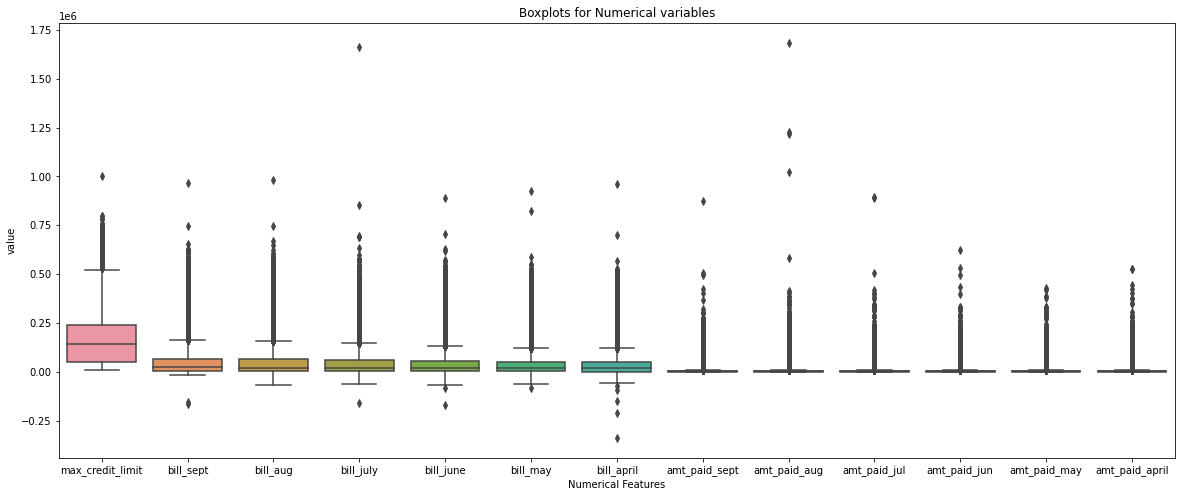

In [27]:
# Boxplots for all numerical features except age
num_features = ['max_credit_limit','bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
                'amt_paid_sept', 'amt_paid_aug', 'amt_paid_jul', 'amt_paid_jun', 'amt_paid_may', 'amt_paid_april']
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=0, y="value", data=pd.melt(dataset[num_features])).set(title='Boxplots for Numerical variables',
                                                                     xlabel="Numerical Features")
# Bills have negative values, it could mean customer has paid more than their last month's billed amount.

[Text(0.5, 0, 'Numerical Features'),
 Text(0.5, 1.0, 'Boxplots for Numerical variables')]

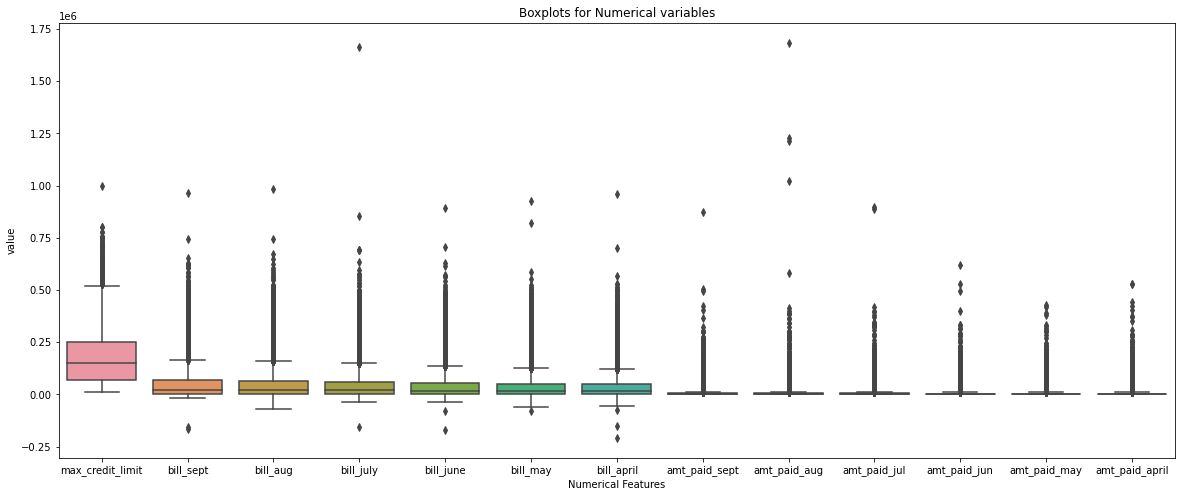

In [28]:
# Boxplots for all numerical features except age for non-defaulters
num_features = ['max_credit_limit','bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
       'amt_paid_sept', 'amt_paid_aug', 'amt_paid_jul', 'amt_paid_jun', 'amt_paid_may', 'amt_paid_april']
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=0, y="value", data=pd.melt(dataset[dataset['default_nxt_mnth']==0][num_features])).set(title='Boxplots for Numerical variables',
                                                                                                    xlabel="Numerical Features")
# Bills have negative values for non-defaulters, it could mean customer has paid more than their last month's billed amount.

[Text(0.5, 0, 'Numerical Features'),
 Text(0.5, 1.0, 'Boxplots for Numerical variables for defaulters')]

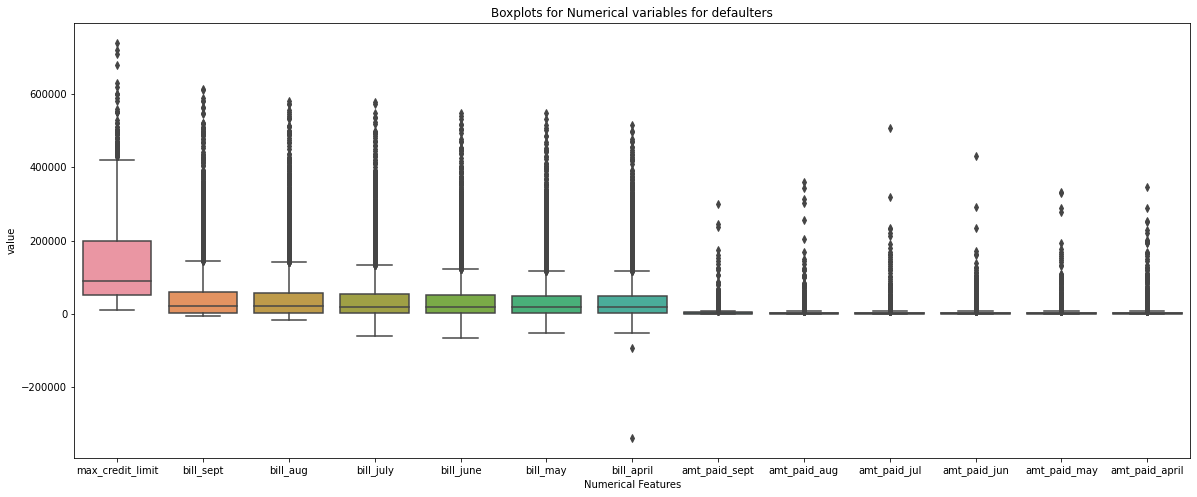

In [29]:
# Boxplots for all numerical features except age for defaulters
num_features = ['max_credit_limit','bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
       'amt_paid_sept', 'amt_paid_aug', 'amt_paid_jul', 'amt_paid_jun', 'amt_paid_may', 'amt_paid_april']
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=0, y="value", data=pd.melt(dataset[dataset['default_nxt_mnth']==1][num_features])).set(title='Boxplots for Numerical variables for defaulters',
                                                                                                    xlabel="Numerical Features")

In [30]:
# Statistical parameters for numerical features
dataset[num_features].describe()

,max_credit_limit,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,amt_paid_sept,amt_paid_aug,amt_paid_jul,amt_paid_jun,amt_paid_may,amt_paid_april
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


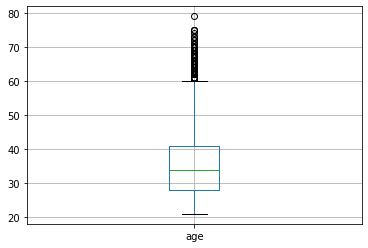

In [31]:
# boxplot for age separately as its values range on smaller scale compared to other features (Better visualization)
dataset[['age']].boxplot()
# Outliers on the older age side

[Text(0.5, 1.0, 'Boxplots for categorical variables')]

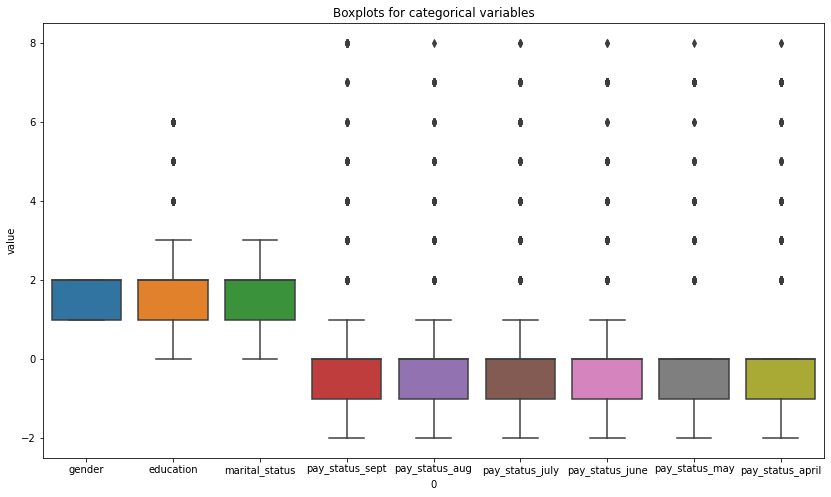

In [32]:
# Boxplots for all categorical features
cat = ['gender','education', 'marital_status', 'pay_status_sept', 'pay_status_aug', 'pay_status_july',
       'pay_status_june', 'pay_status_may', 'pay_status_april']
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(x=0, y="value", data=pd.melt(dataset[cat])).set(title='Boxplots for categorical variables')
# There are some undocumented categories such as -2 and 0.

**Observations**:
1. Maximum credit limit and amt_paid_X have lot of outliers on the positive sides; while bill_X have outliers on the both sides.
2. Negative bill_X refers to those customers who have paid amount more than their billed amount.
3. Age has few outliers on the positive side.
4. These outliers depict real world data and can help us building realistic model. Therefore, these were not treated.

## **2. Uni-variate Analysis**

### 1. max_credit_limit Column: Total credit line provided to a customer

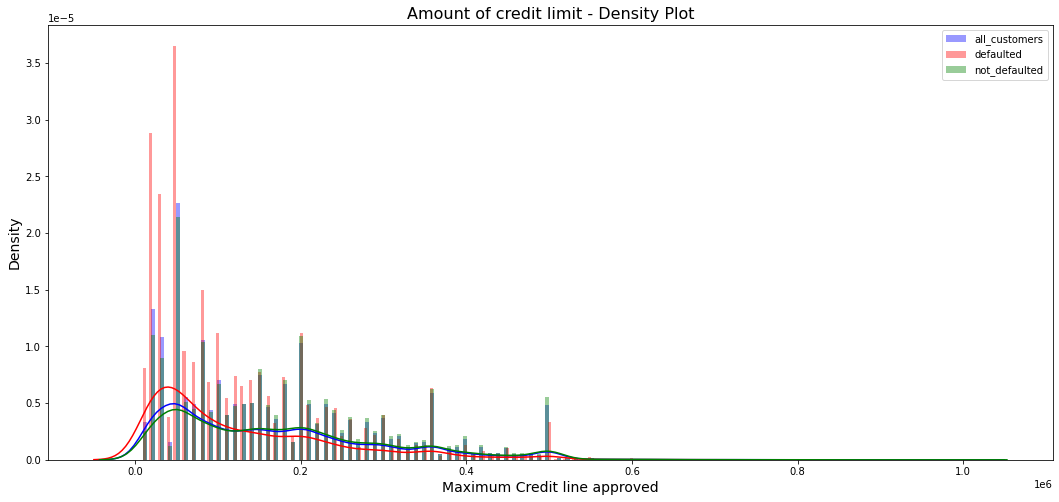

In [33]:
# distribution plots for Maximu credit limit for All customers, Defaulters only and NO-defaulters only
plt.figure(figsize = (18,8))
# setting title
plt.title('Amount of credit limit - Density Plot', fontsize=16)
plt.xlabel(xlabel='', fontsize=14)
plt.ylabel(ylabel='', fontsize=14)
sns.distplot(dataset['max_credit_limit'],kde=True,bins=200,label='all_customers',color="blue")
sns.distplot(dataset[dataset['default_nxt_mnth']==1]['max_credit_limit'],kde=True,bins=200,label='defaulted',color="red")
sns.distplot(dataset[dataset['default_nxt_mnth']==0]['max_credit_limit'],kde=True,bins=200,label='not_defaulted',color="green").set(xlabel='Maximum Credit line approved')
plt.legend()

In [34]:
# Checking average credit limits approved for defaulters and non-defaulters.
avg_lmt_0 = round(dataset[dataset['default_nxt_mnth']==0]['max_credit_limit'].mean(),2)
avg_lmt_1 = round(dataset[dataset['default_nxt_mnth']==1]['max_credit_limit'].mean(),2)
print("Average Credit limit of Non-Defaulters:",avg_lmt_0)
print("Average Credit limit of Defaulters:",avg_lmt_1)

Average Credit limit of Non-Defaulters: 178099.73
Average Credit limit of Defaulters: 130109.66


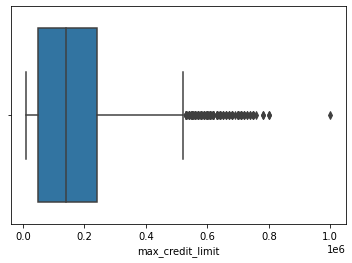

In [35]:
# boxplot for maximum credit limit
sns.boxplot(dataset['max_credit_limit'])

[Text(0, 0.5, 'Maximum Credit limits'),
 Text(0.5, 0, 'Non-Defaulters Vs Defaulters')]

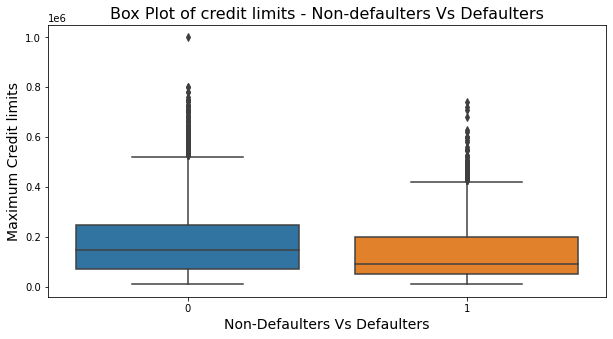

In [36]:
# Boxplots for Max_credit_limits for defaulters and Non-defaulters
plt.figure(figsize = (10,5))
plt.title('Box Plot of credit limits - Non-defaulters Vs Defaulters', fontsize=16)
plt.xlabel(xlabel = '', fontsize=14)
plt.ylabel(ylabel='', fontsize=14)
sns.boxplot(y = dataset["max_credit_limit"], x=dataset['default_nxt_mnth']).set(xlabel='Non-Defaulters Vs Defaulters', 
                                                                                ylabel = 'Maximum Credit limits')

In [37]:
# statistical parameters for credit limit
dataset['max_credit_limit'].describe(percentiles=[0,0.5,0.75, 0.85,0.90,0.95,0.99,1])

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
0%         10000.000000
50%       140000.000000
75%       240000.000000
85%       310000.000000
90%       360000.000000
95%       430000.000000
99%       500000.000000
100%     1000000.000000
max      1000000.000000
Name: max_credit_limit, dtype: float64

In [38]:
# Defaulters max_cred_limit statistical parameters
dataset[dataset['default_nxt_mnth']==1]['max_credit_limit'].describe(percentiles=[0,0.5,0.75, 0.85,0.90,0.95,0.99,1])

count      6636.000000
mean     130109.656420
std      115378.540571
min       10000.000000
0%        10000.000000
50%       90000.000000
75%      200000.000000
85%      240000.000000
90%      300000.000000
95%      360000.000000
99%      500000.000000
100%     740000.000000
max      740000.000000
Name: max_credit_limit, dtype: float64

In [39]:
# Non-Defaulters max_cred_limit statistical parameters
dataset[dataset['default_nxt_mnth']==0]['max_credit_limit'].describe()

count      23364.000000
mean      178099.726074
std       131628.359660
min        10000.000000
25%        70000.000000
50%       150000.000000
75%       250000.000000
max      1000000.000000
Name: max_credit_limit, dtype: float64

In [40]:
# checking out customer with maximum credit limit
dataset[dataset['max_credit_limit']>950000]

,cust_id,max_credit_limit,gender,education,marital_status,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,amt_paid_sept,amt_paid_aug,amt_paid_jul,amt_paid_jun,amt_paid_may,amt_paid_april,default_nxt_mnth
2197,2198,1000000,2,1,1,47,0,0,0,-1,0,0,964511,983931,535020,891586,927171,961664,50784,50723,896040,50000,50000,50256,0


**Observations**:
1. Density plot of credit limit is positively skewed (i.e., has long tail on the right).
2. Mean of max_credit_limit is ~167K and median is ~140K.
3. 1% customers have credit limit more than 500K.
4. Highest credit limit (1 millions) is of a Female of age 47, is married and graduated; and is not a Defaulter.
5. Average credit limit approved for Defaulters is less than that of Non-defaulters, suggesting that credit limit were approved correctly to some extent. This also shows that defaulters credit profile was certainly not as good as Non-defaulters even from the beginning, and as a result they were issued smaller credit lines.

### 2. Gender Column: 
1. Male
2. Female





In [41]:
# Checking unique categories and their counts for Gender column
dataset['gender'].value_counts()
# Values and their references as per given problem statement
# (1 = Male; 2 = Female)

2    18112
1    11888
Name: gender, dtype: int64

Text(0.5, 1.0, 'Distribution of customers basis Gender')

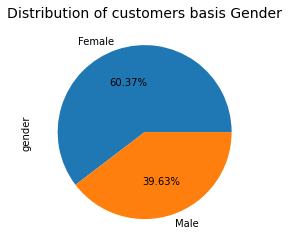

In [42]:
# Pie-chart to show distribution of customers basis Gender
labels = ['Female','Male']
dataset['gender'].value_counts().plot(kind='pie', autopct='%1.2f%%', labels=labels)
plt.title('Distribution of customers basis Gender', fontsize = 14)
# ~60% customers are Females.

**Observations**:
1. Majority of customers are Females (~60%).

### 3. Education column:
1. Grad_School
2. University
3. High School
4. Others


In [43]:
# Checking unique categories and their counts for Education column
dataset['education'].value_counts()
# Values and their references as per given problem statement
# 1 = graduate school; 2 = university; 3 = high school; 4 = others
# Undocumented values for Education are 0, 5, and 6

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

In [44]:
# Since we have no idea about 0, 5 and 6 categories and their counts are quite less;
# Few observation for these classes will cause overfitting.
# Therefore, i have decided to combine 0, 5, 6 and 4 education levels as 4 i.e., Others
dataset.loc[dataset['education']==0,'education'] = 4
dataset.loc[dataset['education']==5,'education'] = 4
dataset.loc[dataset['education']==6,'education'] = 4
dataset['education'].nunique()

4

In [45]:
# Checking unique categories and their counts for Education column
dataset['education'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64

Text(0, 0.5, 'Education Level')

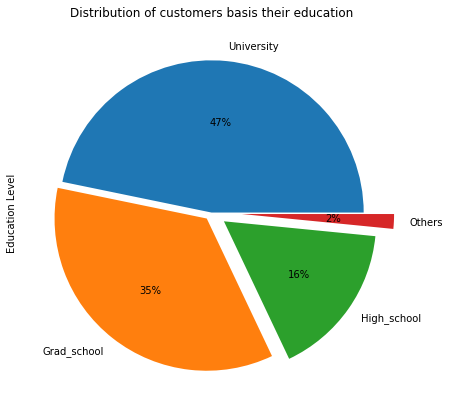

In [46]:
# Pie-chart to show percentages of customers of different education categories 
labels = ['University','Grad_school','High_school','Others']
explode = (0, 0.05, 0.1, 0.2)
dataset['education'].value_counts().plot(kind='pie', figsize=(9,7), explode=explode, autopct='%1.0f%%', labels=labels)
plt.title('Distribution of customers basis their education', fontsize = 12)
plt.ylabel('Education Level', fontsize = 10)

**Observations**:
1. For Education feature, categories 0, 5, and 6 are undocumented.
2. We have no idea about these 0,5,and 6 categories and their counts are very less. Since few observations for these classes will cause overfitting, its better to combine 0, 5, 6 and 4 education levels together as 4 i.e., Others
3. Majority of customers have University level education (~47%), followed by Graduate school level education (around 35%)
4. Only 16% have High-school level education.

* **Graduate school > University > High School > Others**.  (Assumed)

### 4. marital_status column:
1. Married
2. Single
3. Others

In [47]:
# Checking unique categories and their counts for Marriage column
dataset['marital_status'].value_counts()
# Values and their references as per given problem statement:
# 1 = married; 2 = single; 3 = others
# Undocumented values for Marriage is 0.

2    15964
1    13659
3      323
0       54
Name: marital_status, dtype: int64

In [48]:
# Since class 0 has very few data, therfore training the model with less data will cause overfitting and lead to less genralization.
# And, 3 could be anything other than Married and single, Therefore let's combine 0 and 3 together as Others
dataset.loc[dataset['marital_status']==0,'marital_status'] = 3
dataset['marital_status'].unique()

array([1, 2, 3])

Text(0, 0.5, 'Marital status')

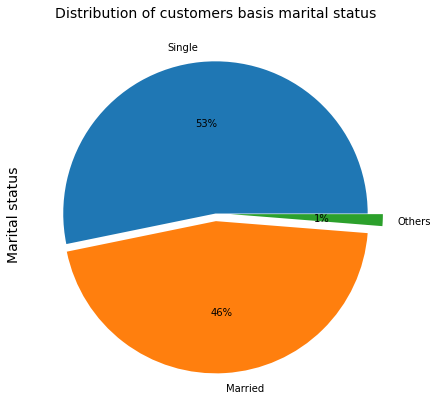

In [49]:
# Plotting pie-chart showing distribution of customers basis Marital status
labels = ['Single','Married','Others']
explode = (0, 0.05, 0.1)
dataset['marital_status'].value_counts().plot(kind='pie', figsize = (9,7), explode=explode, autopct='%1.0f%%', labels=labels)
plt.title('Distribution of customers basis marital status', fontsize = 14)
plt.ylabel('Marital status', fontsize = 14)
# ~53% customers are single and ~46% are married.

**Observations**:
1. For marriage feature, 0 has no documentation provided. 
2. Since category 0 has very few observations, therfore training the model with less data will cause overfitting and less genralization.
3. Category 0 could be anything other than Married and single, therefore let's combine 0 and 3 together as "Others".
4. Majority of customers(~53%) are single, followed by customers who are married (around 46%).

### 5. AGE Column

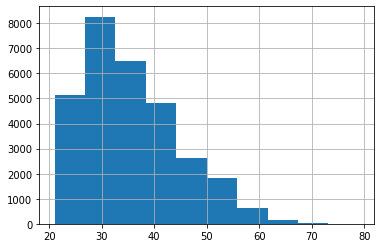

In [50]:
# Histogram to show counts of customers of different age groups
dataset.age.hist()

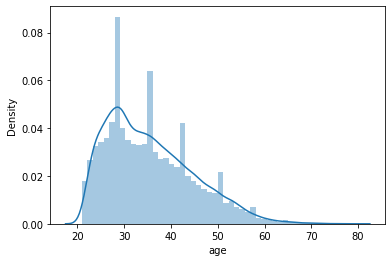

In [51]:
# density plot to show counts of customers of different ages
sns.distplot(dataset['age'])
# Positively skewed

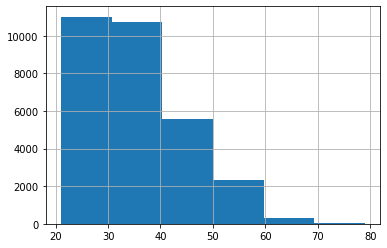

In [52]:
# Histogram to show counts of customers of 6 different age groups
dataset.age.hist(bins=6)
# Most of customers are within 21 years to 40 years age group.

**Observations**:
1. Most of customers are within 21 years to 40 years age group.
2. Distribution is positively skewed, with few outliers on the right side.

### 6. pay_status_X Columns:
**-1**: Fully paid,
**-2**: **Unknown,**
**0**: **Unknown,**
**1**: delayed Payment for 1 month,
**2**: delayed Payment for 2 months,
and so on ..

In [53]:
# Modular function for generating multiple histograms at once
def draw_hists(dataset, variables, n_rows, n_cols, n_bins):
  """ This function takes a dataframe and plots histograms for all its columns
  based on number of bins and subplots specified"""
  fig=plt.figure()
  for i, var_name in enumerate(variables):
    # adding subplots
    ax=fig.add_subplot(n_rows,n_cols,i+1)
    dataset[var_name].hist(bins=n_bins,ax=ax)
    ax.set_title(var_name)
  fig.tight_layout()  # Improves appearance a bit
  plt.show()

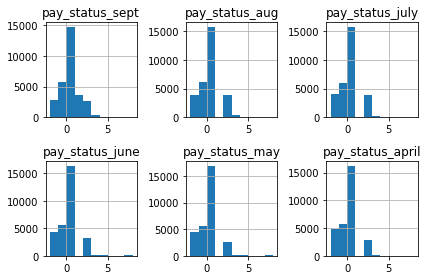

In [54]:
# checking historgrams/distributions of Status of Past Payment history of 6 months
pay_status = dataset[['pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april']]
draw_hists(pay_status, pay_status.columns, 2, 3, 10)

In [55]:
# checking statistical paramters for Payment statuses of last six months
dataset[['pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april']].describe()
# All have -2 and 0 values (Undocumented)

,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [56]:
# Checking unique categories and their counts for pay_status_sept column
dataset['pay_status_sept'].value_counts()
# Values and their references as per given problem statement:
# -1 = pay duly; 1 = payment delay for one month;...;8 = payment delay for eight months; 9 = payment delay for nine months and above
# Undocumented values for PAY_1 are: 
# 0, -2: will be searched and clarified on internet

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: pay_status_sept, dtype: int64

In [57]:
# checking customers with pay status as -2 in september month
dataset[dataset['pay_status_sept']== -2].head()

,cust_id,max_credit_limit,gender,education,marital_status,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,amt_paid_sept,amt_paid_aug,amt_paid_jul,amt_paid_jun,amt_paid_may,amt_paid_april,default_nxt_mnth
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0
23,24,450000,2,1,1,40,-2,-2,-2,-2,-2,-2,5512,19420,1473,560,0,0,19428,1473,560,0,0,1128,1
33,34,500000,2,2,1,54,-2,-2,-2,-2,-2,-2,10929,4152,22722,7521,71439,8981,4152,22827,7521,71439,981,51582,0
34,35,500000,1,1,1,58,-2,-2,-2,-2,-2,-2,13709,5006,31130,3180,0,5293,5006,31178,3180,0,5293,768,0
45,46,210000,1,1,2,29,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1


In [58]:
# checking customers with pay status as -1 in september month
dataset[dataset['pay_status_sept']== -1].head()

,cust_id,max_credit_limit,gender,education,marital_status,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,amt_paid_sept,amt_paid_aug,amt_paid_jul,amt_paid_jun,amt_paid_may,amt_paid_april,default_nxt_mnth
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
11,12,260000,2,1,2,51,-1,-1,-1,-1,-1,2,12261,21670,9966,8517,22287,13668,21818,9966,8583,22301,0,3640,0
12,13,630000,2,2,2,41,-1,0,-1,-1,-1,-1,12137,6500,6500,6500,6500,2870,1000,6500,6500,6500,2870,0,0
21,22,120000,2,2,1,39,-1,-1,-1,-1,-1,-1,316,316,316,0,632,316,316,316,0,632,316,0,1


In [59]:
# Creating a dataframe for defaulters only
defaulter = dataset[dataset['default_nxt_mnth']==1] 
# Creating a dataframe for non-defaulters only
non_defaulter = dataset[dataset['default_nxt_mnth']==0]

In [60]:
# checking statistical paramters for Payment statuses of last six months for defaulters
defaulter[['pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april']].describe()
# All have -2 and 0 values (Undocumented)

,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000
mean,0.668174,0.458258,0.362116,0.254521,0.167872,0.112116
std,1.383252,1.502243,1.499401,1.508535,1.482833,1.485757
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000
max,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000


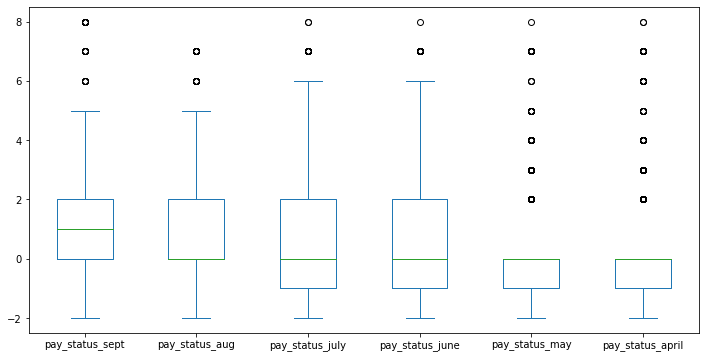

In [61]:
# Box plot for pay_Status of each month for Defaulters
defaulter[['pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 
           'pay_status_may', 'pay_status_april']].plot(kind='box',  figsize =(12,6))

In [62]:
# checking statistical paramters for Payment statuses of last six months for defaulters
non_defaulter[['pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april']].describe()
# All have -2, -1 and 0 values (Undocumented)

,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april
count,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000
mean,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,-0.405624
std,0.952464,1.035191,1.048378,1.013162,0.977591,1.005930
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000


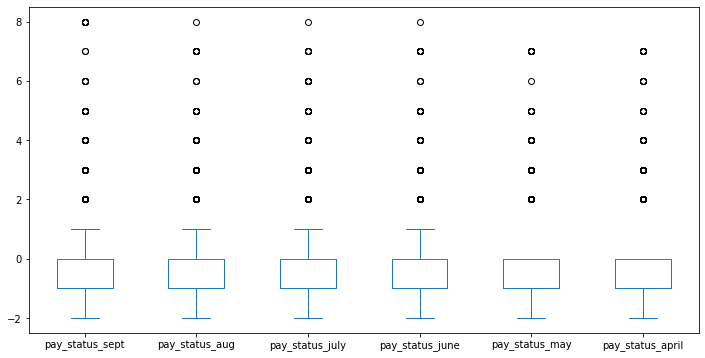

In [63]:
# Box plot for pay_Status of each month for Non-Defaulters
non_defaulter[['pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 
               'pay_status_may', 'pay_status_april']].plot(kind='box',  figsize =(12,6))

**Observations**:

1. All pay_status_X columns have undocumented categories 0, -1 and -2. Upon searching the above undocumented categories on internet and found the following clarifications on Kaggle discussions:
  **-2** = No new consumption, and Balance paid in full
  **-1** = Balance paid in full, but account has a positive balance at end of period due to recent transactions for which payment has not yet come due
  **0** = Revolving, i.e., Customer paid the minimum due amount, but not the entire balance. I.e., the customer paid enough for their account to remain in good standing, but did revolve a balance.
  **Since these undocumented categories have significant observations and a lot of ambiguity around, i have decided to keep them intact and not merge with other known category.**
2. As per pay_status of each month, majority of non-defaulters' pay_status is either 0 or -1 in all months (i.e., majority are either revolving or paying full). However, for defaulters, pay_staus is either 0, 1 or 2 in latest months September, august and july (i.e., majority are either revolving or have delay of 1-2 months).

### 7. bill_X Column for last 6 months

In [64]:
# checking statisticall paramters for amount of bill statements of last six months
dataset[['bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april']].describe()
# Negative bill amount may indicate that customer has paid amount more than the total bill amount.

,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [65]:
# For Non-defaulters
# checking statisticall paramters for amount of bill statements of last six months
non_defaulter[['bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april']].describe()
# Negative bill amount may indicate that customer has paid amount more than the total bill amount.

,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april
count,23364.000000,23364.000000,2.336400e+04,23364.000000,23364.000000,23364.000000
mean,51994.227273,49717.435670,4.753337e+04,43611.165254,40530.445343,39042.268704
std,73577.606694,71029.946709,6.957666e+04,64324.796730,60617.268112,59547.015717
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000
25%,3677.250000,3055.000000,2.769750e+03,2360.000000,1823.000000,1265.500000
50%,23119.500000,21660.500000,2.020250e+04,19000.000000,17998.000000,16679.000000
75%,69027.000000,65686.000000,6.189400e+04,55988.000000,51135.250000,49842.500000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [66]:
# For Defaulters
# checking statisticall paramters for amount of bill statements of last six months
defaulter[['bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april']].describe()
# Negative bill amount may indicate that customer has paid amount more than the total bill amount.

,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000
mean,48509.162297,47283.617842,45181.598855,42036.950573,39540.190476,38271.435503
std,73782.067220,71651.030364,68516.975738,64351.076092,61424.695949,59579.674268
min,-6676.000000,-17710.000000,-61506.000000,-65167.000000,-53007.000000,-339603.000000
25%,2987.750000,2694.000000,2500.000000,2141.500000,1502.750000,1150.000000
50%,20185.000000,20300.500000,19834.500000,19119.500000,18478.500000,18028.500000
75%,59626.500000,57919.750000,54733.750000,50175.750000,47853.000000,47424.000000
max,613860.000000,581775.000000,578971.000000,548020.000000,547880.000000,514975.000000


In [67]:
# Module function for plotting multiple density plots for continuous variables
def plot_dists(dataset,variables,n_row,n_cols):
  '''This function takes a dataframe and column names
  and plot density plots for each columns'''
  fig=plt.figure(figsize=(8,4))
  for i, var_name in enumerate(variables):
    ax=fig.add_subplot(n_row,n_cols,i+1)
    sns.distplot(dataset[var_name])
    ax.set_title(var_name)
  fig.tight_layout()  # Improves appearance a bit
  plt.show()

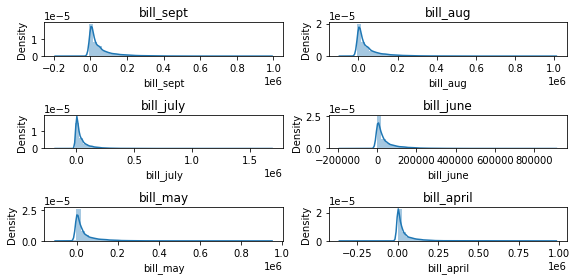

In [68]:
# Creating a dataframe of Bill amounts of last 6 months
bills = dataset[['bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april']]
variables=bills.columns
# Plotting density plots for Bill amounts of last 6 months
plot_dists(bills,variables,3,2)

**Observations**:
1. Average Bill amounts for Defaulters are less than that of Non-defaulters for last 6 months. This could also be due to the fact they were given smaller credit limit as compared to Non-defaulters. **Or,**
2. This might indicate that customer starts reducing his/her spending as chances of him/her defaulting increases!! However, to verify this and better understand the spending pattern of a defaulter, i will create a new monthly expenditure rate variable later.

### 8. amt_paid_X column

In [69]:
# Checking statistical parameters of amt_paid in each month
dataset[['amt_paid_sept',	'amt_paid_aug',	'amt_paid_jul',	'amt_paid_jun',	'amt_paid_may',	'amt_paid_april']].describe()

,amt_paid_sept,amt_paid_aug,amt_paid_jul,amt_paid_jun,amt_paid_may,amt_paid_april
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [70]:
# For Non-defaulters
# Checking statistical parameters of amt_paid in each month
non_defaulter[['amt_paid_sept',	'amt_paid_aug',	'amt_paid_jul',	'amt_paid_jun',	'amt_paid_may',	'amt_paid_april']].describe()

,amt_paid_sept,amt_paid_aug,amt_paid_jul,amt_paid_jun,amt_paid_may,amt_paid_april
count,23364.000000,2.336400e+04,23364.000000,23364.000000,23364.000000,23364.000000
mean,6307.337357,6.640465e+03,5753.496833,5300.529319,5248.220296,5719.371769
std,18014.508990,2.530226e+04,18684.255937,16689.778060,16071.667860,18792.950473
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1163.750000,1.005000e+03,600.000000,390.000000,369.000000,300.000000
50%,2459.500000,2.247500e+03,2000.000000,1734.000000,1765.000000,1706.000000
75%,5606.250000,5.311250e+03,5000.000000,4602.000000,4600.000000,4545.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [71]:
# For Defaulters
# Checking statistical parameters of amt_paid in each month
defaulter[['amt_paid_sept',	'amt_paid_aug',	'amt_paid_jul',	'amt_paid_jun',	'amt_paid_may',	'amt_paid_april']].describe()

,amt_paid_sept,amt_paid_aug,amt_paid_jul,amt_paid_jun,amt_paid_may,amt_paid_april
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000
mean,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068
std,9544.252427,11737.986064,12959.624486,11191.973162,11944.731175,13464.005894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1636.000000,1533.500000,1222.000000,1000.000000,1000.000000,1000.000000
75%,3478.250000,3309.750000,3000.000000,2939.250000,3000.000000,2974.500000
max,300000.000000,358689.000000,508229.000000,432130.000000,332000.000000,345293.000000


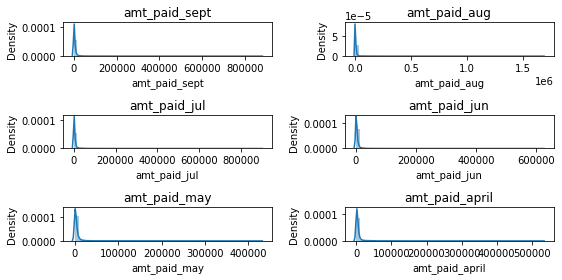

In [72]:
# Density plots for paid amounts for last 6 months
amt_paid = dataset[['amt_paid_sept','amt_paid_aug',	'amt_paid_jul',	'amt_paid_jun',	'amt_paid_may',	'amt_paid_april']]
variables1 = list(amt_paid.columns)
plot_dists(amt_paid,variables1,3,2)

**Observations**:
1. Average monthly amounts being paid by Defaulters are less than that paid by Non-defaulters.
2. Among defaulters, 25% customers had not paid a single dollar in last 6 months, however non-defaulters have paid certain amount every month. This surely is a Red Flag and a great predictor variable for identifying Defaulters!!

### 9. default_nxt_mnth Column (Target variable)

In [73]:
# Checking unique categories and their counts for default_nxt_mnth column
dataset['default_nxt_mnth'].value_counts(normalize=True)
# Values and their references as per given problem statement:
# 1 = has defaulted; 0 = Not defaulted
# Imbalanced dataset (Defaulted customers are only ~22% of total customers)

0    0.7788
1    0.2212
Name: default_nxt_mnth, dtype: float64

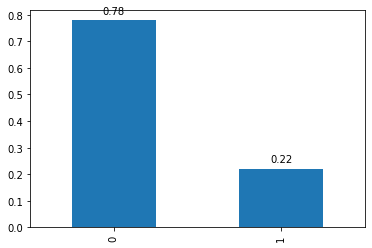

In [74]:
# Plotting distribution of customers Non-defaulters Vs Defaulters
plt2=dataset['default_nxt_mnth'].value_counts(normalize=True).plot(kind='bar')
# annotating bar plots
annot(plt2)

**Observations**:
1. Its an imbalanced dataset with only ~22% of total customers are defaulted customers.
2. ~78% customers did not default next month.

## **3. Bi-variate Analysis**

### 1. Gender and Default rate:

* Is there any relation between Gender and chances of defaulting??

In [75]:
# Creating a crosstable with gender and respective default status
gender = pd.crosstab(dataset.gender, dataset.default_nxt_mnth)
gender

default_nxt_mnth,0,1
gender,,
1,9015,2873
2,14349,3763


In [76]:
# Getting percentages of defaulters in both genders.
gender['default_ratio'] = round((gender[1]/(gender[1]+gender[0]))*100,2)
gender['not_default_ratio'] = round((gender[0]/(gender[1]+gender[0]))*100,2)
gender

default_nxt_mnth,0,1,default_ratio,not_default_ratio
gender,,,,
1,9015,2873,24.17,75.83
2,14349,3763,20.78,79.22


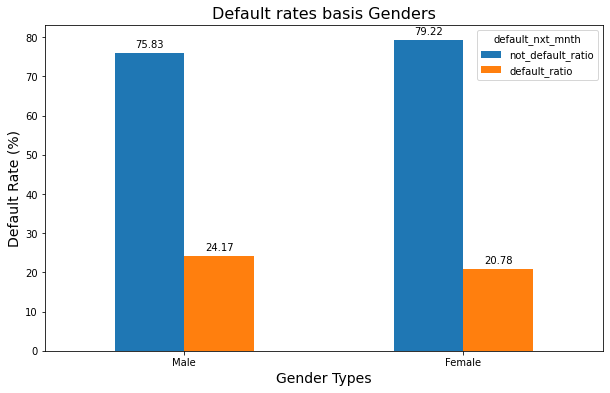

In [77]:
# Plotting a bar chart for Gender-wise default percentage for better visualization.
plt1=gender[['not_default_ratio','default_ratio']].plot(kind='bar', figsize=(10,6))
ax = plt.gca()
ax.set_xticklabels(['Male','Female'])
plt.xticks(rotation=0)
plt.title("Default rates basis Genders", fontsize=16)
plt.xlabel("Gender Types", fontsize=14)
plt.ylabel("Default Rate (%)", fontsize=14)
# annotating bars
annot(plt1)

**Observations**:
1. As seen earlier, majority of customers are Females (~60%).
2. Basis gender of customers, chances of Males defaulting on their payments next month is higher than that of Females.
3. ~24.2% males have defaulted next month, while only ~20.8% females defaulted next month.

### 2. Education level and Default rate
* Is there any relation between Education level of customer and their chances of defaulting??
* 1 - Graduate school
* 2 - University 
* 3 -  High School
* 4 - Others

In [78]:
# Creating a crosstable with education and default status
education = pd.crosstab(dataset.education, dataset.default_nxt_mnth)
# Adding columns for non-default and default rates
education['Non-default_rate']=round((education[0]/(education[0]+education[1])*100),2)
education['default_rate']=round((education[1]/(education[0]+education[1])*100),2)
education

default_nxt_mnth,0,1,Non-default_rate,default_rate
education,,,,
1,8549,2036,80.77,19.23
2,10700,3330,76.27,23.73
3,3680,1237,74.84,25.16
4,435,33,92.95,7.05


Text(0, 0.5, 'Default rate (%)')

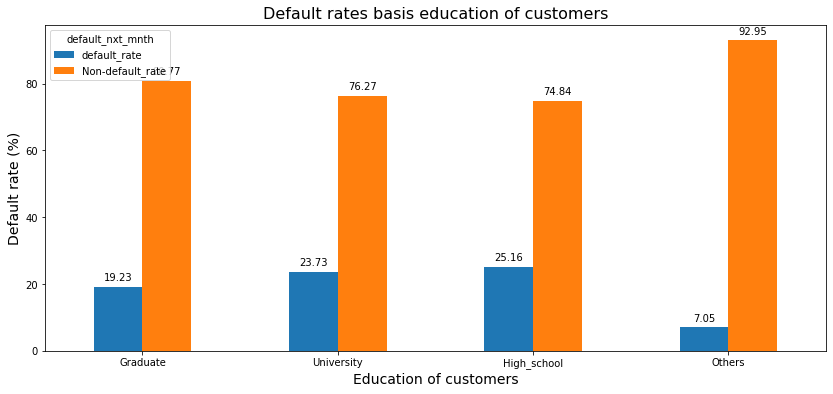

In [79]:
# Plotting bar chart to visualize education levels and their respective default rates.
plt6 = education[['default_rate','Non-default_rate']].plot(kind='bar', figsize = (14,6))
ax = plt.gca()
# annotating bars
annot(plt6)
ax.set_xticklabels(['Graduate','University','High_school','Others'])
plt.xticks(rotation=0)
plt.title("Default rates basis education of customers", fontsize = 16)
plt.xlabel("Education of customers", fontsize = 14)
plt.ylabel("Default rate (%)", fontsize = 14)

**Observations**:
1. As seen earlier, majority of customers have education of University level (~47%), followed by Graduate school level (approx. 35%).
2. Default rate is highest for customers with high-school level education(~25%), shortly followed by customers of University level education (approx. 24%).
3. **As education level increases (i.e., high school to university to graduate school), default rate decreases**.

### 3. Marital Status and Default Rate
* Is there any relation between Marital Status and respective chances of defaulting??

In [80]:
# Creating crosstable to analyse relationship between marital status and default chances
marital = pd.crosstab(dataset.marital_status, dataset.default_nxt_mnth)
# Adding columns for default and not_default rates
marital['default_ratio'] = round(((marital[1]/(marital[0]+marital[1]))*100),2)
marital['Non-default_ratio'] = round(((marital[0]/(marital[0]+marital[1]))*100),2)
marital

default_nxt_mnth,0,1,default_ratio,Non-default_ratio
marital_status,,,,
1,10453,3206,23.47,76.53
2,12623,3341,20.93,79.07
3,288,89,23.61,76.39


Text(0, 0.5, 'Default rate (%)')

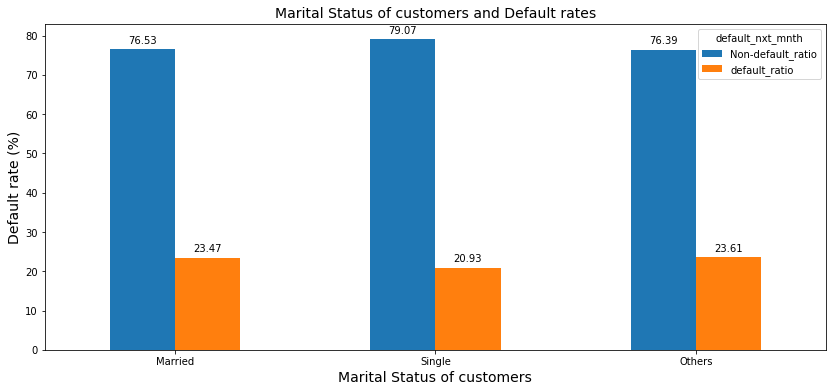

In [81]:
# Bar charts to visualize above relationship.
plt5 = marital[['Non-default_ratio','default_ratio']].plot(kind='bar', figsize = (14,6))
ax = plt.gca()
ax.set_xticklabels(['Married','Single','Others'])
# Annotating bar charts
annot(plt5)
plt.xticks(rotation=0)
plt.title('Marital Status of customers and Default rates', fontsize = 14)
plt.xlabel('Marital Status of customers', fontsize = 14)
plt.ylabel('Default rate (%)', fontsize = 14)

**Observations**:
1. As seen earlier, majority of customers are single.
2. Since data for Others category is very less, i am going to ignore its default rate being the highest.
3. Taking Others category out of consideration, Chances of defaulting is highest for customers who are married (~23.5%). 

### 4. Age and Default Rate
* How default rate varies across different age or say age groups??

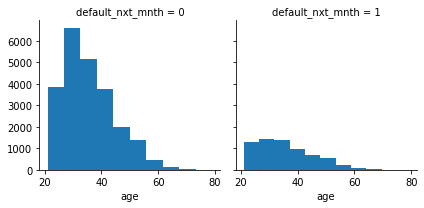

In [82]:
# Plotting default status wise age histograms
g = sns.FacetGrid(dataset, col = 'default_nxt_mnth')
# Multi-plot grid for plotting conditional relationships.
g.map(plt.hist, 'age')

In [240]:
# Creating a copy of dataframe for experimenting with Age variable & its trends
age_binned = dataset.copy()
# Binning ages into 6 groups
age_binned['age_bins'] = pd.cut(x=age_binned['age'],bins=[20,30,40,50,60,70,80])
age_binned.head()

,gender_2,education_2,education_3,education_4,marital_2,marital_3,max_credit_limit,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,amt_paid_sept,amt_paid_aug,amt_paid_jul,amt_paid_jun,amt_paid_may,amt_paid_april,default_nxt_mnth,age_bins,avg_spends_apr,avg_spends_may,avg_spends_jun,avg_spends_jul,avg_spends_aug,utilized%_apr,utilized%_may,utilized%_jun,utilized%_jul,utilized%_aug,utilized%_sept,speed_utirate_sept
0,1,1,0,0,0,0,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,"(20, 30]",0.000000,0.000000,0.034450,0.155100,0.040550,0.000000,0.000000,0.000000,0.034450,0.155100,0.195650,5.160907
1,1,1,0,0,1,0,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,"(20, 30]",0.001617,0.006808,0.003417,0.000358,0.007975,0.027175,0.028792,0.027267,0.022350,0.014375,0.022350,0.931573
2,1,1,0,0,1,0,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,"(30, 40]",0.004433,0.004256,0.002533,0.021867,0.185889,0.172767,0.166089,0.159233,0.150656,0.155856,0.324878,2.018878
3,1,1,0,0,0,0,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,"(30, 40]",0.009620,0.009100,0.443540,0.019220,0.015140,0.590940,0.579180,0.566280,0.985820,0.964660,0.939800,1.274519
4,0,1,0,0,0,0,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,"(50, 60]",0.014080,0.215880,0.497900,0.130320,0.098940,0.382620,0.382920,0.418800,0.716700,0.113400,0.172340,0.427762


In [241]:
# Percentage of customers of different age-groups
age_binned['age_bins'].value_counts(normalize=True)

(20, 30]    0.367100
(30, 40]    0.357100
(40, 50]    0.200167
(50, 60]    0.066567
(60, 70]    0.008567
(70, 80]    0.000500
Name: age_bins, dtype: float64

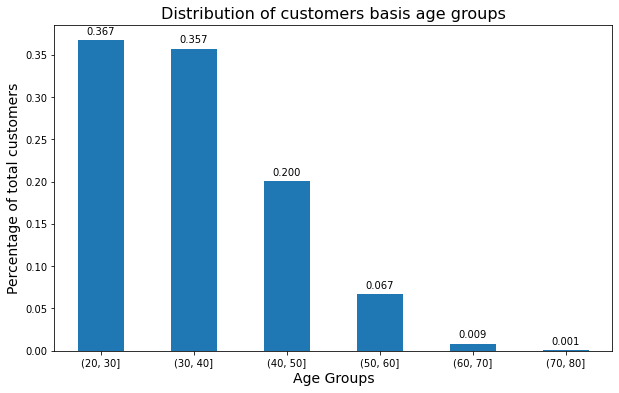

In [242]:
# Percentages of customers of different age-groups
plt6 = age_binned['age_bins'].value_counts(normalize=True).plot(kind='bar', figsize = (10,6))
plt.title('Distribution of customers basis age groups', fontsize = 16)
plt.xlabel('Age Groups', fontsize = 14)
plt.ylabel('Percentage of total customers', fontsize = 14)
plt.xticks(rotation = 0)
# Annotating bar plots
annot(plt6)

In [86]:
# Creating crosstable to analyse relationship between age_groups and default chances
age_def = pd.crosstab(age_binned.age_bins, age_binned.default_nxt_mnth)
# adding columns fo rdefault rate and not_Default rates
age_def['default_ratio'] = round(((age_def[1]/(age_def[0]+age_def[1]))*100),2)
age_def['Non_default_ratio'] = round(((age_def[0]/(age_def[0]+age_def[1]))*100),2)
age_def

default_nxt_mnth,0,1,default_ratio,Non_default_ratio
age_bins,,,,
"(20, 30]",8542,2471,22.44,77.56
"(30, 40]",8524,2189,20.43,79.57
"(40, 50]",4606,1399,23.30,76.70
"(50, 60]",1493,504,25.24,74.76
"(60, 70]",189,68,26.46,73.54
"(70, 80]",10,5,33.33,66.67


Text(0, 0.5, 'Default rate (%)')

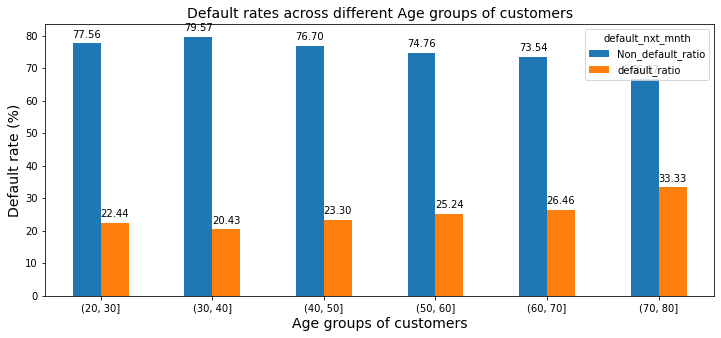

In [87]:
# Bar charts to visualize above relationship between age groups and Default rates.
plt5 = age_def[['Non_default_ratio','default_ratio']].plot(kind='bar', figsize = (12,5))
ax = plt.gca()
# Annotating bar charts
annot(plt5)
plt.xticks(rotation=0)
plt.title('Default rates across different Age groups of customers', fontsize = 14)
plt.xlabel('Age groups of customers', fontsize = 14)
plt.ylabel('Default rate (%)', fontsize = 14)

**Observations**:
1. Majority of customers are in age group 21 to 40 years (~72%).
2. Customers within age groups 31 to 40 years are least likely to default, followed by 21 to 30 years group
3. Customers of 71 to 80 years are most likely to default, followed by 61 to 70 years. Older people with high default chances makes sense.
4. Since observations for older age groups (>60 years) is very few, we may ignore their respective trends of high default rate.
5. Default rate gradually increases as the customers' age increases from 41 years and onwards.

### 5. pay_status_X and Default rate

In [88]:
# Checking relationship between payment status of September month and default rate
pay_status_sept = pd.crosstab(dataset.pay_status_sept, dataset.default_nxt_mnth)
pay_status_sept['default_rate']=round((pay_status_sept[1]/(pay_status_sept[0]+pay_status_sept[1])*100),2)
pay_status_sept
# As the number of months pending payments increases in latest month September, the percentage of Defaulters increases.

default_nxt_mnth,0,1,default_rate
pay_status_sept,,,
-2,2394,365,13.23
-1,4732,954,16.78
0,12849,1888,12.81
1,2436,1252,33.95
2,823,1844,69.14
3,78,244,75.78
4,24,52,68.42
5,13,13,50.00
6,5,6,54.55


In [89]:
# Checking relationship between payment status of August month and default rate
pay_status_aug = pd.crosstab(dataset.pay_status_aug, dataset.default_nxt_mnth)
pay_status_aug['default_rate']=round((pay_status_aug[1]/(pay_status_aug[0]+pay_status_aug[1])*100),2)
pay_status_aug

default_nxt_mnth,0,1,default_rate
pay_status_aug,,,
-2,3091,691,18.27
-1,5084,966,15.97
0,13227,2503,15.91
1,23,5,17.86
2,1743,2184,55.61
3,125,201,61.66
4,49,50,50.51
5,10,15,60.00
6,3,9,75.00


In [90]:
# Checking relationship between payment status of July month and default rate
pay_status_july = pd.crosstab(dataset.pay_status_july, dataset.default_nxt_mnth)
pay_status_july['default_rate']=round((pay_status_july[1]/(pay_status_july[0]+pay_status_july[1])*100),2)
pay_status_july

default_nxt_mnth,0,1,default_rate
pay_status_july,,,
-2,3328,757,18.53
-1,5012,926,15.59
0,13013,2751,17.45
1,3,1,25.00
2,1850,1969,51.56
3,102,138,57.50
4,32,44,57.89
5,9,12,57.14
6,9,14,60.87


In [91]:
# Checking relationship between payment status of June month and default rate
pay_status_june = pd.crosstab(dataset.pay_status_june, dataset.default_nxt_mnth)
pay_status_june['default_rate']=round((pay_status_june[1]/(pay_status_june[0]+pay_status_june[1])*100),2)
pay_status_june

default_nxt_mnth,0,1,default_rate
pay_status_june,,,
-2,3511,837,19.25
-1,4783,904,15.90
0,13439,3016,18.33
1,1,1,50.00
2,1506,1653,52.33
3,70,110,61.11
4,23,46,66.67
5,17,18,51.43
6,3,2,40.00


In [92]:
# Checking relationship between payment status of May month and default rate
pay_status_may = pd.crosstab(dataset.pay_status_may, dataset.default_nxt_mnth)
pay_status_may['default_rate']=round((pay_status_may[1]/(pay_status_may[0]+pay_status_may[1])*100),2)
pay_status_may

default_nxt_mnth,0,1,default_rate
pay_status_may,,,
-2,3651,895,19.69
-1,4642,897,16.19
0,13752,3195,18.85
2,1203,1423,54.19
3,65,113,63.48
4,33,51,60.71
5,7,10,58.82
6,1,3,75.00
7,10,48,82.76


In [93]:
# Checking relationship between payment status of April month and default rate
pay_status_april = pd.crosstab(dataset.pay_status_april, dataset.default_nxt_mnth)
pay_status_april['default_rate']=round((pay_status_april[1]/(pay_status_april[0]+pay_status_april[1])*100),2)
pay_status_april

default_nxt_mnth,0,1,default_rate
pay_status_april,,,
-2,3914,981,20.04
-1,4765,975,16.99
0,13217,3069,18.84
2,1365,1401,50.65
3,66,118,64.13
4,18,31,63.27
5,6,7,53.85
6,5,14,73.68
7,8,38,82.61


In [94]:
# getting average default rate for payments delayed for more than 1 month in last 6 months.
data1 = [pay_status_april, pay_status_may, pay_status_june, pay_status_july, pay_status_aug, pay_status_sept]
sum=0
# Looping over each month pay_status
for item in data1:
  # Summing default rates for pay_status of more than 1 month
  for i in range(2,9):
    sum = sum + float(item.loc[i,'default_rate'])
avg_default_rate = sum//42
print('Customers with payment not done for >=2 months in last 6 months has average',avg_default_rate,'% chances of defaulting')

Customers with payment not done for >=2 months in last 6 months has average 62.0 % chances of defaulting


**Observations**:
1. As "number of months with pending payment status" increases in any of the last 6 months, the percentage of Defaulters also increases. **It implies that customers with pending payments of more than 1 month have way higher chances of defaulting than those with less than 1 month of pending payments**.
2. If a customer has not paid bills for atleast 2 months in any of the last 6 months, chances of him/her defaulting next month on average is ~62%.

### 6. Bill Amount Vs Amount Paids next month



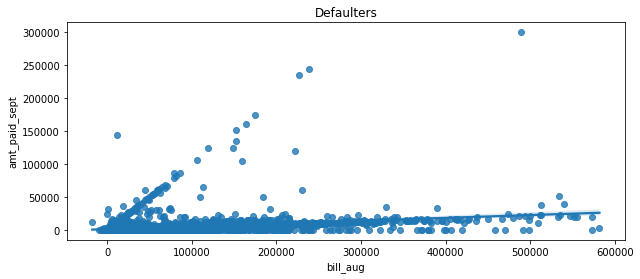

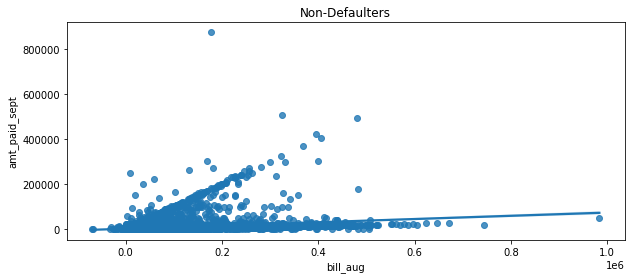

In [95]:
# Bill_August Vs Amt_paid_September for defaulters and Non-defaulters
# plotting regplot for Billed amount in August and amount paid September
non_defaulter = dataset[dataset['default_nxt_mnth']==0]
fig=plt.figure(figsize=(10,4))
sns.regplot(x = defaulter['bill_aug'], y =defaulter['amt_paid_sept']).set(title='Defaulters')
plt.show()
fig=plt.figure(figsize=(10,4))
sns.regplot(x = non_defaulter['bill_aug'], y =non_defaulter['amt_paid_sept']).set(title='Non-Defaulters')
plt.show()

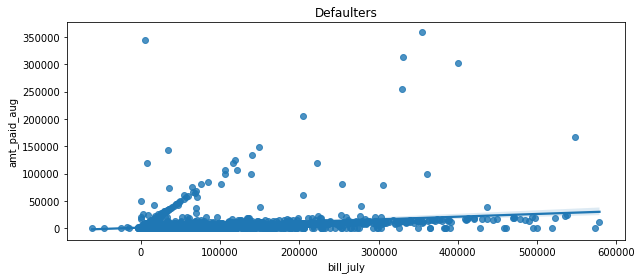

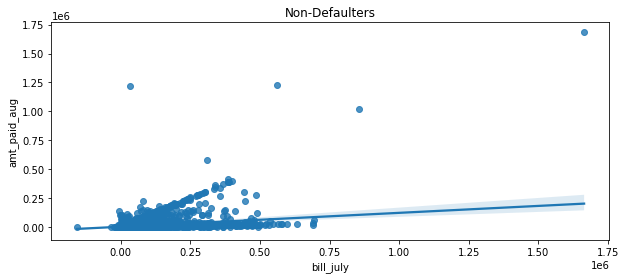

In [96]:
# Bill_July Vs Amt_paid_August for defaulters and Non-defaulters
# plotting regplot for Billed amount in July and amount paid August
fig=plt.figure(figsize=(10,4))
sns.regplot(x = defaulter['bill_july'], y =defaulter['amt_paid_aug']).set(title='Defaulters')
plt.show()
fig=plt.figure(figsize=(10,4))
sns.regplot(x = non_defaulter['bill_july'], y =non_defaulter['amt_paid_aug']).set(title='Non-Defaulters')
plt.show()

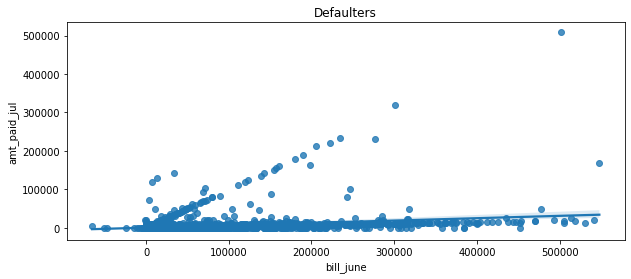

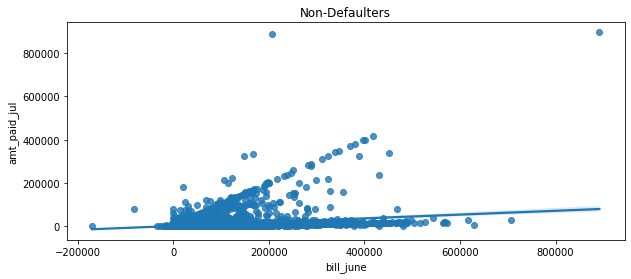

In [97]:
# Bill_June Vs Amt_paid_july for defaulters and Non-defaulters
# plotting regplot for Billed amount in June and amount paid july
fig=plt.figure(figsize=(10,4))
sns.regplot(x = defaulter['bill_june'], y =defaulter['amt_paid_jul']).set(title='Defaulters')
plt.show()
fig=plt.figure(figsize=(10,4))
sns.regplot(x = non_defaulter['bill_june'], y =non_defaulter['amt_paid_jul']).set(title='Non-Defaulters')
plt.show()

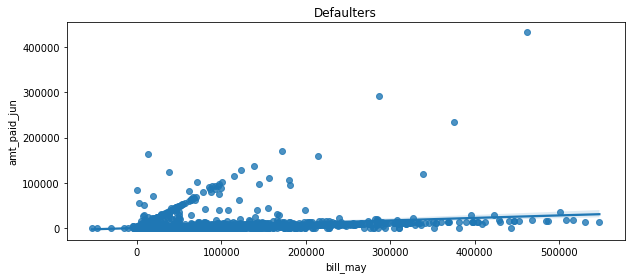

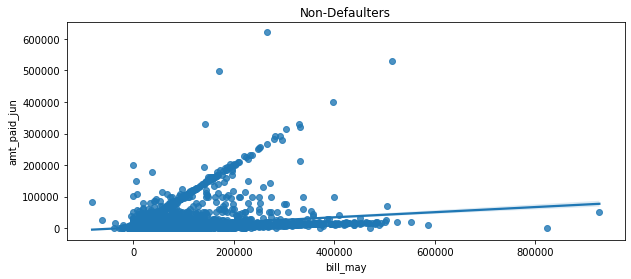

In [98]:
# Bill_May Vs Amt_paid_june for defaulters and Non-defaulters
# plotting regplot for Billed amount in May and amount paid june
fig=plt.figure(figsize=(10,4))
sns.regplot(x = defaulter['bill_may'], y =defaulter['amt_paid_jun']).set(title='Defaulters')
plt.show()
fig=plt.figure(figsize=(10,4))
sns.regplot(x = non_defaulter['bill_may'], y =non_defaulter['amt_paid_jun']).set(title='Non-Defaulters')
plt.show()

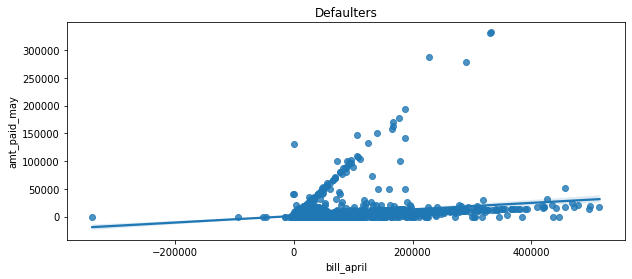

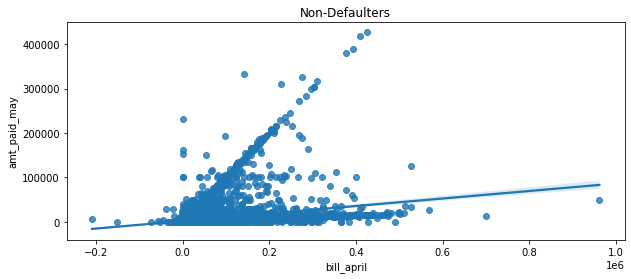

In [99]:
# Bill_April Vs Amt_paid_may for defaulters and Non-defaulters
# plotting Reg plots for Billed amount in April and amount paid May
fig=plt.figure(figsize=(10,4))
sns.regplot(x = defaulter['bill_april'], y =defaulter['amt_paid_may']).set(title='Defaulters')
plt.show()
fig=plt.figure(figsize=(10,4))
sns.regplot(x = non_defaulter['bill_april'], y =non_defaulter['amt_paid_may']).set(title='Non-Defaulters')
plt.show()

**Pay_down ratio**: Ratio between paid amount in next month and the billed amount of current month.

Example:
Pay_down ratio for april month will be ratio of paid amount in next month and the billed amount of current month. Its basically **"How much of total bill a customer has paid?"**.

In [100]:
# creating a copy of dataframe for experimenting with pay down ratios each month
pay_down_df = dataset.copy()
# Creating new columns for pay_down ratios for each month
pay_down_df['pd_apr'] = np.where(pay_down_df['bill_april'] != 0, pay_down_df['amt_paid_may']/pay_down_df['bill_april'], 0)
pay_down_df['pd_may'] = np.where(pay_down_df['bill_may'] != 0, pay_down_df['amt_paid_jun']/pay_down_df['bill_may'], 0)
pay_down_df['pd_june'] = np.where(pay_down_df['bill_june'] != 0, pay_down_df['amt_paid_jul']/pay_down_df['bill_june'], 0)
pay_down_df['pd_july'] = np.where(pay_down_df['bill_july'] != 0, pay_down_df['amt_paid_aug']/pay_down_df['bill_july'], 0)
pay_down_df['pd_aug'] = np.where(pay_down_df['bill_aug'] != 0, pay_down_df['amt_paid_sept']/pay_down_df['bill_aug'], 0)
pay_down_df.head(3)

,cust_id,max_credit_limit,gender,education,marital_status,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,amt_paid_sept,amt_paid_aug,amt_paid_jul,amt_paid_jun,amt_paid_may,amt_paid_april,default_nxt_mnth,pd_apr,pd_may,pd_june,pd_july,pd_aug
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.000000,0.000000,0.000000,1.000000,0.00000
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.000000,0.289436,0.305623,0.372856,0.00000
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.064313,0.066899,0.069779,0.110628,0.10822


In [101]:
# dataframes for defaulters and non-defaulters
def_1 = pay_down_df[pay_down_df['default_nxt_mnth']==1]     # dataframe for defaulters
def_0 = pay_down_df[pay_down_df['default_nxt_mnth']==0]     # dataframe for non-defaulters

In [102]:
print("Defaulters average pay_down ratio each month:")
print("April", round(def_1['pd_apr'].mean(),2))
print("May:", round(def_1['pd_may'].mean(),2))
print("June:", round(def_1['pd_june'].mean(),2))
print("July:", round(def_1['pd_july'].mean(),2))
print("August:", round(def_1['pd_aug'].mean(),2))

Defaulters average pay_down ratio each month:
April 0.36
May: 0.12
June: 0.21
July: 0.27
August: 0.23


In [103]:
print("Non-Defaulters average pay_down ratio each month:")
print("April", round(def_0['pd_apr'].mean(),2))
print("May:", round(def_0['pd_may'].mean(),2))
print("June:", round(def_0['pd_june'].mean(),2))
print("July:", round(def_0['pd_july'].mean(),2))
print("August:", round(def_0['pd_aug'].mean(),2))

Non-Defaulters average pay_down ratio each month:
April 0.33
May: -0.19
June: -3.15
July: 0.71
August: 0.46


**Observations**:
* Basis relational plots, Majority of the defaulters have paid very small or negligible portion of billed amount in last 6 months. However, the trend is almost similar for non-defaulters as well. 
* In order to have better clarity about payment trends for defaulters and non-defaulters, I have created new features "pay_down_X", i.e., the ratio of amount paid to Bill amount each month.
* **Found that "On average, defaulters overall pay_down ratio kept decreasing each successive month, while for non-defaulters, the ratio has an overall increasing trend"**. Further, negative pay_down ratio were seen for non-defaulters, implying that they had negative bills due to payment of additional amount over the billed amount.

### Correlation matrix

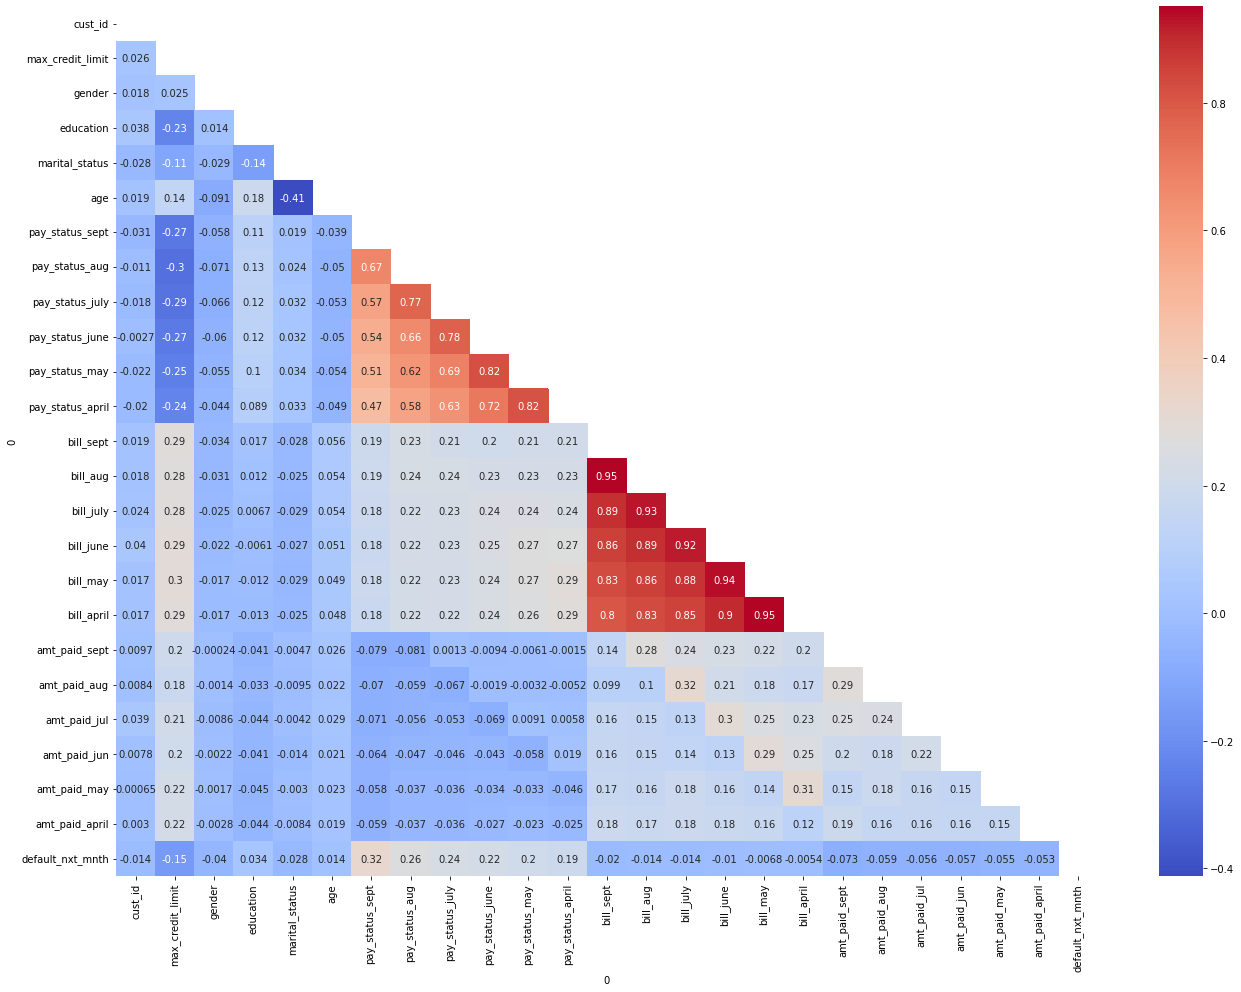

In [104]:
# Plotting heatmap for correalation matrix
fig,ax = plt.subplots(figsize=(22, 16))
corr = dataset.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
sns.heatmap(corr,annot=True,cmap='coolwarm',mask=matrix)

**Observations**:
1. bill_X for all 6 months are strongly correlated (>0.8)
2. pay_status_X of all 6 months are moderately correlated (>0.47).
3. Target variable is moderately correlated with "pay_status_sept"

## **4. Multi-variate Analysis**

### 1. Age, Gender and Defaults

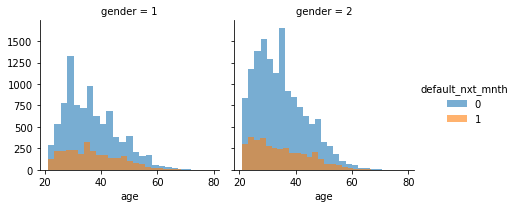

In [105]:
# Facetplot for relationship between age, gender and defaults.
g = sns.FacetGrid(dataset, col='gender', hue='default_nxt_mnth')
g.map(plt.hist, 'age', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

In [106]:
# Creating crosstable to analyse relationship between age_groups, gender and default chances
age_gen_def = pd.crosstab(age_binned.age_bins, [age_binned.gender, age_binned.default_nxt_mnth],rownames=['age_bins'], colnames=['gender', 'default_nxt_mnth'])
age_gen_def['male_default'] = round(((age_gen_def[1][1]/(age_gen_def[1][0]+age_gen_def[1][1]))*100),2)
age_gen_def['female_default'] = round(((age_gen_def[2][1]/(age_gen_def[2][0]+age_gen_def[2][1]))*100),2)
age_gen_def

gender               1           2       male_default female_default
default_nxt_mnth     0     1     0     1                            
age_bins                                                            
(20, 30]          2929   913  5613  1558        23.76          21.73
(30, 40]          3350  1013  5174  1176        23.22          18.52
(40, 50]          1939   648  2667   751        25.05          21.97
(50, 60]           686   261   807   243        27.56          23.14
(60, 70]           105    35    84    33        25.00          28.21
(70, 80]             6     3     4     2        33.33          33.33

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

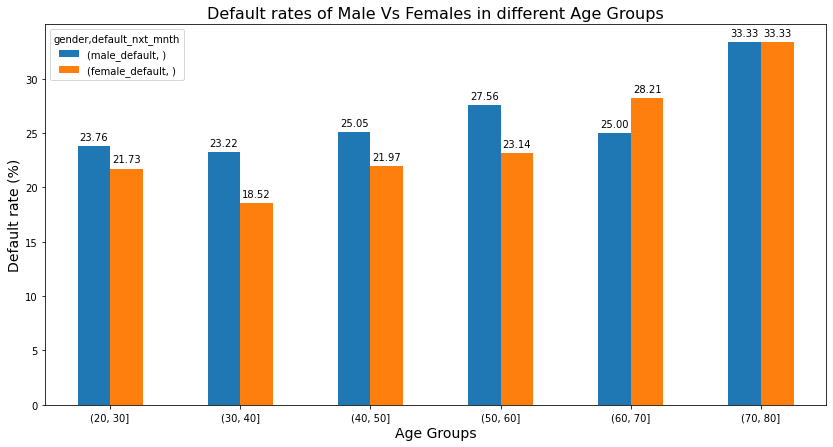

In [107]:
# Plotting Default rates across various age groups basis Gender of customers
plt3 = age_gen_def[['male_default','female_default']].plot(kind='bar', figsize=(14,7))
annot(plt3)
plt.title("Default rates of Male Vs Females in different Age Groups", fontsize = 16)
plt.xlabel("Age Groups", fontsize = 14)
plt.ylabel("Default rate (%)", fontsize = 14)
plt.xticks(rotation = 0)

**Observations**:
1. Both Male and Females of age group 31 to 40 years are least likely to default in their respective gender population.
2. Among all customers, customers who are Female and of age group 31 to 40 years are least likely to default next month.

### 2. Marriage, Gender and Default status

In [108]:
# Calculating defaults rates in 6 categories basis Gender-Marital Status
gen_marital_def = dataset.groupby(['gender','marital_status','default_nxt_mnth']).size().reset_index(name='count2')
total_def1 = gen_marital_def[gen_marital_def['default_nxt_mnth']==1].groupby(['gender','marital_status'])['count2'].sum().to_frame()
total_pop1 = gen_marital_def.groupby(['gender','marital_status'])['count2'].sum().to_frame()
gen_marital_def1 = round((total_def1*100/total_pop1), 2)
gen_marital_def1.unstack()

count2              
marital_status      1      2      3
gender                             
1               25.93  22.66  28.97
2               21.96  19.72  20.26

Text(0, 0.5, 'Default Rate (%)')

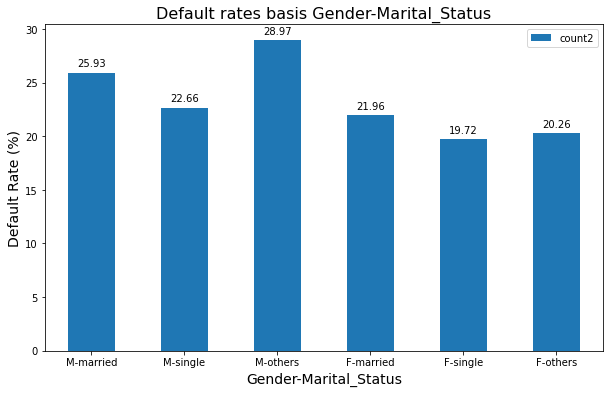

In [109]:
# Plotting Default rates basis Gender-Marital_Status
g3 = gen_marital_def1.plot(kind='bar', figsize = (10,6))
g3.set_xticklabels(['M-married','M-single','M-others','F-married','F-single','F-others'])
plt.xticks(rotation = 0)
annot(g3)
plt.title('Default rates basis Gender-Marital_Status', fontsize = 16)
plt.xlabel('Gender-Marital_Status', fontsize = 14)
plt.ylabel('Default Rate (%)', fontsize = 14)

In [110]:
# Getting shares of 6 categories among total defaulters
gen_marital_def['def_percent'] = np.where(gen_marital_def['default_nxt_mnth']==1, round(((gen_marital_def['count2']/
                                                                             (gen_marital_def[gen_marital_def['default_nxt_mnth']==1]['count2'].sum()))*100),2), 0)
gen_marital_def[gen_marital_def['default_nxt_mnth']==1].sort_values(by='def_percent',ascending=False)

,gender,marital_status,default_nxt_mnth,count2,def_percent
7,2,1,1,1860,28.03
9,2,2,1,1856,27.97
3,1,2,1,1485,22.38
1,1,1,1,1346,20.28
11,2,3,1,47,0.71
5,1,3,1,42,0.63


Text(0, 0.5, '% Share of total Defaulters')

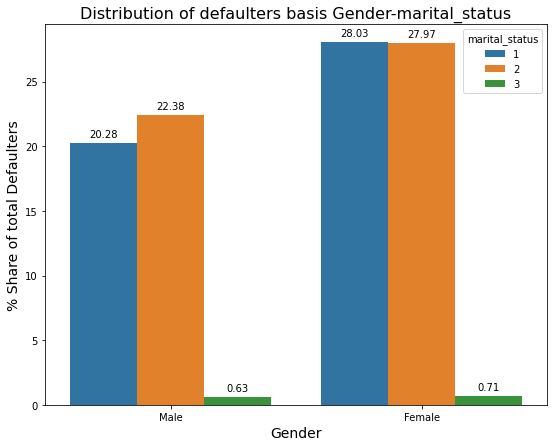

In [111]:
# Distribution of defaulters basis Gender-education
fig, ax = plt.subplots(figsize = (9,7))
g4 = sns.barplot(x='gender',y='def_percent', hue='marital_status', data=gen_marital_def[gen_marital_def['default_nxt_mnth']==1], ci=None)
g4.set_xticklabels(['Male','Female'])
annot(g4)
plt.title('Distribution of defaulters basis Gender-marital_status', fontsize = 16)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('% Share of total Defaulters', fontsize = 14)

**Observations**:
1. **Not considering others category due to very few observations, found that the chances of a Married Male defaulting is the highest (~25.9%)**
2. **Single Females are least likely to default next month (~19.7%)**.
3. Among defaulters, Married females have the highest share (~28%), shortly followed by Single Females. Its logical, as we have earlier seen that majority of customers are Females (around 60%).

### 3. Education, Gender and Default rate

In [112]:
# Calculating default rates in 8 categories basis Gender-education
gen_edu_def = dataset.groupby(['gender','education','default_nxt_mnth']).size().reset_index(name='count1')
total_def = gen_edu_def[gen_edu_def['default_nxt_mnth']==1].groupby(['gender','education'])['count1'].sum().to_frame()
total_pop = gen_edu_def.groupby(['gender','education'])['count1'].sum().to_frame()
gen_edu_def1 = round((total_def*100/total_pop), 2)
gen_edu_def1.unstack()

count1                   
education      1     2      3     4
gender                             
1          20.81  26.2  27.39  8.24
2          18.14  22.2  23.64  6.38

Text(0, 0.5, 'Default Rate (%)')

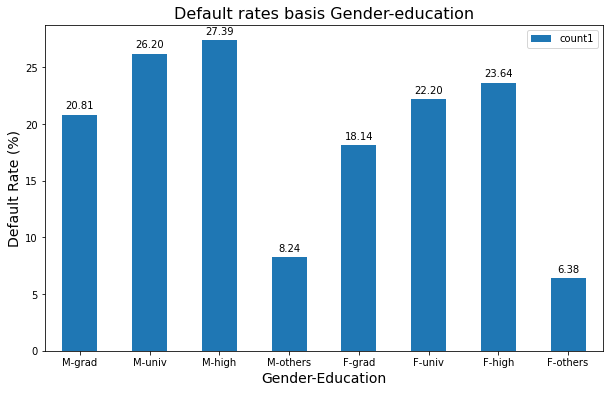

In [113]:
# Plotting bar chart to visualize Default rates basis Gender-education
g2 = gen_edu_def1.plot(kind='bar', figsize = (10,6))
g2.set_xticklabels(['M-grad','M-univ','M-high','M-others','F-grad','F-univ','F-high','F-others'])
plt.xticks(rotation = 0)
annot(g2)
plt.title('Default rates basis Gender-education', fontsize = 16)
plt.xlabel('Gender-Education', fontsize = 14)
plt.ylabel('Default Rate (%)', fontsize = 14)

In [114]:
# Getting shares of 8 categories among total defaulters
gen_edu_def['def_percent'] = np.where(gen_edu_def['default_nxt_mnth']==1, round(((gen_edu_def['count1']/
                                                                             (gen_edu_def[gen_edu_def['default_nxt_mnth']==1]['count1'].sum()))*100),2), 0)
gen_edu_def[gen_edu_def['default_nxt_mnth']==1].sort_values(by='def_percent',ascending=False)

,gender,education,default_nxt_mnth,count1,def_percent
11,2,2,1,1922,28.96
3,1,2,1,1408,21.22
9,2,1,1,1130,17.03
1,1,1,1,906,13.65
13,2,3,1,692,10.43
5,1,3,1,545,8.21
15,2,4,1,19,0.29
7,1,4,1,14,0.21


Text(0, 0.5, '% Share of total Defaulters')

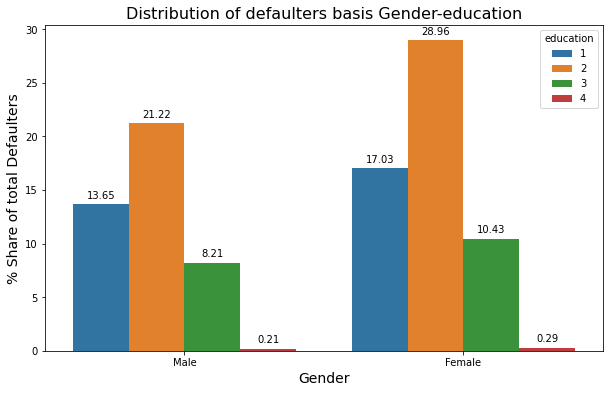

In [115]:
# Distribution of defaulters basis Gender-education
fig, ax = plt.subplots(figsize = (10,6))
g1 = sns.barplot(x='gender',y='def_percent', hue='education', data=gen_edu_def[gen_edu_def['default_nxt_mnth']==1], ci=None)
g1.set_xticklabels(['Male','Female'])
annot(g1)
plt.title('Distribution of defaulters basis Gender-education', fontsize = 16)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('% Share of total Defaulters', fontsize = 14)

**Observations**:
1. **A Male customer with High-school level education, has the highest chance of defaulting (~27.4%), shortly followed by Male with University level (26.2%)**
2. Not considering others category due to very few observations, found that **Females with graduate education are least likely to default next month (~18%)**.
3. Among defaulters, Females with university level education has the highest share (~29%), followed by males of university level education (21.2%).

### 4. Marriage, AGE, Gender and Default rate

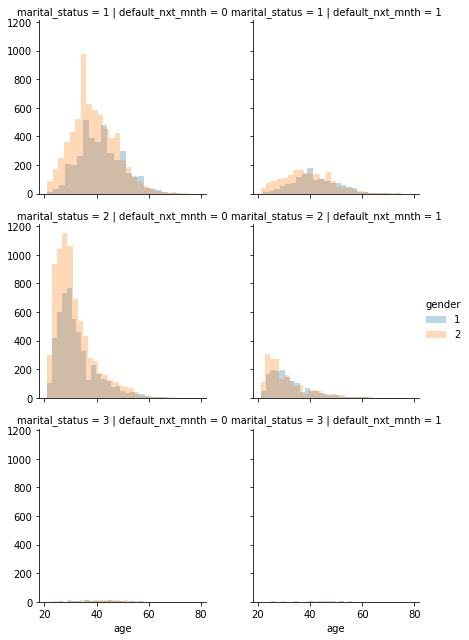

In [116]:
# FacetGrid to undersatnd distribution of defaults for different marriage, gender and ages.
g = sns.FacetGrid(dataset, col='default_nxt_mnth', row= "marital_status", hue='gender')
g.map(plt.hist, 'age', alpha=0.3, bins=25) 
g.add_legend()

### 5. Education, AGE, Gender and Default rate

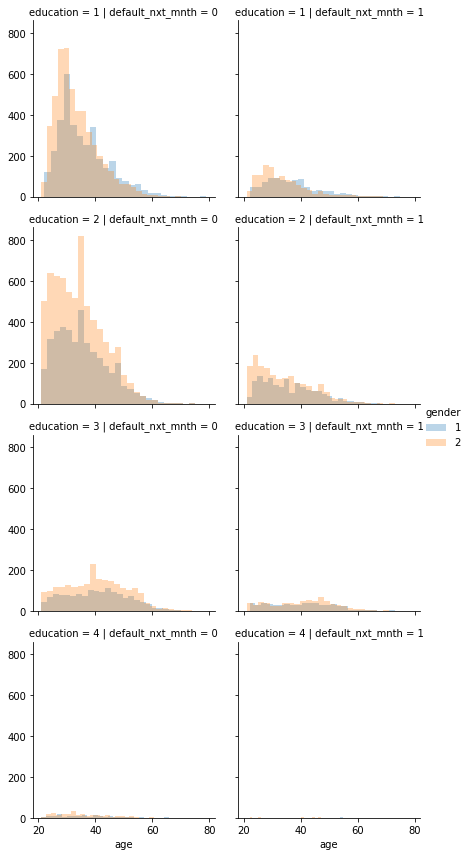

In [117]:
# FacetGrid to undersatnd distribution of defaults for different education levels, gender and ages.
g = sns.FacetGrid(dataset, col='default_nxt_mnth', row= "education", hue='gender')
g.map(plt.hist, 'age', alpha=0.3, bins=25) 
g.add_legend()

# **D. Feature Engineering**

## **1. Feature Extraction**

1. binned_ages feature **age_bins**
2. Average Monthly expenditure for last 5 months **avg_spends_X**
3. How much of maximum credit limit a customer has utilized each month? **utilized%_X**

In [118]:
# As per dataset given, there are total 25 columns
dataset.columns, len(dataset.columns)

(Index(['cust_id', 'max_credit_limit', 'gender', 'education', 'marital_status',
        'age', 'pay_status_sept', 'pay_status_aug', 'pay_status_july',
        'pay_status_june', 'pay_status_may', 'pay_status_april', 'bill_sept',
        'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
        'amt_paid_sept', 'amt_paid_aug', 'amt_paid_jul', 'amt_paid_jun',
        'amt_paid_may', 'amt_paid_april', 'default_nxt_mnth'],
       dtype='object', name=0), 25)

### **1. age_bins feature**

In [119]:
# Creating a new feature basis ages of customers
# 1: '21_to_30';    2: '31_to_40',
# 3: '41_to_50';    4: '51_to_60',
# 5. '61_to_70';    6. '71_to_80']
dataset['age_bins'] = pd.cut(x=dataset['age'],bins=[20,30,40,50,60,70,80],labels=[1,2,3,4,5,6])
dataset['age_bins'] = pd.to_numeric(dataset['age_bins'])
dataset.head()

,cust_id,max_credit_limit,gender,education,marital_status,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,amt_paid_sept,amt_paid_aug,amt_paid_jul,amt_paid_jun,amt_paid_may,amt_paid_april,default_nxt_mnth,age_bins
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,2
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,2
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,4


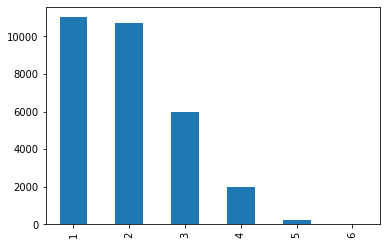

In [120]:
# Barplot for count of customers under different age-bins
dataset['age_bins'].value_counts().plot(kind='bar')

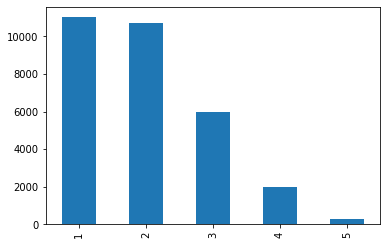

In [121]:
# Since customers in age categories 5 and 6 are very few, lets merge them together as 5.
# 5: 61 to 80 years.
dataset.loc[dataset['age_bins']==6,'age_bins'] = 5
dataset['age_bins'].value_counts().plot(kind='bar')

### **2. avg_spends_X Feature**

* **How to arrive at average spends for a given month?** 

Basically its the difference between following 2 components:
1. Bill amount for next month
2. Difference of Bill amount of current month and amount paid in the next month.

**Note**:
* For April month, we will consider bill amounts for may and april, plus amount paid in may. This will give us average spend for April month
* Similarly for May month, we will consider bill amounts for June and May, plus amount paid in June. This will give average spend in May.
* This will be done till august month, as for september we wont have bill amount for october month (Future data).

In [122]:
# For April Month
dataset['avg_spends_apr'] = (dataset['bill_may'] - (dataset['bill_april'] - dataset['amt_paid_may'])) / dataset['max_credit_limit']

# For May Month
dataset['avg_spends_may'] = (dataset['bill_june'] - (dataset['bill_may'] - dataset['amt_paid_jun'])) / dataset['max_credit_limit']

# For June Month
dataset['avg_spends_jun'] = (dataset['bill_july'] - (dataset['bill_june'] - dataset['amt_paid_jul'])) / dataset['max_credit_limit']

# For july Month
dataset['avg_spends_jul'] = (dataset['bill_aug'] - (dataset['bill_july'] - dataset['amt_paid_aug'])) / dataset['max_credit_limit']

# For August Month
dataset['avg_spends_aug'] = (dataset['bill_sept'] - (dataset['bill_aug'] - dataset['amt_paid_sept'])) / dataset['max_credit_limit']

In [123]:
dataset.head()

,cust_id,max_credit_limit,gender,education,marital_status,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,amt_paid_sept,amt_paid_aug,amt_paid_jul,amt_paid_jun,amt_paid_may,amt_paid_april,default_nxt_mnth,age_bins,avg_spends_apr,avg_spends_may,avg_spends_jun,avg_spends_jul,avg_spends_aug
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,0.000000,0.000000,0.034450,0.155100,0.040550
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,0.001617,0.006808,0.003417,0.000358,0.007975
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,2,0.004433,0.004256,0.002533,0.021867,0.185889
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,2,0.009620,0.009100,0.443540,0.019220,0.015140
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,4,0.014080,0.215880,0.497900,0.130320,0.098940


### **3. utilized%_X Feature**

1. Utilization Rate: How much of maximum credit limit a customer has spent in a month?
2. Change in Utilization Rate in latest month, i.e., September 2005 or say, speed of change in utilization rate: we will arrive at his by getting the ratio of "utilization rate of september month" to "average of utilization rates for previous 5 months"

In [124]:
# Max limit minus billed amount will give us Unused credit amount.
# Dividing it by Max credit limit to get a ratio.
dataset['utilized%_apr'] = dataset.bill_april / dataset.max_credit_limit
dataset['utilized%_may'] = dataset.bill_may / dataset.max_credit_limit
dataset['utilized%_jun'] = dataset.bill_june / dataset.max_credit_limit
dataset['utilized%_jul'] = dataset.bill_july / dataset.max_credit_limit
dataset['utilized%_aug'] = dataset.bill_aug / dataset.max_credit_limit
dataset['utilized%_sept'] = dataset.bill_sept / dataset.max_credit_limit

In [125]:
# Change in Utilization Rate in latest month, i.e., September 2005 or say, speed of change in utilization rate
# we will arrive at his by getting 
# ratio of "average of utilization rates for previous 5 months" to "utilization rate of september month"
dataset['avg_uti_till_aug'] = (dataset['utilized%_aug']+dataset['utilized%_jul']+dataset['utilized%_jun']+dataset['utilized%_may']+dataset['utilized%_apr'])/5
dataset['speed_utirate_sept'] = np.where(dataset['avg_uti_till_aug']!=0,dataset['utilized%_sept']/dataset['avg_uti_till_aug'],dataset['utilized%_sept'])

In [126]:
# A peek into the dataset after creating new features
dataset.head()

,cust_id,max_credit_limit,gender,education,marital_status,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,amt_paid_sept,amt_paid_aug,amt_paid_jul,amt_paid_jun,amt_paid_may,amt_paid_april,default_nxt_mnth,age_bins,avg_spends_apr,avg_spends_may,avg_spends_jun,avg_spends_jul,avg_spends_aug,utilized%_apr,utilized%_may,utilized%_jun,utilized%_jul,utilized%_aug,utilized%_sept,avg_uti_till_aug,speed_utirate_sept
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,0.000000,0.000000,0.034450,0.155100,0.040550,0.000000,0.000000,0.000000,0.034450,0.155100,0.195650,0.037910,5.160907
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,0.001617,0.006808,0.003417,0.000358,0.007975,0.027175,0.028792,0.027267,0.022350,0.014375,0.022350,0.023992,0.931573
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,2,0.004433,0.004256,0.002533,0.021867,0.185889,0.172767,0.166089,0.159233,0.150656,0.155856,0.324878,0.160920,2.018878
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,2,0.009620,0.009100,0.443540,0.019220,0.015140,0.590940,0.579180,0.566280,0.985820,0.964660,0.939800,0.737376,1.274519
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,4,0.014080,0.215880,0.497900,0.130320,0.098940,0.382620,0.382920,0.418800,0.716700,0.113400,0.172340,0.402888,0.427762


In [127]:
# Statistical parameters for utilized_X varaibles
dataset[['utilized%_aug','utilized%_jul','utilized%_jun','utilized%_may','utilized%_apr']].describe()

,utilized%_aug,utilized%_jul,utilized%_jun,utilized%_may,utilized%_apr
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.411128,0.392192,0.359503,0.333108,0.318585
std,0.404555,0.396449,0.368686,0.350542,0.345301
min,-1.395540,-1.025100,-1.374500,-0.876743,-1.509530
25%,0.018318,0.016030,0.014299,0.011133,0.007800
50%,0.296057,0.273135,0.242066,0.212026,0.185224
75%,0.806500,0.755107,0.667937,0.602245,0.582169
max,6.380500,10.688575,5.146850,4.935500,3.885550


In [128]:
# Defaulters' speed of change in utilization rate in latest month september
dataset[dataset['default_nxt_mnth']==1]['speed_utirate_sept'].mean()

1.2361674984904367

In [129]:
# Non-Defaulters' speed of change in utilization rate in latest month september
dataset[dataset['default_nxt_mnth']==0]['speed_utirate_sept'].mean()

-0.37486522791819454

In [130]:
# Let's drop column pertaining to average utilization rate for previous 5 months till august.
dataset.drop('avg_uti_till_aug', axis=1, inplace=True)

**Observations**:
1. Defaulters utilization rate has increased in september (+1.24%), while that of non-defaulters have decreased (-0.37%).
2. Basis above, we can say that Customers whose utilization rate of total credit limit increased significantly in latest month of september, have highest chances of defaulting. While customers with decreased utilization rate in latest month september have least chances of defaulting.

## **2. Updated Columns analysis**

In [131]:
# Updated list of columns
dataset.columns, len(dataset.columns)
# Total 38 columns now

(Index(['cust_id', 'max_credit_limit', 'gender', 'education', 'marital_status',
        'age', 'pay_status_sept', 'pay_status_aug', 'pay_status_july',
        'pay_status_june', 'pay_status_may', 'pay_status_april', 'bill_sept',
        'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
        'amt_paid_sept', 'amt_paid_aug', 'amt_paid_jul', 'amt_paid_jun',
        'amt_paid_may', 'amt_paid_april', 'default_nxt_mnth', 'age_bins',
        'avg_spends_apr', 'avg_spends_may', 'avg_spends_jun', 'avg_spends_jul',
        'avg_spends_aug', 'utilized%_apr', 'utilized%_may', 'utilized%_jun',
        'utilized%_jul', 'utilized%_aug', 'utilized%_sept',
        'speed_utirate_sept'],
       dtype='object', name=0), 38)

In [132]:
# Let's Drop cust_id
dataset = dataset.drop(['cust_id'], axis = 1)

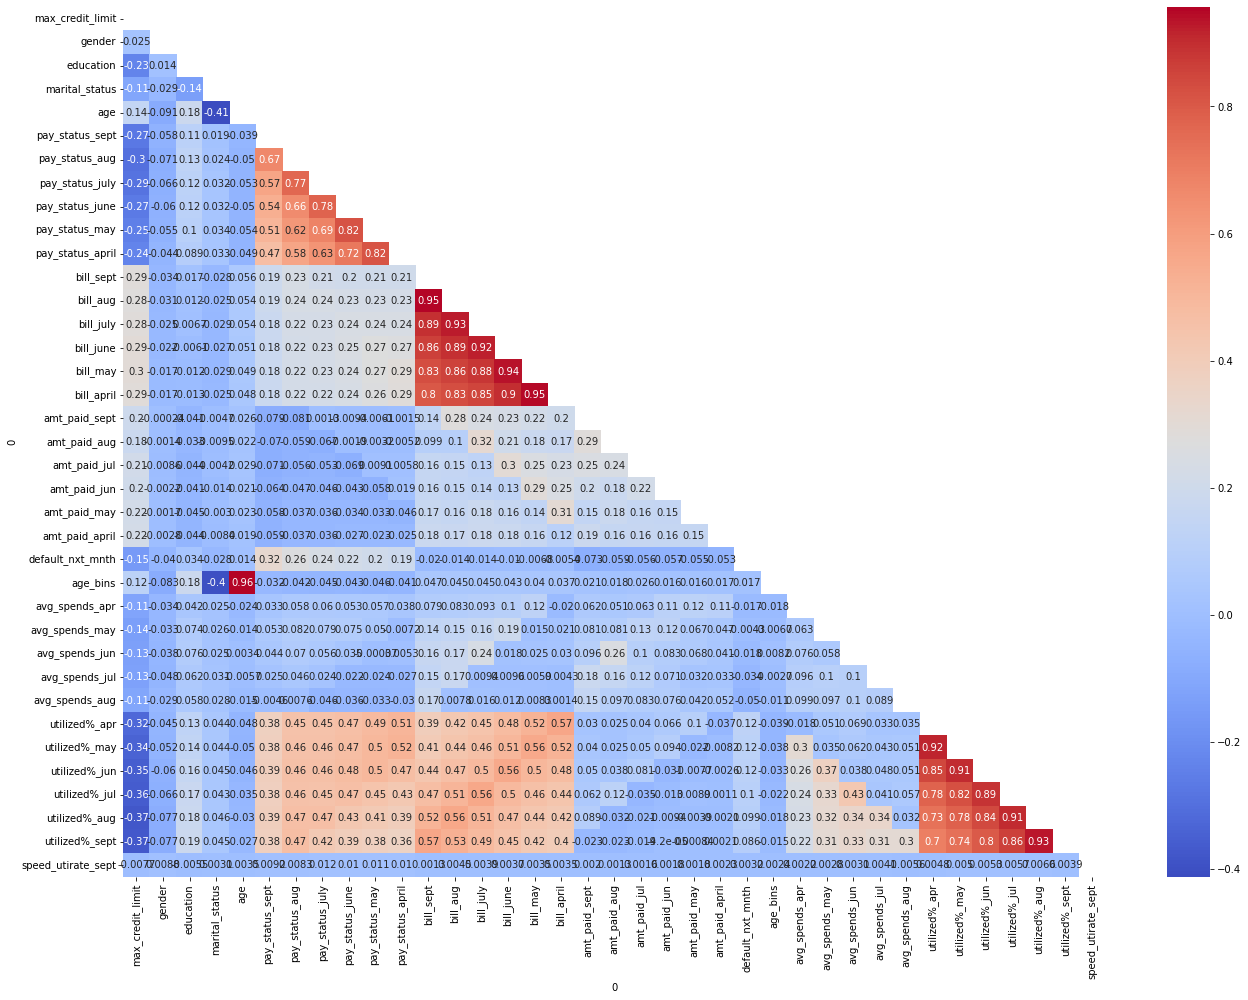

In [133]:
# Checking pearson's coefficients for all numerical features after extraction
fig, ax = plt.subplots(figsize=(22, 16))
corr1 = dataset.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix1 = np.triu(corr1)
sns.heatmap(corr1, annot=True, cmap='coolwarm', mask=matrix1)

**Observations**:
1. Total number of predictors after feature extraction is 35.
2. Age and age_bins are strongly correlated features.
3. bill_X are strongly correlated.
4. pay_status_X are moderately correlated.
5. utilized%_X are moderately correlated.

## **3. Encoding Categorical Features**

Encoding Categorical Features 
1. Gender
2. Education
3. Marital Status

Above features have numerical values and so have inherent ordinal type encoding. To avoid any unwanted influence on model due to ordinal preference, i have decided to do label encoding.

In [134]:
# one-hot encoding of gender, education and marital status
dataset = pd.concat([pd.get_dummies(dataset['gender'], prefix='gender', drop_first=True),
                     pd.get_dummies(dataset['education'], prefix='education', drop_first=True), 
                    pd.get_dummies(dataset['marital_status'], prefix='marital', drop_first=True),
                    dataset], axis=1)
# Drop original columns as it is now encoded
dataset = dataset.drop(['gender','education','marital_status'], axis = 1)

In [135]:
dataset.head(2)

,gender_2,education_2,education_3,education_4,marital_2,marital_3,max_credit_limit,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,amt_paid_sept,amt_paid_aug,amt_paid_jul,amt_paid_jun,amt_paid_may,amt_paid_april,default_nxt_mnth,age_bins,avg_spends_apr,avg_spends_may,avg_spends_jun,avg_spends_jul,avg_spends_aug,utilized%_apr,utilized%_may,utilized%_jun,utilized%_jul,utilized%_aug,utilized%_sept,speed_utirate_sept
0,1,1,0,0,0,0,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,0.000000,0.000000,0.034450,0.155100,0.040550,0.000000,0.000000,0.000000,0.03445,0.155100,0.19565,5.160907
1,1,1,0,0,1,0,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,0.001617,0.006808,0.003417,0.000358,0.007975,0.027175,0.028792,0.027267,0.02235,0.014375,0.02235,0.931573


In [136]:
dataset.columns, len(dataset.columns)
# Total new features is 40, out of which 39 are potential predictor variables.

(Index(['gender_2', 'education_2', 'education_3', 'education_4', 'marital_2',
        'marital_3', 'max_credit_limit', 'age', 'pay_status_sept',
        'pay_status_aug', 'pay_status_july', 'pay_status_june',
        'pay_status_may', 'pay_status_april', 'bill_sept', 'bill_aug',
        'bill_july', 'bill_june', 'bill_may', 'bill_april', 'amt_paid_sept',
        'amt_paid_aug', 'amt_paid_jul', 'amt_paid_jun', 'amt_paid_may',
        'amt_paid_april', 'default_nxt_mnth', 'age_bins', 'avg_spends_apr',
        'avg_spends_may', 'avg_spends_jun', 'avg_spends_jul', 'avg_spends_aug',
        'utilized%_apr', 'utilized%_may', 'utilized%_jun', 'utilized%_jul',
        'utilized%_aug', 'utilized%_sept', 'speed_utirate_sept'],
       dtype='object'), 40)

# **E. Basic Preparations for Modelling**

## **1. Train-Test splitting**

In [137]:
# Importing train_test_split class
from sklearn.model_selection import train_test_split
# For all features
y = dataset[['default_nxt_mnth']].copy() # target values
X = dataset.drop(['default_nxt_mnth'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,shuffle=True, stratify=y)

In [138]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)
# Train and test dataset: Both have equal share of defaulters and non-defaulters.
# But defaulters <<< non-defaulters
# IMBALANCED DATASET

(default_nxt_mnth
 0                   0.778792
 1                   0.221208
 dtype: float64, default_nxt_mnth
 0                   0.778833
 1                   0.221167
 dtype: float64)

In [139]:
# Checking shape of X-Train datasets
X_train.shape, y_train.shape

((24000, 39), (24000, 1))

In [140]:
# A peek into training x-data
X_train.head(1)

,gender_2,education_2,education_3,education_4,marital_2,marital_3,max_credit_limit,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,amt_paid_sept,amt_paid_aug,amt_paid_jul,amt_paid_jun,amt_paid_may,amt_paid_april,age_bins,avg_spends_apr,avg_spends_may,avg_spends_jun,avg_spends_jul,avg_spends_aug,utilized%_apr,utilized%_may,utilized%_jun,utilized%_jul,utilized%_aug,utilized%_sept,speed_utirate_sept
22788,1,1,0,0,1,0,160000,33,2,2,3,2,0,0,161771,172632,168541,164310,162681,163005,15000,0,0,6100,12300,6100,2,0.07485,0.048306,0.026444,0.025569,0.025869,1.018781,1.016756,1.026938,1.053381,1.07895,1.011069,0.973153


## **2. Feature Selection**

In [ ]:
# Total predicor variables
X_train.columns, len(X_train.columns)

(Index(['gender_2', 'education_2', 'education_3', 'education_4', 'marital_2',
        'marital_3', 'max_credit_limit', 'age', 'pay_status_sept',
        'pay_status_aug', 'pay_status_july', 'pay_status_june',
        'pay_status_may', 'pay_status_april', 'bill_sept', 'bill_aug',
        'bill_july', 'bill_june', 'bill_may', 'bill_april', 'amt_paid_sept',
        'amt_paid_aug', 'amt_paid_jul', 'amt_paid_jun', 'amt_paid_may',
        'amt_paid_april', 'age_bins', 'avg_spends_apr', 'avg_spends_may',
        'avg_spends_jun', 'avg_spends_jul', 'avg_spends_aug', 'utilized%_apr',
        'utilized%_may', 'utilized%_jun', 'utilized%_jul', 'utilized%_aug',
        'utilized%_sept', 'speed_utirate_sept'],
       dtype='object'),
 39)

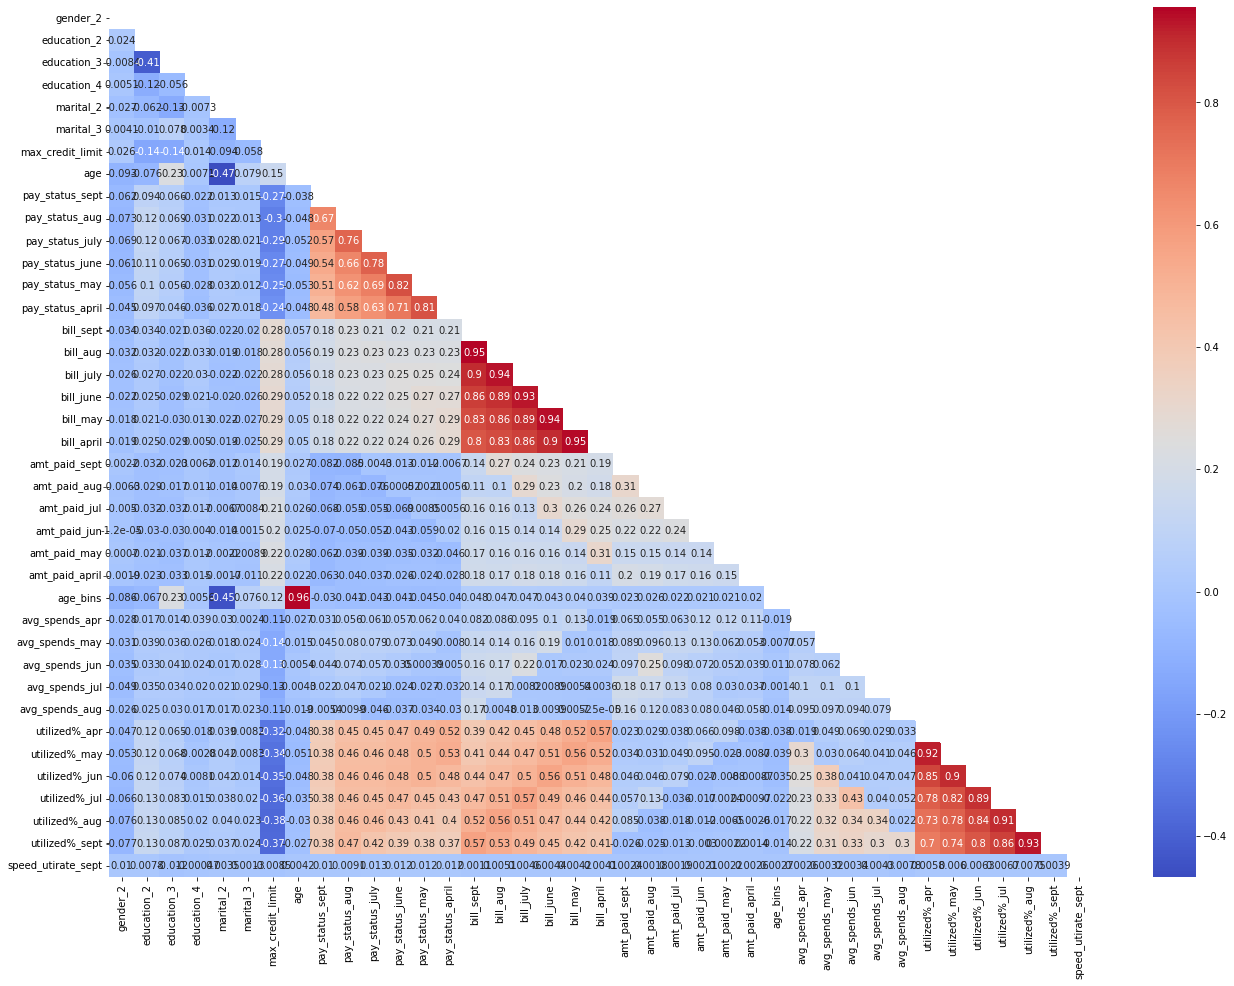

In [ ]:
# Checking pearson's coefficients for all numerical features after extraction
fig,ax = plt.subplots(figsize=(22, 16))
corr1=X_train.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix1 = np.triu(corr1)
sns.heatmap(corr1, annot=True, cmap='coolwarm', mask=matrix1)

* **Strongly correlated Features**:
  1. age_bins and age (0.96)
  2. bill_X variables
  3. utilized%_X variables

**Approach**: For selecting most informative features, i have decided to use RFE (Recursive Feature Selection) method, SelectKBest method and Sequential Forward selection method. After getting 3 sets of 30 most informative features basis above methods, i will take intersection set and using correlation matrix, will add remaining important features, setting aside highly correlated features. 

In [ ]:
# Using RFE (Recursive Feature Elimination) to arrive at 30 important features
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
rfe = RFE(estimator=RandomForestClassifier(class_weight='balanced'), n_features_to_select=30)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(class_weight='balanced'),
    n_features_to_select=30)

In [ ]:
# Feature names using RFE
rfe.get_feature_names_out()

array(['max_credit_limit', 'age', 'pay_status_sept', 'pay_status_aug',
       'pay_status_july', 'pay_status_may', 'bill_sept', 'bill_aug',
       'bill_july', 'bill_june', 'bill_may', 'bill_april',
       'amt_paid_sept', 'amt_paid_aug', 'amt_paid_jul', 'amt_paid_jun',
       'amt_paid_may', 'amt_paid_april', 'avg_spends_apr',
       'avg_spends_may', 'avg_spends_jun', 'avg_spends_jul',
       'avg_spends_aug', 'utilized%_apr', 'utilized%_may',
       'utilized%_jun', 'utilized%_jul', 'utilized%_aug',
       'utilized%_sept', 'speed_utirate_sept'], dtype=object)

In [ ]:
# Using SelectKBest to arrive at 30 most informative features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
threshold = 30  # the number of most relevant features
skb = SelectKBest(score_func=f_classif, k=threshold)
sel_skb = skb.fit(X_train, y_train)
# Getting feature names
sel_skb_index = sel_skb.get_support()
features_skb = X_train.iloc[:, sel_skb_index]
print('p_values', sel_skb.pvalues_)
print(features_skb.columns)

p_values [1.06061640e-011 9.56566449e-009 2.06234049e-006 1.26662144e-012
 1.50877617e-005 1.54919209e-001 4.50877363e-139 4.68539225e-002
 0.00000000e+000 0.00000000e+000 1.03658539e-308 4.91138086e-261
 3.42841217e-222 2.90059351e-191 4.31469315e-004 5.17215540e-003
 4.62548725e-003 3.34642288e-002 1.32537292e-001 2.05227346e-001
 4.57163050e-030 5.99232066e-024 6.82486743e-017 9.89854408e-018
 3.47881394e-016 1.46251545e-016 1.12579116e-002 4.03224226e-003
 9.91821218e-001 2.73040219e-002 2.51456502e-006 4.30274921e-013
 8.39372682e-088 3.79229504e-080 4.41618841e-076 7.21174355e-062
 2.01582888e-057 5.85063707e-045 5.02013691e-001]
Index(['gender_2', 'education_2', 'education_3', 'education_4', 'marital_2',
       'max_credit_limit', 'pay_status_sept', 'pay_status_aug',
       'pay_status_july', 'pay_status_june', 'pay_status_may',
       'pay_status_april', 'bill_sept', 'bill_aug', 'bill_july',
       'amt_paid_sept', 'amt_paid_aug', 'amt_paid_jul', 'amt_paid_jun',
       'amt_pai

In [ ]:
#importing the necessary libraries for SFS
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Sequential Forward Selection(sfs) for selecting 30 important features
from sklearn.ensemble import RandomForestClassifier
sfs = SFS(RandomForestClassifier(),
          k_features=30,
          forward=True,
          floating=False,
          scoring = 'roc_auc',
          cv = 3)

sfs.fit(X_train, y_train)
sfs.k_feature_names_

('gender_2',
 'education_4',
 'marital_3',
 'max_credit_limit',
 'pay_status_sept',
 'pay_status_aug',
 'pay_status_july',
 'pay_status_june',
 'pay_status_may',
 'pay_status_april',
 'bill_sept',
 'bill_aug',
 'bill_june',
 'bill_april',
 'amt_paid_sept',
 'amt_paid_aug',
 'amt_paid_jul',
 'amt_paid_jun',
 'amt_paid_may',
 'amt_paid_april',
 'avg_spends_apr',
 'avg_spends_may',
 'avg_spends_jun',
 'avg_spends_jul',
 'avg_spends_aug',
 'utilized%_apr',
 'utilized%_may',
 'utilized%_jun',
 'utilized%_jul',
 'utilized%_sept')

In [141]:
# Let's drop irrelevant and redundant features
X_train = X_train.drop(['age_bins','marital_3', 'bill_april','bill_june','pay_status_may','utilized%_may','utilized%_jul',
                        'utilized%_aug','education_4'], axis=1)
X_test = X_test.drop(['age_bins','marital_3', 'bill_april','bill_june','pay_status_may','utilized%_may','utilized%_jul',
                        'utilized%_aug','education_4'], axis=1)

## **2. Resolving the Imbalanced Classes of dataset**

Whenever we have Imbalanced classes in dataset, we must train model with equal proportions of examples of both classes to ensure accurate modelling. To do so, we need to apply **Resampling** techniques, either Undersample the majority class examples or Oversample the minority class examples.

1. **Under-sampling**: It is basically removing examples from majority class. This is done when we have large dataset (i.e., millions of examples); otherwise it will lead to **High Bias**.
2. **Over-sampling**: It is basically adding examples from minority class. This is done when we don't have a large dataset (i.e., not millions of examples). Due to addition of more examples, Chances of **Overfitting** is high.

For this dataset, I am going to experiment with both Undersampling and Over-sampling techniques. Since, training dataset has only 24000 observations, I am expecting that results will be better with over-sampling as compared to Undersampling. I will also try creating models using original imbalanced data (For comparing results)

### **1. TomekLinks for Undersampling:**
* Tomek links are points in the dataset whose nearest neighbor is a member of a different class. This includes outlier points embedded in a point cloud from another class, and boundary points in regions where it is unclear which of two or more classes is dominant. 
* The TomekLinks undersampler can be used to remove these points, like Cleaning the data!!

In [142]:
from imblearn.under_sampling import TomekLinks
# Instantiate the undersampling class
tomek_us = TomekLinks()
# transform the dataset
X_tomek, y_tomek = tomek_us.fit_resample(X_train, y_train.values)

In [143]:
# Checking distribution of classes after Undersampling
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_tomek))
# Took 7 seconds -faster -- 8 features reduced

Resampled dataset shape Counter({0: 17218, 1: 5309})


**Observations**:
1. TomekLinks for undersampling, did not improve balancing very much. The dataset is still imbalanced.
2. TomekLinks used in combination with other undersampling and oversampling techniques usually gives better results, than independently.

### **2. ClusterCentroids for Undersampling:**

* This algorithm performs K-means clustering on the majority classes, then creates new points which are averages of the coordinates of the generated clusters.
* It under samples the majority class by replacing a cluster of majority samples, by the cluster centroid of a KMeans algorithm. 

In [ ]:
from imblearn.under_sampling import ClusterCentroids
# define the undersampling method
centroid_us = ClusterCentroids(sampling_strategy='majority',random_state=42)
# transform the dataset
X_cen, y_cen = centroid_us.fit_resample(X_train, y_train.values)

In [ ]:
# Checking distribution of classes after Undersampling
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_cen))
# Took 10 minutes

Resampled dataset shape Counter({0: 5309, 1: 5309})


### **3. SMOTE Oversampling:**
* It generates synthetic data points for minority class.
* It works by picking random points from the minority class and then computes the K-nearest neighbors of this point. 
* After this, it starts adding synthetic points along the lines joining chosen point and its K-nearest points.
* It alleviates overfitting caused by random Over-sampling. Sometimes it introduces noise, if there is overlapping of classes.

In [144]:
from imblearn.over_sampling import SMOTE
# Instantiating the SMOTE class for oversampling
sm = SMOTE(random_state=45, sampling_strategy='minority')
# transform the dataset
X_smote, y_smote = sm.fit_resample(X_train, y_train.values)

In [145]:
# Checking distribution of classes after oversampling
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_smote))
# Took few seconds only (WAY FASTER!!) :-D

Resampled dataset shape Counter({0: 18691, 1: 18691})


### **4. SMOTE-Tomek Links Combined Re-sampling:**

* It beautifully combines the SMOTE's ability to generate synthetic data points for the minority class, with the TomekLinks' ability to remove the data that are identified as Tomeklinks from the majority class, thus cleaning such outliers.


In [146]:
from imblearn.combine import SMOTETomek
# Instatntiating the class
smtk = SMOTETomek(random_state=20, tomek = TomekLinks(sampling_strategy='majority'),
                  smote = SMOTE(sampling_strategy='minority'))
# transform the dataset
X_smtk, y_smtk = smtk.fit_resample(X_train, y_train.values)

In [147]:
# Checking distribution of classes after combined re-sampling
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_smtk))
# Took 18 seconds only (WAY FASTER!!) :-D

Resampled dataset shape Counter({1: 18691, 0: 18118})


# **F. Which Evaluation Metrics to use and Why?**

## **A. Recall Vs Precision Vs Accuracy**

Before deciding on evaluation metric, lets first understand the goals inherent in the given business problem:
1. **Minimize Risk** by correctly identifying all defaulters or as many as possible. Considering this, we can say that our goal is to reduce the False Negatives and as a result, Metric-of-concern is **Recall**.
  * A high recall implies that a large fraction of truly positive elements are captured. (**Real Positives: Recall**)
2. **Maximise Business** by not mis-identifying a good customer (non-defaulter) as defaulter. Considering this, our goal should be to reduce the False Positives, as we dont want to loose good customers who are bringing business/profit to us. Accordingly, Metric-of-concern is **Precision**.
  * A high precision indicates that, if the algorithm states an element is positive, it probably indeed is. (**Predicted Positives: Precision**)


Out of the above 2 goals, i find first one to be more important than the second one. However, in order to have proper balance, we need to assess our models based on both metrics, giving more importance to recall.

Let's talk about Accuracy now. Accuracy is basically total correct predictions (TP+TN) dividd by total predictions (TP+FP+TN+FN). Since the given dataset has huge class imbalance(~22% default class), therefore even we use dumb model which only predicts the majority class for every observation, our accuracy will always be good (78%). Therefore accuracy is not a desired metric here.

## **B. AUC-ROC**
* One limitation of Recall/precision metrics is that they assume that the class distribution observed in the training dataset will match the distribution in the test set and in real data when the model is used to make predictions. This is often the case, but when it is not the case, the performance can be quite misleading.
* Therefore, we also need to assess model basis how well predictions are separated from each other, and metric of concern is **Rank metric** (such as AUC-ROC score).
  1. Rank metrics are more concerned with evaluating classifiers based on how effective they are at separating both classes.
  2. These metrics require that a classifier predicts probability of class membership.
  3. From this score, different thresholds can be applied to test the effectiveness of classifiers. 
  4. Those models that maintain a good score across a range of thresholds will have good class separation and will be ranked higher.
  5. AUC-ROC stands for Area under curve-Receiver Operatoring characteristic  curve.

**Note:** 
* AUC-ROC is a semi-proper scoring rule and actually uses the raw probabilities to calculate the best threshold to differentiate the two classes, that is in comparison to a default call to predict, which uses the "non-informative" threshold of 0.5.
* AUC-ROC is a better alternative than F1, recall, precision, etc., because it incorporates more information from the probabilities, rather than just discrete classes.

## **C. Brier Score**
* [Brier Score](https://neptune.ai/blog/brier-score-and-model-calibration) evaluates the accuracy of probabilistic predictions, and therefore is used to check the goodness of a predicted probability score.
* Example: 
  We have two models that correctly predicted the defaulters. One with the probability of 0.51 and the other with 0.93. They are both correct and have the same accuracy (assuming 0.5 threshold) but the second model feels better due to higher probability score. That is where Brier score comes in.
* The Brier Score is more like a cost function. A lower value implies accurate predictions and vice versa. 
* Pi is the predicted probability score and Oi is the actual class of observation.

    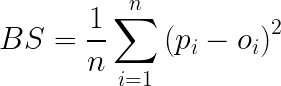

## **D. KS-Charts (Kolmogorov-Smirnov chart):**
* A non-parametric test, no assumption regarding underlying distribution.
* In KS Test, Null hypothesis states null both classes' cumulative distributions are similar. Rejecting the null hypothesis means cumulative distributions are different.
* In most binary classification problems, we use the ROC Curve and ROC AUC score as measurements of how well the model separates the predictions of the two different classes. There is another approach to asses a model based on degree of separation between predictions. 
* The KS statistic for two classes is simply the highest distance between their respective CDFs. In other words, by measuring the distance between the positive and negative class CDFs, we can have another metric to evaluate classifiers.
* There is a benefit for this approach: the ROC AUC score goes from 0.5 to 1.0, while KS statistics range from 0.0 to 1.0. So, ROC_AUC becomes confusing due to narrow range, while KS provides wider range for better understanding.

### **E. Conclusion**: 

Considering all of the above in account, i have decided to go with the following metrics in given order:
1. **Recall**
2. **Precision** and **F-1** score
3. **AUC_ROC**
4. **Brier**'s score
5. **KS-statistics**

# **G. Baseline Models without Hyper-parameter Tuning**

## **Step 1. Modular Functions for creating models without tuning and for getting evaluation metrics**

In [156]:
# Importing relevant libraries
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, roc_auc_score, roc_curve

In [157]:
!pip3 install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [158]:
# Importing relevant algorithms Classes
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [159]:
# Modular function for creating Baseline models to choose promising algorithms to work further

def promising_model(resample,X_train,y_train):
  ''' This function takes a resampler class and training data; 
    and outputs F-1, Precision & recall scores after doing cross-validation of model built using training data'''
  
  # creating pipeline for Scalinf and fitting models
  pipelines = []
  pipelines.append(('ScaledLogR', Pipeline([('Scaler', MinMaxScaler()),('LogR',LogisticRegression(random_state=12))])))
  pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsClassifier())])))
  pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeClassifier(random_state=12))])))
  pipelines.append(('ScaledGBM', Pipeline([('Scaler', MinMaxScaler()),('GBM', GradientBoostingClassifier(random_state=12))])))
  pipelines.append(('ScaledXGB', Pipeline([('Scaler', MinMaxScaler()),('XGB', XGBClassifier(random_state=12))])))
  pipelines.append(('ScaledRF', Pipeline([('Scaler', MinMaxScaler()),('RF', RandomForestClassifier(random_state=12))])))
  pipelines.append(('ScaledSVR', Pipeline([('Scaler', MinMaxScaler()),('SVC', SVC())])))
  pipelines.append(('ScaledExtraTrees', Pipeline([('Scaler', MinMaxScaler()),('ExtraTrees', ExtraTreesClassifier(random_state=12))])))

  results = []
  names = []
  X_train1, y_train1 = resample.fit_resample(X_train, y_train)
  for name, model in pipelines:
    # Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
    cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # Evaluate model based on validation scores
    scoring=['f1','precision','recall']
    scores = cross_validate(model, X_train1, y_train1, scoring=scoring, cv=cv, n_jobs=-1)
    names.append(name)
    msg = "%s validation scores: f-1: %f Precision: (%f) Recall: (%f) " % (name, np.mean(scores['test_f1']), 
                                                                          np.mean(scores['test_precision']),
                                                                          np.mean(scores['test_recall']))
    print(msg)


In [160]:
# Modular function for creating models without Hyper-parameter Tuning
# Define function
def base_model(model, X_train, y_train, X_test, y_test):
  ''' This function takes input a classifier algorithm, training and test datasets.
      It builds model using algorithm and training data,
      and further gives scores on test dataset. It also plots ROC curve.
      It also returns predicted classes and probabilities for both train and test datasets.
  '''
  # Instantiating the pipieline class
  pipe = Pipeline(steps = [('Scaler', MinMaxScaler()), ('m', model)])
  # Fit pipeline on training data
  pipe.fit(X_train, y_train)
  # Predict using above trained model in test and train data
  # It firstly call transform of each transformer in the pipeline & transform new data based on parameters learned through fit earlier. 
  # The transformed data is finally passed to the final estimator that calls predict method.
  y_test_pred = pipe.predict(X_test)
  y_train_pred = pipe.predict(X_train)
  y_test_pred_prob = pipe.predict_proba(X_test)
  y_train_pred_prob = pipe.predict_proba(X_train)
  # summarize performance of test data
  print('Test dataset Accuracy: %.4f' % accuracy_score(y_test, y_test_pred))
  print('Test dataset Precision: %.4f' % precision_score(y_test, y_test_pred))
  print('Test dataset Recall: %.4f' % recall_score(y_test, y_test_pred))
  print('Test dataset F-1 score: %.4f' % f1_score(y_test, y_test_pred))
  print('Test dataset ROC_AUC score: %.4f' % roc_auc_score(y_test, y_test_pred_prob[:,1]))
  fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob[:,1])
  roc_auc = roc_auc_score(y_test, y_test_pred_prob[:,1])
  # Plotting ROC curve
  plt.plot(fpr, tpr, 'g', label = 'Test AUC = %0.3f' % roc_auc)
  return y_train_pred, y_test_pred, y_train_pred_prob, y_test_pred_prob

In [161]:
# Modular function to get a dataframe of all Evaluation Metrics.
from sklearn.metrics import brier_score_loss

def model_metric(models, y_train, pred_train, y_train_pred_prob, y_test, pred_test, y_test_pred_prob):
  ''' This function takes model, taininng data, testing dataset and respective predicted classes and probabilities.
      It returns a dataframe consisting of scores Accuracy, F-1, Precision, Recall, ROC_AUC and Brier for both
      training and test datasets.
  '''
  
  cols = ['model_name','Train Accuracy', 'Test Accuracy', 'Train F-1 score', 'Test F-1 score',
          'Train Precision', 'Test Precision',
          'Train Recall', 'Test Recall','Train ROC_AUC', 'Test ROC_AUC', 
          'Train Brier_score', 'Test Brier_score']
  model_df = pd.DataFrame(columns=cols)
  
  i = 0
  for model in models:
    if model in [rf_clf1]:
      model_df.loc[i,'model_name'] = 'RandomForest Classifier'
    elif model in [svc_clf1]:
      model_df.loc[i,'model_name'] = 'SVClassifier'
    elif model in [xgb_clf1]:
      model_df.loc[i,'model_name'] = 'XGBoost Classifier'

    model_df.loc[i,'Train Accuracy'] = round(accuracy_score(y_train, pred_train),2)
    model_df.loc[i,'Test Accuracy'] = round(accuracy_score(y_test, pred_test),2)
    model_df.loc[i,'Train F-1 score'] = round(f1_score(y_train, pred_train),2)
    model_df.loc[i,'Test F-1 score'] = round(f1_score(y_test, pred_test),2)
    model_df.loc[i,'Train Precision'] = round(precision_score(y_train, pred_train),2)
    model_df.loc[i,'Test Precision'] = round(precision_score(y_test, pred_test),2)
    model_df.loc[i,'Train Recall'] = round(recall_score(y_train, pred_train),2)
    model_df.loc[i,'Test Recall'] = round(recall_score(y_test, pred_test),2)
    model_df.loc[i,'Train ROC_AUC'] = round(roc_auc_score(y_train, y_train_pred_prob),2)
    model_df.loc[i,'Test ROC_AUC'] = round(roc_auc_score(y_test, y_test_pred_prob),2)
    model_df.loc[i,'Train Brier_score'] = round(brier_score_loss(y_train, y_train_pred_prob, pos_label=1),2)
    model_df.loc[i,'Test Brier_score'] = round(brier_score_loss(y_test, y_test_pred_prob, pos_label=1),2)
    
    i+=1

  return model_df

## **Step 2. Selecting Promising Models**

### **A. Using Undersampled dataset by TomekLinks Method**

In [ ]:
# Using TomekLinks Undersampler method
promising_model(tomek_us, X_train, y_train)
# Average F-1, Precision, Recall scores of validation sets

ScaledLogR validation scores: f-1: 0.410105 Precision: (0.718707) Recall: (0.287244) 
ScaledKNN validation scores: f-1: 0.440724 Precision: (0.561089) Recall: (0.363405) 
ScaledCART validation scores: f-1: 0.433409 Precision: (0.420694) Recall: (0.447293) 
ScaledGBM validation scores: f-1: 0.495644 Precision: (0.694902) Recall: (0.385568) 
ScaledXGB validation scores: f-1: 0.493449 Precision: (0.699922) Recall: (0.381424) 
ScaledRF validation scores: f-1: 0.508306 Precision: (0.678718) Recall: (0.406728) 
ScaledSVR validation scores: f-1: 0.442681 Precision: (0.686535) Recall: (0.327114) 
ScaledExtraTrees validation scores: f-1: 0.499705 Precision: (0.657424) Recall: (0.403463) 


### **B. Using oversampled dataset by SMOTE Method**

In [ ]:
# Using SMOTE Oversampler method
promising_model(sm, X_train, y_train)
# Average F-1, Precision, Recall scores of validation sets

ScaledLogR validation scores: f-1: 0.738132 Precision: (0.746227) Recall: (0.730262) 
ScaledKNN validation scores: f-1: 0.764702 Precision: (0.758605) Recall: (0.770994) 
ScaledCART validation scores: f-1: 0.764695 Precision: (0.751901) Recall: (0.778039) 
ScaledGBM validation scores: f-1: 0.786133 Precision: (0.806656) Recall: (0.766697) 
ScaledXGB validation scores: f-1: 0.786223 Precision: (0.806729) Recall: (0.766804) 
ScaledRF validation scores: f-1: 0.854408 Precision: (0.867931) Recall: (0.841349) 
ScaledSVR validation scores: f-1: 0.740060 Precision: (0.766450) Recall: (0.715496) 
ScaledExtraTrees validation scores: f-1: 0.850249 Precision: (0.858388) Recall: (0.842330) 


* I have decided to build models using Logistic Regression, RandomForest, XGBoost and SVM classifiers on all datasets (i.e., Imbalanced, Undersampled and Oversampled)
* Basis above models,  i will learn about the best performing model and respective best performing Re-sampling method for this problem statement.

## **A) LogisticRegression Classifier Model without Hyper-parameter Tuning**

* Here, I am using LogisticRegression with class_weight as "balanced" to deal with any remaining imbalances in dataset.



### **1. Using Original Imbalanced Dataset**

In [ ]:
# Importing algorithm class
from sklearn.linear_model import LogisticRegression
# Instantiating Classifier class
log_r1 = LogisticRegression(random_state=12, class_weight = "balanced")

In [ ]:
pipe=Pipeline(steps=[('Scaler', MinMaxScaler()), ('m', log_r1)])
# Fit model on training data
pipe.fit(X_train, y_train)
# predicting classes on test and train data
y_test_pred_logr1 = pipe.predict(X_test)
y_train_pred_logr1 = pipe.predict(X_train)
# predicting probabilities on test and train data
y_tn_pred_prob_logr1 = pipe.predict_proba(X_train)
y_ts_pred_prob_logr1 = pipe.predict_proba(X_test)

In [ ]:
# Ealuation metrics for RandomForest Classifier on original dataset
models =[log_r1]
model_logr1 = model_metric(models, y_train, y_train_pred_logr1, y_tn_pred_prob_logr1[:,1], 
                           y_test, y_test_pred_logr1, y_ts_pred_prob_logr1[:,1])
model_logr1['model_name']='LogR_Imbalanced'
model_logr1

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,LogR_Imbalanced,0.71,0.69,0.49,0.46,0.4,0.38,0.63,0.61,0.73,0.71,0.2,0.21


### **2. Undersampled Dataset Using TomekLinks Method**

In [ ]:
from sklearn.linear_model import LogisticRegression
# Instantiating Classifier class
log_r2 = LogisticRegression(random_state=12, class_weight = "balanced")

Test dataset Accuracy: 0.6792
Test dataset Precision: 0.3668
Test dataset Recall: 0.6202
Test dataset F-1 score: 0.4609
Test dataset ROC_AUC score: 0.7092


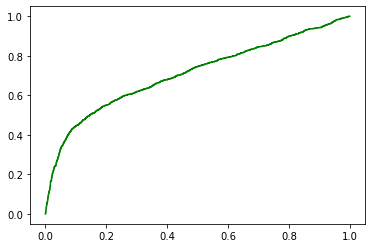

In [ ]:
# Training model on TomekLinks under-sampled dataset and returning predictions on train and test datasets
y_train_pred_logr2, y_test_pred_logr2, y_tn_prob_logr2, y_ts_prob_logr2 =base_model(log_r2, X_tomek, y_tomek, X_test, y_test)

In [ ]:
# Ealuation metrics for LogisticRegression Classifier
models =[log_r2]
model_logr2 = model_metric(models, y_tomek, y_train_pred_logr2, y_tn_prob_logr2[:,1], 
                           y_test, y_test_pred_logr2, y_ts_prob_logr2[:,1])
model_logr2['model_name']='LogR_Tomek'
model_logr2

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,LogR_Tomek,0.71,0.68,0.51,0.46,0.42,0.37,0.64,0.62,0.73,0.71,0.2,0.21


### **3. Undersampled dataset using ClusterCentroids**

In [ ]:
from sklearn.linear_model import LogisticRegression
# Instantiating Classifier class
log_r3 = LogisticRegression(random_state=12, class_weight = "balanced")

Test dataset Accuracy: 0.4798
Test dataset Precision: 0.2702
Test dataset Recall: 0.7950
Test dataset F-1 score: 0.4034
Test dataset ROC_AUC score: 0.6710


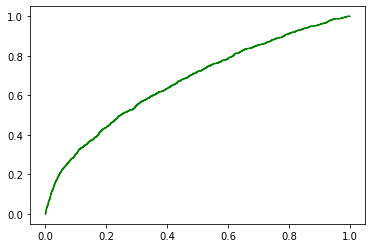

In [ ]:
# Training model on ClusterCentroids under-sampled dataset and returning predictions on train and test datasets
y_train_pred_logr3, y_test_pred_logr3, y_tn_prob_logr3, y_ts_prob_logr3 = base_model(log_r3, X_cen, y_cen, X_test, y_test)

In [ ]:
# Ealuation metrics for LogisticRegression Classifier
models =[log_r3]
model_logr3 = model_metric(models, y_cen, y_train_pred_logr3, y_tn_prob_logr3[:,1], 
                           y_test, y_test_pred_logr3, y_ts_prob_logr3[:,1])
model_logr3['model_name']='LogR_CentClusters'
model_logr3

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,LogR_CentClusters,0.83,0.48,0.83,0.4,0.85,0.27,0.81,0.8,0.9,0.67,0.13,0.34


### **4. Oversampled dataset using SMOTE**

In [ ]:
from sklearn.linear_model import LogisticRegression
# Instantiating Classifier class
log_r4 = LogisticRegression(random_state=12, class_weight = "balanced")

Test dataset Accuracy: 0.7010
Test dataset Precision: 0.3734
Test dataset Recall: 0.5192
Test dataset F-1 score: 0.4344
Test dataset ROC_AUC score: 0.6741


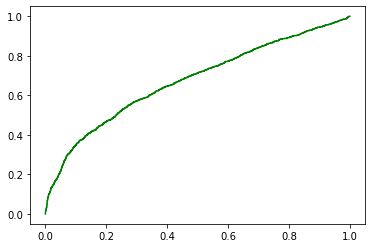

In [ ]:
# Training model on SMOTE Over-sampled dataset and returning predictions on train and test datasets
y_train_pred_logr4, y_test_pred_logr4, y_tn_prob_logr4, y_ts_prob_logr4 = base_model(log_r4, X_smote, y_smote, X_test, y_test)

In [ ]:
# Ealuation metrics for LogisticRegression Classifier
models =[log_r4]
model_logr4 = model_metric(models, y_smote, y_train_pred_logr4, y_tn_prob_logr4[:,1], 
                           y_test, y_test_pred_logr4, y_ts_prob_logr4[:,1])
model_logr4['model_name']='LogR_SMOTE'
model_logr4

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,LogR_SMOTE,0.74,0.7,0.74,0.43,0.75,0.37,0.73,0.52,0.81,0.67,0.18,0.2


### **5. Dataset resampled using SMOTE-TomekLinks**

In [ ]:
from sklearn.linear_model import LogisticRegression
# Instantiating Classifier class
log_r5 = LogisticRegression(random_state=12, class_weight = "balanced")

Test dataset Accuracy: 0.7022
Test dataset Precision: 0.3759
Test dataset Recall: 0.5252
Test dataset F-1 score: 0.4382
Test dataset ROC_AUC score: 0.6749


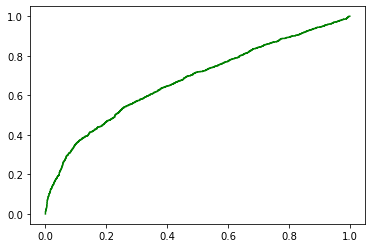

In [ ]:
# Training model on SMOTE-TomekLinks re-sampled dataset and returning predictions on train and test datasets
y_train_pred_logr5, y_test_pred_logr5, y_tn_prob_logr5, y_ts_prob_logr5 = base_model(log_r5, X_smtk, y_smtk, X_test, y_test)

In [ ]:
# Ealuation metrics for LogisticRegression Classifier
models =[log_r5]
model_logr5 = model_metric(models, y_smtk, y_train_pred_logr5, y_tn_prob_logr5[:,1], 
                           y_test, y_test_pred_logr5, y_ts_prob_logr5[:,1])
model_logr5['model_name']='LogR_SMOTE_Tomek'
model_logr5

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,LogR_SMOTE_Tomek,0.74,0.7,0.74,0.44,0.75,0.38,0.73,0.53,0.81,0.67,0.18,0.2


### **Summary: LogisticRegression Performances on different datasets**

In [ ]:
# Overall Metrics for LogisticRegression Classifier
logR_metrics = model_logr1.append([model_logr2, model_logr3, model_logr4, model_logr5], ignore_index=True)
logR_metrics

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,LogR_Imbalanced,0.71,0.69,0.49,0.46,0.4,0.38,0.63,0.61,0.73,0.71,0.2,0.21
1,LogR_Tomek,0.71,0.68,0.51,0.46,0.42,0.37,0.64,0.62,0.73,0.71,0.2,0.21
2,LogR_CentClusters,0.83,0.48,0.83,0.4,0.85,0.27,0.81,0.8,0.9,0.67,0.13,0.34
3,LogR_SMOTE,0.74,0.7,0.74,0.43,0.75,0.37,0.73,0.52,0.81,0.67,0.18,0.2
4,LogR_SMOTE_Tomek,0.74,0.7,0.74,0.44,0.75,0.38,0.73,0.53,0.81,0.67,0.18,0.2


In [ ]:
# Comparing all above 5 Logistic Regression Models using results on Test dataset only
logR_metrics[['model_name','Test Accuracy',	'Test F-1 score',	'Test Precision',	'Test Recall',	'Test ROC_AUC', 'Test Brier_score']]

,model_name,Test Accuracy,Test F-1 score,Test Precision,Test Recall,Test ROC_AUC,Test Brier_score
0,LogR_Imbalanced,0.69,0.46,0.38,0.61,0.71,0.21
1,LogR_Tomek,0.68,0.46,0.37,0.62,0.71,0.21
2,LogR_CentClusters,0.48,0.4,0.27,0.8,0.67,0.34
3,LogR_SMOTE,0.7,0.43,0.37,0.52,0.67,0.2
4,LogR_SMOTE_Tomek,0.7,0.44,0.38,0.53,0.67,0.2


**Observations**:

**LogisticRegression with class_weight as "balanced"**
1. For LogisticRegression classifiers, Accuracy, F-1, Recall, precision and ROC-AUC scores is best for Imbalanced dataset. It means that the inbuilt method for dealiing with class imbalance in Logistic Regression is working great.
2. LogisticRegression baseline model with **CentroidCluster** dataset has the least accuracy, F-1 and Precision, but has the highest recall and acceptable ROC-AUC. The reason could be due to loss of important information during undersampling done using this CentroidClusters, that reduced the **train data size to 10,618** observations only. (**High bias**)
3. Considering Recall as metric of utmost importance, LogisticRegression model using **TomekLinks Undersampled dataset(0.62)** is the best performing model, as it has acceptable F-1 score (0.46), AUC-ROC score (0.71) and acceptable Brier's score (0.21). Second Best performing model is using **Imbalanced dataset**.
4. In the coming section, i will do hyper-parameter tuning of both models and will try to further improve the results.

## **B) RandomForest Classifier Model without Hyper-parameter Tuning**

* Here, I am using RandomForest Classifier with class_weight as "balanced" to deal with any remaining imbalances in dataset.

### **1. Using Original Imbalanced Dataset**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Instantiating classifier class
rf_clf1 = RandomForestClassifier(random_state=12, class_weight = "balanced")

In [ ]:
pipe=Pipeline(steps=[('Scaler', MinMaxScaler()), ('m', rf_clf1)])
# Fit model on training data
pipe.fit(X_train, y_train)
# Predicting classes on train and test datasets
y_test_pred_logr1 = pipe.predict(X_test)
y_train_pred_logr1 = pipe.predict(X_train)
# Predicting probabilities on train and test datasets
y_tn_pred_prob_rf1 = pipe.predict_proba(X_train)
y_ts_pred_prob_rf1 = pipe.predict_proba(X_test)

In [ ]:
# Ealuation metrics for RandomForest Classifier on original dataset
models =[rf_clf1]
model_rf1 = model_metric(models, y_train, y_train_pred_logr1, y_tn_pred_prob_rf1[:,1], 
                           y_test, y_test_pred_logr1, y_ts_pred_prob_rf1[:,1])
model_rf1['model_name']='RF_Imbalanced'
model_rf1

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,RF_Imbalanced,1.0,0.81,1.0,0.43,1.0,0.65,1.0,0.32,1.0,0.76,0.02,0.14


### **2. Undersampled Dataset Using TomekLinks Method**

In [ ]:
# Importing RF classifier class
from sklearn.ensemble import RandomForestClassifier
# Intialising with class_weight balanced to deal with any imbalance in data
rf_clf2 = RandomForestClassifier(random_state=12, class_weight = "balanced")

Test dataset Accuracy: 0.8117
Test dataset Precision: 0.6268
Test dataset Recall: 0.3670
Test dataset F-1 score: 0.4629
Test dataset ROC_AUC score: 0.7621


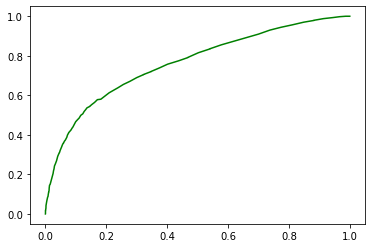

In [ ]:
# Training model on TomekLinks undersampled dataset and returning predictions on train and test datasets
y_train_pred_rf2, y_test_pred_rf2, y_tn_prob_rf2, y_ts_prob_rf2 = base_model(rf_clf2, X_tomek, y_tomek, X_test, y_test)
# Plotting ROC curve

In [ ]:
# Ealuation metrics for RandomForest Classifier
models =[rf_clf2]
model_rf2 = model_metric(models, y_tomek, y_train_pred_rf2, y_tn_prob_rf2[:,1], 
                           y_test, y_test_pred_rf2, y_ts_prob_rf2[:,1])
model_rf2['model_name']='RF_Tomek'
model_rf2

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,RF_Tomek,1.0,0.81,1.0,0.46,1.0,0.63,1.0,0.37,1.0,0.76,0.02,0.14


### **3. Undersampled dataset using ClusterCentroids**

In [ ]:
# Importing RF classifier class
from sklearn.ensemble import RandomForestClassifier
# Instantiating RF classifier class
rf_clf3 = RandomForestClassifier(random_state=12,class_weight = "balanced")

Test dataset Accuracy: 0.5048
Test dataset Precision: 0.2916
Test dataset Recall: 0.8666
Test dataset F-1 score: 0.4363
Test dataset ROC_AUC score: 0.7284


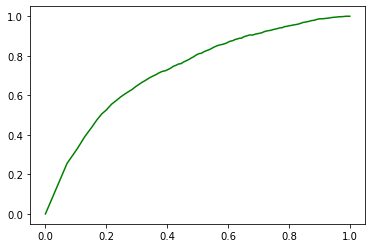

In [ ]:
# Training model on ClusterCentroids undersampled dataset and returning predictions on train and test datasets
y_train_pred_rf3, y_test_pred_rf3, y_tn_prob_rf3, y_ts_prob_rf3 = base_model(rf_clf3, X_cen, y_cen, X_test, y_test)
# Plotting ROC Curve

In [ ]:
# Ealuation metrics for RandomForest Classifier
models =[rf_clf3]
model_rf3 = model_metric(models, y_cen, y_train_pred_rf3, y_tn_prob_rf3[:,1], 
                           y_test, y_test_pred_rf3, y_ts_prob_rf3[:,1])
model_rf3['model_name']='RF_CentClusters'
model_rf3

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,RF_CentClusters,1.0,0.5,1.0,0.44,1.0,0.29,1.0,0.87,1.0,0.73,0.01,0.37


### **4. Oversampled dataset using SMOTE**

In [ ]:
# Importing RF classifier class
from sklearn.ensemble import RandomForestClassifier
# Instantiating RF classifier class
rf_clf4 = RandomForestClassifier(random_state=12, class_weight = "balanced")

Test dataset Accuracy: 0.7860
Test dataset Precision: 0.5171
Test dataset Recall: 0.4898
Test dataset F-1 score: 0.5031
Test dataset ROC_AUC score: 0.7488


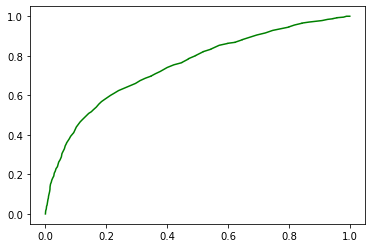

In [ ]:
# Training model on SMOTE Oversampled dataset and returning predictions on train and test datasets
y_train_pred_rf4, y_test_pred_rf4, y_tn_prob_rf4, y_ts_prob_rf4 = base_model(rf_clf4, X_smote, y_smote, X_test, y_test)
# Plotting ROC also

In [ ]:
# Ealuation metrics for RandomForest Classifier
models =[rf_clf4]
model_rf4 = model_metric(models, y_smote, y_train_pred_rf4, y_tn_prob_rf4[:,1], 
                           y_test, y_test_pred_rf4, y_ts_prob_rf4[:,1])
model_rf4['model_name']='RF_SMOTE'
model_rf4

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,RF_SMOTE,1.0,0.79,1.0,0.5,1.0,0.52,1.0,0.49,1.0,0.75,0.02,0.16


### **5. Dataset resampled using Combined SMOTE-TomekLinks**

In [ ]:
# Importing RF classifier class
from sklearn.ensemble import RandomForestClassifier
# Instantiating RF classifier class
rf_clf5 = RandomForestClassifier(random_state=12,class_weight = "balanced")

Test dataset Accuracy: 0.7877
Test dataset Precision: 0.5204
Test dataset Recall: 0.5094
Test dataset F-1 score: 0.5149
Test dataset ROC_AUC score: 0.7512


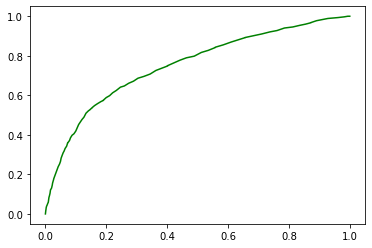

In [ ]:
# Training model on SMOTE-TomekLinks re-sampled dataset and returning predictions on train and test datasets
y_train_pred_rf5, y_test_pred_rf5, y_tn_prob_rf5, y_ts_prob_rf5 = base_model(rf_clf5, X_smtk, y_smtk, X_test, y_test)
# Plotting ROC

In [ ]:
# Ealuation metrics for RandomForest Classifier
models =[rf_clf5]
model_rf5 = model_metric(models, y_smtk, y_train_pred_rf5, y_tn_prob_rf5[:,1], 
                           y_test, y_test_pred_rf5, y_ts_prob_rf5[:,1])
model_rf5['model_name']='RF_SMOTE_Tomek'
model_rf5

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,RF_SMOTE_Tomek,1.0,0.79,1.0,0.51,1.0,0.52,1.0,0.51,1.0,0.75,0.02,0.16


### **Summary: RandomForest Performance on different datasets**

In [ ]:
# Overall Metrics for RandomForest Classifier
rf_metrics = model_rf1.append([model_rf2, model_rf3, model_rf4, model_rf5], ignore_index=True)
rf_metrics

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,RF_Imbalanced,1.0,0.81,1.0,0.43,1.0,0.65,1.0,0.32,1.0,0.76,0.02,0.14
1,RF_Tomek,1.0,0.81,1.0,0.46,1.0,0.63,1.0,0.37,1.0,0.76,0.02,0.14
2,RF_CentClusters,1.0,0.5,1.0,0.44,1.0,0.29,1.0,0.87,1.0,0.73,0.01,0.37
3,RF_SMOTE,1.0,0.79,1.0,0.5,1.0,0.52,1.0,0.49,1.0,0.75,0.02,0.16
4,RF_SMOTE_Tomek,1.0,0.79,1.0,0.51,1.0,0.52,1.0,0.51,1.0,0.75,0.02,0.16


In [ ]:
# Comparing all above 5 RF Classifier models results on Test dataset only
rf_metrics[['model_name','Test Accuracy',	'Test F-1 score',	'Test Precision',	'Test Recall',	'Test ROC_AUC', 'Test Brier_score']]

,model_name,Test Accuracy,Test F-1 score,Test Precision,Test Recall,Test ROC_AUC,Test Brier_score
0,RF_Imbalanced,0.81,0.43,0.65,0.32,0.76,0.14
1,RF_Tomek,0.81,0.46,0.63,0.37,0.76,0.14
2,RF_CentClusters,0.5,0.44,0.29,0.87,0.73,0.37
3,RF_SMOTE,0.79,0.5,0.52,0.49,0.75,0.16
4,RF_SMOTE_Tomek,0.79,0.51,0.52,0.51,0.75,0.16


**Observations**:

**RandomForestClassifier with class_weight as "balanced"**
1. For RandomForest Classifier, F-1 and Recall scores have improved considerably on re-sampled datasets (except CentroidClusters), compared to original imbalanced dataset. However, Precision is higher for imbalanced dataset.
2. RandomForestClassifier baseline model with **CentroidCluster** dataset has the least accuracy, F-1 and Precision, but has the highest recall and acceptable ROC-AUC. The reason could be loss of important information during undersampling done using this CentroidClusters, that reduced the **train data size to 10,618** observations only. (**High bias**)
2. Basis Recall, RandomForestClassifier model using **SMOTE-TomekLinks re-sampled dataset(0.51)** is the best performing model, and also has the highest F-1 score (0.51), acceptable Precision (0.52), AUC-ROC score (0.75) and Brier's scores (0.16). 
3. Second best performing model with second highest recall (0.49) is with SMOTE over-sampled dataset.
4. In the coming sections, i will do hyper-parameter tuning of RandomForestClassifier models with SMOTE and SMOTE-TomekLinks dataset and will try to further improve the results.

## **C. XGBoost Classifier Model**

### **1. Using Original Imbalanced Dataset**

In [ ]:
# Importing XGBClassifier class
from xgboost import XGBClassifier
# Instatntiating XGBClassifierr class
xgb_clf1 = XGBClassifier(random_state=12)

In [ ]:
pipe=Pipeline(steps=[('Scaler', MinMaxScaler()), ('m', xgb_clf1)])
# Fit model on training data
pipe.fit(X_train, y_train)
# Predicting classes on train and test datasets
y_test_pred_logr1 = pipe.predict(X_test)
y_train_pred_logr1 = pipe.predict(X_train)
# Predicting probabilities on train and test datasets
y_tn_pred_prob_xgb1 = pipe.predict_proba(X_train)
y_ts_pred_prob_xgb1 = pipe.predict_proba(X_test)

In [ ]:
# Ealuation metrics for XGB Classifier on original dataset
models =[xgb_clf1]
model_xgb1 = model_metric(models, y_train, y_train_pred_logr1, y_tn_pred_prob_xgb1[:,1], 
                           y_test, y_test_pred_logr1, y_ts_pred_prob_xgb1[:,1])
model_xgb1['model_name']='XGBoost_Imbalanced'
model_xgb1

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,XGBoost_Imbalanced,0.89,0.81,0.71,0.44,0.88,0.62,0.59,0.35,0.95,0.76,0.08,0.14


### **2. Undersampled Dataset Using TomekLinks Method**

In [ ]:
# Importing XGBClassifier class
from xgboost import XGBClassifier
# Instatntiating XGBClassifierr class
xgb_clf2 = XGBClassifier(random_state=12)

Test dataset Accuracy: 0.8057
Test dataset Precision: 0.5937
Test dataset Recall: 0.3843
Test dataset F-1 score: 0.4666
Test dataset ROC_AUC score: 0.7591


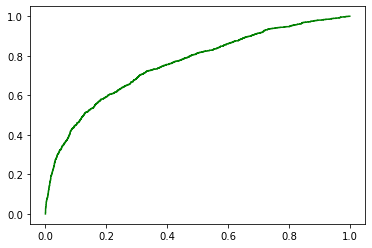

In [ ]:
# Training model on TomekLinks under-sampled dataset and returning predictions on train and test datasets
y_train_pred_xgb2, y_test_pred_xgb2, y_tn_prob_xgb2, y_ts_prob_xgb2 = base_model(xgb_clf2, X_tomek, y_tomek, X_test, y_test)
# Plotting ROC as well

In [ ]:
# Ealuation metrics for XGBClassifier
models =[xgb_clf2]
model_xgb2 = model_metric(models, y_tomek, y_train_pred_xgb2, y_tn_prob_xgb2[:,1], 
                           y_test, y_test_pred_xgb2, y_ts_prob_xgb2[:,1])
model_xgb2['model_name']='XGBoost_TomekLinks'
model_xgb2

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,XGBoost_TomekLinks,0.9,0.81,0.75,0.47,0.92,0.59,0.63,0.38,0.96,0.76,0.07,0.14


### **3. Undersampled dataset using ClusterCentroids**

In [ ]:
# Importing XGBClassifier
from xgboost import XGBClassifier
# Instatntiating XGBClassifier class
xgb_clf3 = XGBClassifier(random_state=12)

Test dataset Accuracy: 0.4537
Test dataset Precision: 0.2745
Test dataset Recall: 0.8945
Test dataset F-1 score: 0.4200
Test dataset ROC_AUC score: 0.7286


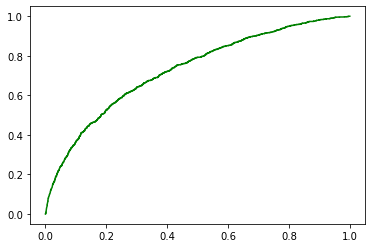

In [ ]:
# Training model on ClusterCentroids under-sampled dataset and returning predictions on train and test datasets
y_train_pred_xgb3, y_test_pred_xgb3, y_tn_prob_xgb3, y_ts_prob_xgb3 = base_model(xgb_clf3, X_cen, y_cen, X_test, y_test)
# Plotting ROC also

In [ ]:
# Ealuation metrics for XGB Classifier
models =[xgb_clf3]
model_xgb3 = model_metric(models, y_cen, y_train_pred_xgb3, y_tn_prob_xgb3[:,1], 
                           y_test, y_test_pred_xgb3, y_ts_prob_xgb3[:,1])
model_xgb3['model_name']='XGBoost_CentClusters'
model_xgb3

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,XGBoost_CentClusters,0.99,0.45,0.99,0.42,1.0,0.27,0.99,0.89,1.0,0.73,0.01,0.48


### **4. Oversampled dataset using SMOTE**

In [ ]:
# Importing XGBClassifier
from xgboost import XGBClassifier
# Instatntiating XGBClassifier class
xgb_clf4 = XGBClassifier(random_state=12)

Test dataset Accuracy: 0.7652
Test dataset Precision: 0.4694
Test dataset Recall: 0.4732
Test dataset F-1 score: 0.4713
Test dataset ROC_AUC score: 0.7327


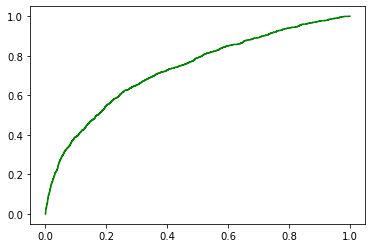

In [ ]:
# Training model on SMOTE over-sampled dataset and returning predictions on train and test datasets
y_train_pred_xgb4, y_test_pred_xgb4, y_tn_prob_xgb4, y_ts_prob_xgb4 = base_model(xgb_clf4, X_smote, y_smote, X_test, y_test)
# Plotting ROC as well

In [ ]:
# Ealuation metrics for XGB Classifier
models =[xgb_clf4]
model_xgb4 = model_metric(models, y_smote, y_train_pred_xgb4, y_tn_prob_xgb4[:,1], 
                           y_test, y_test_pred_xgb4, y_ts_prob_xgb4[:,1])
model_xgb4['model_name']='XGBoost_SMOTE'
model_xgb4

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,XGBoost_SMOTE,0.91,0.77,0.91,0.47,0.93,0.47,0.9,0.47,0.98,0.73,0.07,0.16


### **5. Dataset resampled using SMOTE-TomekLinks**

In [ ]:
# Importing XGBClassifier class
from xgboost import XGBClassifier
# Instatntiating XGBClassifierr class
xgb_clf5 = XGBClassifier(random_state=12)

Test dataset Accuracy: 0.7615
Test dataset Precision: 0.4624
Test dataset Recall: 0.4815
Test dataset F-1 score: 0.4718
Test dataset ROC_AUC score: 0.7282


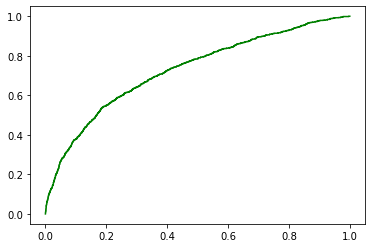

In [ ]:
# Training model on SMOTE-TomekLinks re-sampled dataset and returning predictions on train and test datasets
y_train_pred_xgb5, y_test_pred_xgb5, y_tn_prob_xgb5, y_ts_prob_xgb5 = base_model(xgb_clf5, X_smtk, y_smtk, X_test, y_test)
# Plotting ROC as well

In [ ]:
# Ealuation metrics for XGBClassifier Classifier
models =[xgb_clf5]
model_xgb5 = model_metric(models, y_smtk, y_train_pred_xgb5, y_tn_prob_xgb5[:,1], 
                           y_test, y_test_pred_xgb5, y_ts_prob_xgb5[:,1])
model_xgb5['model_name']='XGBoost_SMOTE_Tomek'
model_xgb5

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,XGBoost_SMOTE_Tomek,0.91,0.76,0.91,0.47,0.93,0.46,0.9,0.48,0.97,0.73,0.07,0.17


### **Summary: XGBoost Performance on different Datasets**

In [ ]:
# Overall Metrics for SVM Classifier
xgb_metrics = model_xgb1.append([model_xgb2, model_xgb3, model_xgb4, model_xgb5], ignore_index=True)
xgb_metrics

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,XGBoost_Imbalanced,0.89,0.81,0.71,0.44,0.88,0.62,0.59,0.35,0.95,0.76,0.08,0.14
1,XGBoost_TomekLinks,0.9,0.81,0.75,0.47,0.92,0.59,0.63,0.38,0.96,0.76,0.07,0.14
2,XGBoost_CentClusters,0.99,0.45,0.99,0.42,1.0,0.27,0.99,0.89,1.0,0.73,0.01,0.48
3,XGBoost_SMOTE,0.91,0.77,0.91,0.47,0.93,0.47,0.9,0.47,0.98,0.73,0.07,0.16
4,XGBoost_SMOTE_Tomek,0.91,0.76,0.91,0.47,0.93,0.46,0.9,0.48,0.97,0.73,0.07,0.17


In [ ]:
# Comparing above 5 XGBClassifier models using metric results on test dataset
xgb_metrics[['model_name','Test Accuracy',	'Test F-1 score',	'Test Precision',	'Test Recall',	'Test ROC_AUC', 'Test Brier_score']]

,model_name,Test Accuracy,Test F-1 score,Test Precision,Test Recall,Test ROC_AUC,Test Brier_score
0,XGBoost_Imbalanced,0.81,0.44,0.62,0.35,0.76,0.14
1,XGBoost_TomekLinks,0.81,0.47,0.59,0.38,0.76,0.14
2,XGBoost_CentClusters,0.45,0.42,0.27,0.89,0.73,0.48
3,XGBoost_SMOTE,0.77,0.47,0.47,0.47,0.73,0.16
4,XGBoost_SMOTE_Tomek,0.76,0.47,0.46,0.48,0.73,0.17


**Observations**:
1. For XGBoost classifiers, F-1 and Recall scores have improved considerably on re-sampled datasets (except CentroidClusters), compared to original imbalanced dataset. However, Precision is higher for imbalanced dataset.
2. XGBoost baseline model with **CentroidCluster** dataset has the least accuracy, F-1 and Precision, but highest recall and decent ROC-AUC. The reason could be loss of important information during undersampling done using this CentroidClusters, that reduced the train data size to 10,618 observations only. (**High bias**)
3. If **Recall** is our metric of concern, then XGBoost model using **SMOTE-TomekLinks (0.48)** combined re-sampling method is the best performing model, shortly followed by **SMOTE (0.47)** dataset. These models have good F-1 score, AUC-ROC, Precision and Brier scores as well.

## **D. SVM Classifier Model**

* Here, I am using SVM Classifier with class_weight as "balanced" to deal with any remaining imbalances in dataset. 
* Further, i have set Probability as True in order to get predicted probabilities scores.

### **1. Using Original Imbalanced Dataset**

In [ ]:
# Importing SVM Classifier
from sklearn.svm import SVC
# Instantiating SVM Classifier class
svc_clf1 = SVC(random_state=12, class_weight='balanced', probability=True)

In [ ]:
pipe=Pipeline(steps=[('Scaler', MinMaxScaler()), ('m', svc_clf1)])
# Fit model on training data
pipe.fit(X_train, y_train)
# Predicting classes on train and test datasets
y_test_pred_svc1 = pipe.predict(X_test)
y_train_pred_svc1 = pipe.predict(X_train)
# Predicting probabilities on train and test datasets
y_tn_pred_prob_svc1 = pipe.predict_proba(X_train)
y_ts_pred_prob_svc1 = pipe.predict_proba(X_test)

In [ ]:
# Ealuation metrics for SVM Classifier on original dataset
models =[svc_clf1]
model_svc1 = model_metric(models, y_train, y_train_pred_svc1, y_tn_pred_prob_svc1[:,1], 
                           y_test, y_test_pred_svc1, y_ts_pred_prob_svc1[:,1])
model_svc1['model_name']='SVM_Imbalanced'
model_svc1

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,SVM_Imbalanced,0.78,0.77,0.53,0.51,0.5,0.49,0.56,0.54,0.76,0.74,0.14,0.14


### **2. Undersampled Dataset Using TomekLinks undersampler**

In [ ]:
# Importing SVM Classifier
from sklearn.svm import SVC
# Instantiating SVM Classifier class
svc_clf2 = SVC(random_state=12, class_weight='balanced', probability=True)

Test dataset Accuracy: 0.7717
Test dataset Precision: 0.4854
Test dataset Recall: 0.5388
Test dataset F-1 score: 0.5107
Test dataset ROC_AUC score: 0.7383


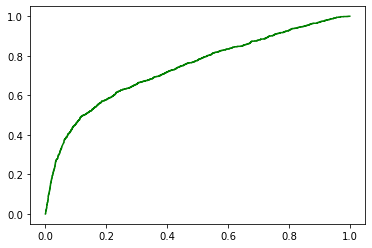

In [ ]:
# Training model on TomekLinks under-sampled dataset and returning predictions on train and test datasets
y_train_pred_svc2, y_test_pred_svc2, y_tn_prob_svc2, y_ts_prob_svc2 = base_model(svc_clf2, X_tomek, y_tomek, X_test, y_test)
# Plotting ROC as well

In [ ]:
# Ealuation metrics for SVM Classifier
models =[svc_clf2]
model_svc2 = model_metric(models, y_tomek, y_train_pred_svc2, y_tn_prob_svc2[:,1], 
                          y_test, y_test_pred_svc2, y_ts_prob_svc2[:,1])
model_svc2['model_name']='SVM_TomekLinks'
model_svc2

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,SVM_TomekLinks,0.78,0.77,0.55,0.51,0.53,0.49,0.57,0.54,0.77,0.74,0.14,0.14


### **3. Undersampled dataset using ClusterCentroids**

In [ ]:
# Importing SVM Classifier
from sklearn.svm import SVC
# Instantiating SVM Classifier class
svc_clf3 = SVC(random_state=12, class_weight='balanced', probability=True)

Test dataset Accuracy: 0.4838
Test dataset Precision: 0.2792
Test dataset Recall: 0.8433
Test dataset F-1 score: 0.4195
Test dataset ROC_AUC score: 0.7139


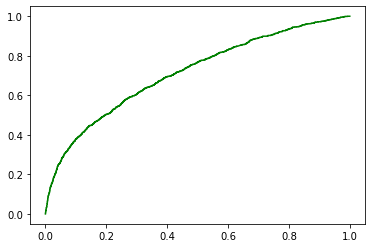

In [ ]:
# Training model on ClusterCentroids under-sampled dataset and returning predictions on train and test datasets
y_train_pred_svc3, y_test_pred_svc3, y_tn_prob_svc3, y_ts_prob_svc3 = base_model(svc_clf3, X_cen, y_cen, X_test, y_test)
# Plotting ROC as well

In [ ]:
# Ealuation metrics for SVM Classifier
models =[svc_clf3]
model_svc3 = model_metric(models, y_cen, y_train_pred_svc3, y_tn_prob_svc3[:,1], 
                          y_test, y_test_pred_svc3, y_ts_prob_svc3[:,1])
model_svc3['model_name']='SVM_CentClusters'
model_svc3

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,SVM_CentClusters,0.88,0.48,0.88,0.42,0.9,0.28,0.85,0.84,0.94,0.71,0.09,0.39


### **4. Oversampled dataset using SMOTE**

In [ ]:
# Importing SVM Classifier
from sklearn.svm import SVC
# Instantiating SVM Classifier class
svc_clf4 = SVC(random_state=12, class_weight='balanced', probability=True)

Test dataset Accuracy: 0.7220
Test dataset Precision: 0.4026
Test dataset Recall: 0.5313
Test dataset F-1 score: 0.4581
Test dataset ROC_AUC score: 0.6985


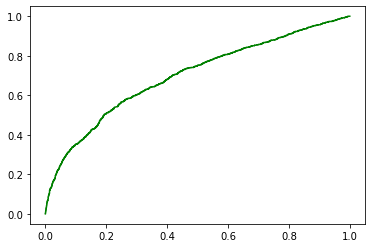

In [ ]:
# Training model on SMOTE over-sampled dataset and returning predictions on train and test datasets
y_train_pred_svc4, y_test_pred_svc4, y_tn_prob_svc4, y_ts_prob_svc4 = base_model(svc_clf4, X_smote, y_smote, X_test, y_test)
# Plotting ROC as well

In [ ]:
# Ealuation metrics for SVM Classifier
models = [svc_clf4]
model_svc4 = model_metric(models, y_smote, y_train_pred_svc4, y_tn_prob_svc4[:,1], 
                          y_test, y_test_pred_svc4, y_ts_prob_svc4[:,1])
model_svc4['model_name']='SVM_SMOTE'
model_svc4

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,SVM_SMOTE,0.75,0.72,0.74,0.46,0.77,0.4,0.72,0.53,0.83,0.7,0.17,0.19


### **5. Dataset resampled using SMOTE-TomikLinks**

In [ ]:
# Iporting SVM Classifier class
from sklearn.svm import SVC
# Instantiating SVM Classifier class
svc_clf5 = SVC(random_state=12, class_weight='balanced', probability=True)

Test dataset Accuracy: 0.7245
Test dataset Precision: 0.4072
Test dataset Recall: 0.5388
Test dataset F-1 score: 0.4638
Test dataset ROC_AUC score: 0.7007


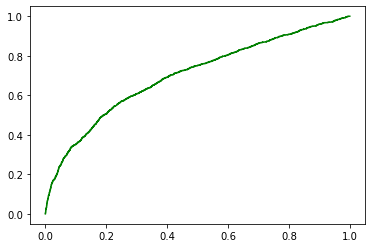

In [ ]:
# Training model on SMOTE-TomekLinks re-sampled dataset and returning predictions on train and test datasets
y_train_pred_svc5, y_test_pred_svc5, y_tn_prob_svc5, y_ts_prob_svc5 = base_model(svc_clf5, X_smtk, y_smtk, X_test, y_test)
# Plotting ROC as well

In [ ]:
# Ealuation metrics for SVM Classifier
models =[svc_clf5]
model_svc5 = model_metric(models, y_smtk, y_train_pred_svc5, y_tn_prob_svc5[:,1], 
                          y_test, y_test_pred_svc5, y_ts_prob_svc5[:,1])
model_svc5['model_name']='SVM_SMOTE_Tomek'
model_svc5

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,SVM_SMOTE_Tomek,0.75,0.72,0.75,0.46,0.78,0.41,0.72,0.54,0.83,0.7,0.17,0.19


### **Summary: SVM Performance on different Datasets**

In [ ]:
# Overall Metrics for SVM Classifier
svc_metrics = model_svc1.append([model_svc2, model_svc3, model_svc4, model_svc5], ignore_index=True)
svc_metrics

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,SVM_Imbalanced,0.78,0.77,0.53,0.51,0.5,0.49,0.56,0.54,0.76,0.74,0.14,0.14
1,SVM_TomekLinks,0.78,0.77,0.55,0.51,0.53,0.49,0.57,0.54,0.77,0.74,0.14,0.14
2,SVM_CentClusters,0.88,0.48,0.88,0.42,0.9,0.28,0.85,0.84,0.94,0.71,0.09,0.39
3,SVM_SMOTE,0.75,0.72,0.74,0.46,0.77,0.4,0.72,0.53,0.83,0.7,0.17,0.19
4,SVM_SMOTE_Tomek,0.75,0.72,0.75,0.46,0.78,0.41,0.72,0.54,0.83,0.7,0.17,0.19


In [ ]:
# Comparing all above 5 SVM models using scores on test datasets for all svm models.
svc_metrics[['model_name','Test Accuracy',	'Test F-1 score',	'Test Precision',	'Test Recall',	'Test ROC_AUC', 'Test Brier_score']]

,model_name,Test Accuracy,Test F-1 score,Test Precision,Test Recall,Test ROC_AUC,Test Brier_score
0,SVM_Imbalanced,0.77,0.51,0.49,0.54,0.74,0.14
1,SVM_TomekLinks,0.77,0.51,0.49,0.54,0.74,0.14
2,SVM_CentClusters,0.48,0.42,0.28,0.84,0.71,0.39
3,SVM_SMOTE,0.72,0.46,0.4,0.53,0.7,0.19
4,SVM_SMOTE_Tomek,0.72,0.46,0.41,0.54,0.7,0.19


**Observations**:

1. For SVM classifiers, F-1, Precision and ROC-AUC scores have decreased considerably on re-sampled datasets (except TomekLinks), compared to original imbalanced dataset. However, Recall is almost same for all datasets except ClusterCentroids.
2. SVM Classifier baseline model with **CentroidCluster** dataset has the least accuracy, F-1 and Precision, but highest recall and decent ROC-AUC. The reason could be loss of important information during undersampling done using this CentroidClusters, that reduced the train data size to 10,618 observations only. (**High bias**)
3. If Recall is our metric of concern, then SVC model using **original imbalanced dataset and using TomekLinks** (0.54) under-sampled dataset are the best performing models. These models have highest F-1 score, Precision and AUC-ROC scores as well, with the least Brier's score.


## **D. Comparing all above models together**

In [ ]:
# Evaluation metrics for all above models before Hyper-parameter Tunings.
final_metrics = logR_metrics.append([rf_metrics, xgb_metrics, svc_metrics], ignore_index=True)
# Comparing models on test dataset only.
final_metrics[['model_name','Test Accuracy',	'Test F-1 score',	'Test Precision',	'Test Recall',	'Test ROC_AUC', 'Test Brier_score']]

,model_name,Test Accuracy,Test F-1 score,Test Precision,Test Recall,Test ROC_AUC,Test Brier_score
0,LogR_Imbalanced,0.69,0.46,0.38,0.61,0.71,0.21
1,LogR_Tomek,0.68,0.46,0.37,0.62,0.71,0.21
2,LogR_CentClusters,0.48,0.4,0.27,0.8,0.67,0.34
3,LogR_SMOTE,0.7,0.43,0.37,0.52,0.67,0.2
4,LogR_SMOTE_Tomek,0.7,0.44,0.38,0.53,0.67,0.2
5,RF_Imbalanced,0.81,0.43,0.65,0.32,0.76,0.14
6,RF_Tomek,0.81,0.46,0.63,0.37,0.76,0.14
7,RF_CentClusters,0.5,0.44,0.29,0.87,0.73,0.37
8,RF_SMOTE,0.79,0.5,0.52,0.49,0.75,0.16
9,RF_SMOTE_Tomek,0.79,0.51,0.52,0.51,0.75,0.16



1. For Logistic Regression classifiers:
  * F-1, Recall and ROC-AUC scores have degraded considerably on re-sampled datasets (except TomekLinks), comapred to original imbalanced dataset. 
  * However, Precision is almost similar for all datasets (except ClusterCentroids).
2. For RandomForest & XGBoost classifiers, 
  * F-1 and Recall scores have improved considerably on re-sampled datasets (except CentroidClusters), compared to original imbalanced dataset. 
  * However, Precision is higher for imbalanced dataset.
3. For SVM classifiers:
  * F-1, Precision and ROC-AUC scores have degraded considerably on re-sampled datasets (except TomekLinks), comapred to original imbalanced dataset. 
  * However, Recall is almost similar for all datasets (except ClusterCentroids).
4. RF_imbalanced, RF_TomekLinks, XGB_imbalanced & XGB_tomek have the **highest accuracy (0.81)** on test dataset. 
5. RF_SMOTE_Tomek, SVM_imbalanced & SVM_TomekLinks has the **highest f1-score (0.51)** on test dataset.
6.  RF_imbalanced, RF_TomekLinks, XGB_imbalanced & XGB_tomek have the **highest ROC-AUC (0.76)** on test dataset. 
7.  Brier scores for al models except ClusterCentroids are of acceptable range.
8. RF_Imbalanced has the **highest Precision (0.65)** on test dataset, shortly followed by RF_TomekLinks (0.63); but both have worse Recall scores.
9. All 3 algorithms trained using CentroidClusters undersampled datasets have highest Recall 0.88. but these models have least F-1 and precision scores; so not considered a good performance.
10. Taking above out of consideration, Model LogR_TomekLinks has the **second highest Recall (0.62)** on test dataset.

In [ ]:
# Comparing best performing models of each algorithm
best_metrics = final_metrics[(final_metrics['model_name']=='LogR_Tomek') | (final_metrics['model_name']=='LogR_Imbalanced') |
                             (final_metrics['model_name']=='RF_SMOTE') |(final_metrics['model_name']=='RF_SMOTE_Tomek') | 
                             (final_metrics['model_name']=='XGBoost_SMOTE') | (final_metrics['model_name']=='XGBoost_SMOTE_Tomek')
                             |(final_metrics['model_name']=='SVM_TomekLinks') | (final_metrics['model_name']=='SVM_SMOTE_Tomek')]
best_metrics[['model_name','Test Accuracy',	'Test F-1 score',	'Test Precision',	'Test Recall',	'Test ROC_AUC', 'Test Brier_score']]

,model_name,Test Accuracy,Test F-1 score,Test Precision,Test Recall,Test ROC_AUC,Test Brier_score
0,LogR_Imbalanced,0.69,0.46,0.38,0.61,0.71,0.21
1,LogR_Tomek,0.68,0.46,0.37,0.62,0.71,0.21
8,RF_SMOTE,0.79,0.5,0.52,0.49,0.75,0.16
9,RF_SMOTE_Tomek,0.79,0.51,0.52,0.51,0.75,0.16
13,XGBoost_SMOTE,0.77,0.47,0.47,0.47,0.73,0.16
14,XGBoost_SMOTE_Tomek,0.76,0.47,0.46,0.48,0.73,0.17
16,SVM_TomekLinks,0.77,0.51,0.49,0.54,0.74,0.14
19,SVM_SMOTE_Tomek,0.72,0.46,0.41,0.54,0.7,0.19


**Selected Algorithms and datasets:**
Consider Recall to be of utmost importance, followed by F-1 score and precision in order, I have arrived at following best performing models:
  1. LogR_Imbalanced
  2. LogR_TomekLinks
  3. RF_SMOTE_TomekLinks
  4. RF_SMOTE
  5. XGBoost_SMOTE_Tomeklinks
  6. XGBoost SMOTE
  7. SVM_TomekLinks
  8. SVM_SMOTE_Tomek

Further, i have decided to do hyper-parameter Tuning of above 8 models.

## **E. Confustion matrices of Selected best Performing models**

In [ ]:
# Importing confusion_matrix class
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

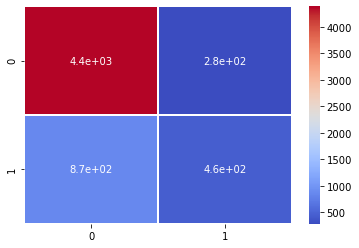

In [ ]:
# 1. LogR_Imbalanced
cm_logr1 = confusion_matrix(y_test, y_test_pred_logr1)
sns.heatmap(cm_logr1,annot= True,linewidths=1,cmap='coolwarm')

<AxesSubplot:>

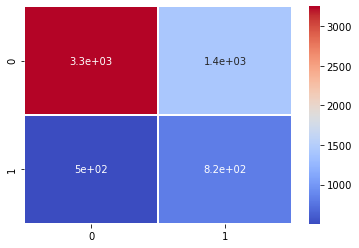

In [ ]:
# 2. LogR_TomekLinks
cm_logr2 = confusion_matrix(y_test, y_test_pred_logr2)
sns.heatmap(cm_logr2,annot= True,linewidths=1,cmap='coolwarm')

<AxesSubplot:>

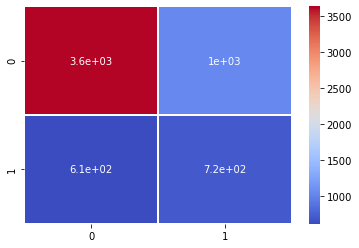

In [ ]:
# 3. SVM SMOTE_TomekLinks
cm_svc5 = confusion_matrix(y_test, y_test_pred_svc5)
sns.heatmap(cm_svc5, annot= True, linewidths=1, cmap='coolwarm')

<AxesSubplot:>

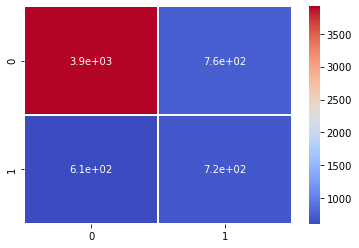

In [ ]:
# 4. SVM_TomekLinks
cm_svc2 = confusion_matrix(y_test, y_test_pred_svc2)
sns.heatmap(cm_svc2,annot= True,linewidths=1,cmap='coolwarm')

<AxesSubplot:>

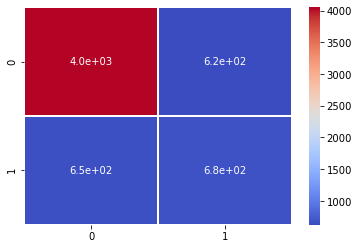

In [ ]:
# 5. RF_SMOTE_TomekLinks
cm_rf5 = confusion_matrix(y_test, y_test_pred_rf5)
sns.heatmap(cm_rf5,annot= True, linewidths=1, cmap='coolwarm')

<AxesSubplot:>

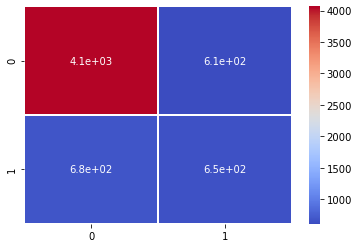

In [ ]:
# 6. RF_SMOTE
cm_rf4 = confusion_matrix(y_test, y_test_pred_rf4)
sns.heatmap(cm_rf4, annot= True, linewidths=1, cmap='coolwarm')

<AxesSubplot:>

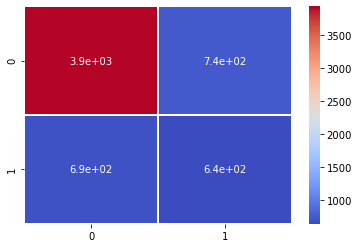

In [ ]:
# 7. XGBoost_SMOTE_Tomeklinks
cm_xgb5 = confusion_matrix(y_test, y_test_pred_xgb5)
sns.heatmap(cm_xgb5, annot= True, linewidths=1, cmap='coolwarm')

<AxesSubplot:>

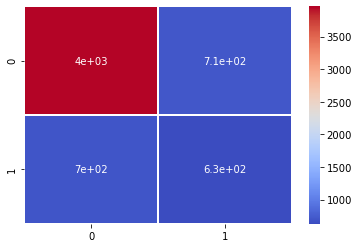

In [ ]:
# 8. XGBoost_SMOTE
cm_xgb4 = confusion_matrix(y_test, y_test_pred_xgb4)
sns.heatmap(cm_xgb4, annot= True, linewidths=1, cmap='coolwarm')

# **H. Selected Models and their Hyper-parameters Tuning**

## **Modular Functions**

In [164]:
def plot_coef(model, X_train1):
  ''' This function takes fitted model and training predictor dataset as inputs,
      and plots coefficients/importances of predictor variables
  '''
    #Plot coefficients if model uses Gradient Descent
  try:
    series_coef = pd.Series(model.coef_[0], index = X_train1.columns)
    # Note: We have to use .coef_[0] for logistic regression to put it into a dataframe. 
    series_coef = series_coef.sort_values()
    series_coef.plot(kind='barh', figsize=(14,10), fontsize=14)
    plt.ylabel('Feature',fontsize=18)
    plt.xlabel('Size of Coefficient',fontsize=18)
  except AttributeError:
    pass
    #Plot feature importances if model uses Tree-based algorithm
  try:
    series_coefs = pd.Series(model.feature_importances_,index = X_train1.columns)
    series_coefs = series_coefs.sort_values()
    series_coefs.plot(kind='barh',figsize=(14,10),fontsize=14)
    plt.ylabel('Feature',fontsize=18)
    plt.xlabel('Level of Importance',fontsize=18)
  except AttributeError:
    pass

In [166]:
# Importing grid search and randomized search cv classes
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Modular function for hyper-parameter Tunings of Classifiers
def Model_tuning(model, X_train, y_train, X_test, y_test, parameters, metric, search):
  ''' This function takes algorithm class, training data, test data, hyper-parameter values, evaluation metric 
      and search method (i.e, grid or random) as inputs.
      This function does hyper-parameter tuning alongwith cross-validation using either GridSearchCV or RandomSearchCV.
      After getting optimal/best hyper-parameter values, it fits the best estimator on train data.
      Using fitted model, we get class and probability predictions on test data.
      It also plots features importances and returns class/probability predictions on test and train data as well.
  '''
    # Scaling features
  scaler = MinMaxScaler()
  X_train1 = scaler.fit_transform(X_train)
  X_test1 = scaler.transform(X_test)
   # Doing hyper-parameter tuning and k-fold validation
  if search == 'random':
    clf_model = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 3, scoring= metric)
  if search == 'grid':
    clf_model = GridSearchCV(estimator=model, param_grid = parameters, cv = 3, scoring=metric)
  
  # re-fitting the model on whole train data
  clf = clf_model.fit(X_train1, y_train)
  # Getting predicted classes for both train and test data
  y_train_pred = clf.predict(X_train1)
  y_test_pred = clf.predict(X_test1)
  # Getting predicted probabilities for both train and test data
  y_train_prob = clf.predict_proba(X_train1)
  y_test_prob = clf.predict_proba(X_test1)

  print("Model Results")
  # By default =, model gives accuracy score
  print("Best Train Accuracy",  "Score: {}".format(clf.best_estimator_.score(X_train1, y_train)))
  # Getting test data score after re-fitting the model on train data
  print("Best Test Accuracy", "Score: {}".format(clf.best_estimator_.score(X_test1, y_test)))
  # Getting hyper-parameter values for the best_estimator found during cross-validation
  print("Best Parameters: {}".format(clf.best_estimator_))
  # Plotting Feature Importances
  # plot_coef(clf.best_estimator_, X_train)
  # plt.title('Impact of Features on Default Prediction', fontsize=22)
  return y_train_pred, y_test_pred, y_train_prob, y_test_prob

In [167]:
# Installing colorama
# used to display the text in different colors. It is used to make the code more readable.
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [169]:
from colorama import Fore

# Modular function to calculate KS-chart using Decile Method for classifiers
# its used to evaluate the separation between class distributions

def ks_chart(data=None, default_1=None, y_prob=None):
    ''' This table takes a dataframe containig y_test labels and respective probabilities, and returns a ks-table chart.
    '''
    # Creating a new column containing the class labels for Non-events (i.e., Non-defaulters)
    data['default_0'] = 1 - data[default_1]
    # dividing observations into 10 bins basis probabilities of Defaulter Class-1 
    data['buckets'] = pd.qcut(data[y_prob], 10)
    # Grouping observations into 10 bins of Class-1 propabilities
    grouped = data.groupby('buckets', as_index = False)
    # Initialising the ks-dataframe
    kstable = pd.DataFrame()
    # Getting column for lower limit of probability score for a given bin
    kstable['min_prob'] = grouped.min()[y_prob]
    # Getting column for Upper limit of probability score for a given bin
    kstable['max_prob'] = grouped.max()[y_prob]
    # Getting counts of all events in each probability bin
    kstable['events']   = grouped.sum()[default_1]
    # Getting counts of all Non-events in each probability bin
    kstable['non_events'] = grouped.sum()['default_0']
    # Sorting ks-dataframe using probabilities bins
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    # Getting a new column for event rate in each bin (i.e., number of events captured in a given bin divided by total number of events)
    # Events: Defaulter (Class-1); Non-events: Non-defaulter (Class-0)
    kstable['event_rate'] = (kstable.events / data[default_1].sum()).apply('{0:.2%}'.format)
    # Getting a new column for Non-event rate in each bin 
    # (i.e., number of Non-events captured in a given bin divided by total number of events)
    kstable['non_event_rate'] = (kstable.non_events / data['default_0'].sum()).apply('{0:.2%}'.format)
    # Getting a new column for cumulative event & non-event rate in each successive bin
    kstable['cum_event_rate']=(kstable.events / data[default_1].sum()).cumsum()
    kstable['cum_nonevent_rate']=(kstable.non_events / data['default_0'].sum()).cumsum()
    # Getting a new column for KS-values in each bin 
    # (i.e., Difference of cumulative Event and Non-event rates)
    kstable['KS'] = np.round(kstable['cum_event_rate']-kstable['cum_nonevent_rate'], 3) * 100

    #Formatting ks table dataframe
    kstable['cum_event_rate']= kstable['cum_event_rate'].apply('{0:.2%}'.format)
    kstable['cum_nonevent_rate']= kstable['cum_nonevent_rate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Deciles', inplace=True)
    pd.set_option('display.max_columns', 30)
    
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

**scipy.stats.ks_2samp** (Inbuilt in library)
* Performs the two-sample Kolmogorov-Smirnov test for goodness of fit.
* This test compares the underlying continuous distributions F(x) and G(x) of two independent samples.
* alternative attribute defines the null and alternate hypothesis, Default vale is "two-sided", meaning CDFs of both underlying distributions are same.
* returns KS statistic and p-value.
* **If the KS statistic is small or the p-value is high, then we cannot reject the null hypothesis in favor of the alternative.**
* p-value should be less than 0.05 to reject.

## **1. Logistic Regression: Hyper-parameters tuning**

### **A. Original Imbalanced Dataset**

In [ ]:
# Range of values to search across for Tuning hyper-parameters
param_grid_lr = [{'C':[0.01, 0.1, 1, 1.1, 1.5, 2],
                  'max_iter':[100,1000], 
                  'solver' : ['saga', 'lbfgs', 'liblinear'],
                  'penalty' : ['l2']}]

In [ ]:
# Importing LogisticRegression Class
from sklearn.linear_model import LogisticRegression
# Instantiating Classifier Class
logr_h0 = LogisticRegression(random_state=12, class_weight = "balanced")

In [ ]:
# For visualizing plots in Jupyter notebook
%matplotlib inline

Model Results
Best Train Accuracy Score: 0.7055833333333333
Best Test Accuracy Score: 0.6888333333333333
Best Parameters: LogisticRegression(C=2, class_weight='balanced', max_iter=1000, random_state=12,
                   solver='liblinear')


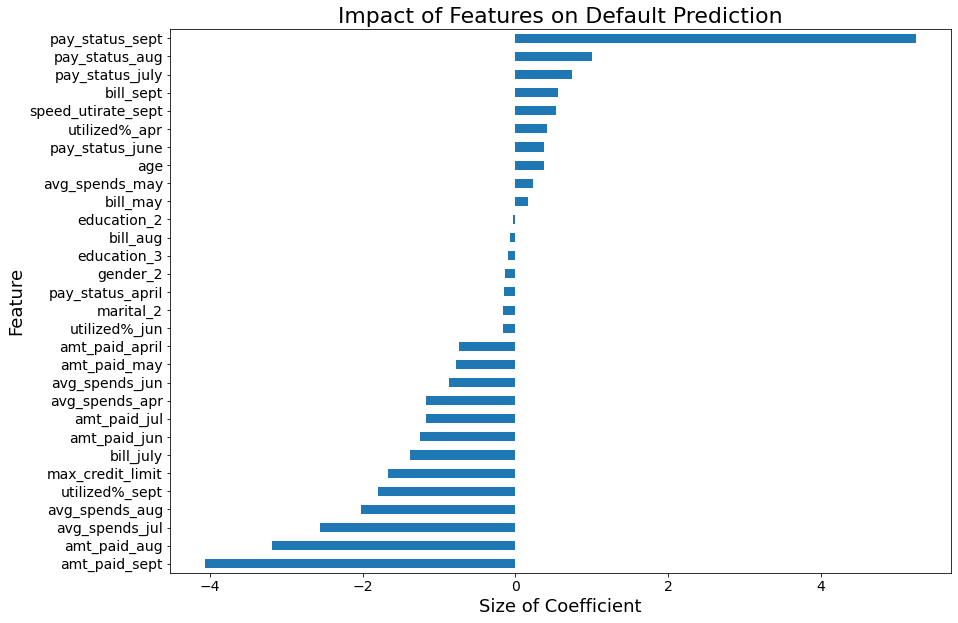

In [ ]:
# RandomSearchCV
# Training model on TomekLinks under-sampled dataset and returning predictions on train and test datasets
y_tr_pred_logrh0, y_ts_pred_logrh0, y_tr_prob_logrh0, y_ts_prob_logrh0 = Model_tuning(logr_h0, X_train, y_train, X_test, y_test,
                                                                                      param_grid_lr, metric='roc_auc', search='random')
# plotting coefficients values

In [ ]:
# Evaluation metrics for LogR Classifier for TomekLinks under-sampled dataset with Hyper-parameter Tuning
models =[logr_h0]
model_lr_h0 = model_metric(models, y_train, y_tr_pred_logrh0, y_tr_prob_logrh0[:,1], 
                           y_test, y_ts_pred_logrh0, y_ts_prob_logrh0[:,1])
model_lr_h0['model_name']='Tuned_LogR_imbalanced'
model_lr_h0

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,Tuned_LogR_imbalanced,0.71,0.69,0.49,0.46,0.4,0.38,0.64,0.61,0.73,0.71,0.2,0.21


<AxesSubplot:>

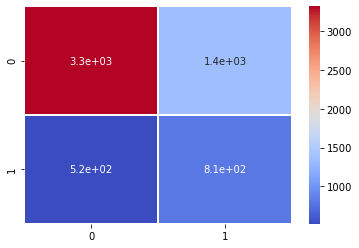

In [ ]:
# Confusion Matrix of Tuned LogR_TomekLinks
cm_logr_h0 = confusion_matrix(y_test, y_ts_pred_logrh0)
sns.heatmap(cm_logr_h0, annot= True, linewidths=1, cmap='coolwarm')

In [ ]:
# Prepare a dataframe containig y_test labels and respective probabilities.
ks_data_h0 = pd.DataFrame()
ks_data_h0['defaulter'] = y_test['default_nxt_mnth']
ks_data_h0['default_prob'] = y_ts_prob_logrh0[:,1]
# Display KS-chart
ks_logR_h0 = ks_chart(ks_data_h0, 'defaulter', 'default_prob')
ks_logR_h0

KS is 34.9% at decile 2


,min_prob,max_prob,events,non_events,event_rate,non_event_rate,cum_event_rate,cum_nonevent_rate,KS
Deciles,,,,,,,,,
1,0.724575,0.996020,401,199,30.22%,4.26%,30.22%,4.26%,26.0
2,0.582393,0.724322,225,375,16.96%,8.02%,47.17%,12.28%,34.9
3,0.522100,0.582351,132,468,9.95%,10.01%,57.12%,22.30%,34.8
4,0.483470,0.522088,87,513,6.56%,10.98%,63.68%,33.28%,30.4
5,0.449022,0.483445,86,514,6.48%,11.00%,70.16%,44.28%,25.9
6,0.406740,0.448958,88,512,6.63%,10.96%,76.79%,55.23%,21.6
7,0.359730,0.406693,72,528,5.43%,11.30%,82.22%,66.53%,15.7
8,0.307370,0.359686,77,523,5.80%,11.19%,88.02%,77.72%,10.3
9,0.217491,0.307332,80,520,6.03%,11.13%,94.05%,88.85%,5.2


In [ ]:
# Installing scikit-plot library
!pip install scikit-plot

In [ ]:
# checking ks-statistics and p-value using in-built class
from scipy.stats import ks_2samp
# Ks-satistics for Logisitc Regression using undersampled dataset
ks_2samp(y_ts_prob_logrh0[:,0], y_ts_prob_logrh0[:,1])

KstestResult(statistic=0.2865, pvalue=2.545870678483978e-217)

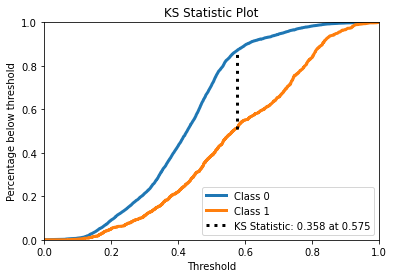

In [ ]:
# Plotting CDFs of both classes
from scikitplot import metrics as skplt
skplt.plot_ks_statistic(y_test, y_ts_prob_logrh0)
plt.show()

**Observations**:
1. After tuning, the scores received are exactly same as without tuning.
2. As per decile method, KS value is 34.9% at decile 2.
3. As per inbuilt class ks_2samp method, KS value is ~0.29 with almost negligible p-value. 
4. This indicates that the cumulative distributions of both classes (Defaulters vs non-defaulters) are different and hence, model is able to differentiate both classes quite good).

### **B. TomekLinks Dataset**

In [ ]:
# Range of values to search across for Tuning hyper-parameters
param_grid_lr = [{'C':[0.01, 0.1, 1, 1.1, 1.5, 2],
                  'max_iter':[100,1000], 
                  'solver' : ['saga', 'lbfgs', 'liblinear'],
                  'penalty' : ['l2']}]

In [ ]:
# Importing classifier
from sklearn.linear_model import LogisticRegression
# Instantiating Classifier Class
logr_h1 = LogisticRegression(random_state=12, class_weight = "balanced")

Model Results
Best Train Accuracy Score: 0.7044435566209437
Best Test Accuracy Score: 0.6796666666666666
Best Parameters: LogisticRegression(C=2, class_weight='balanced', max_iter=1000, random_state=12,
                   solver='saga')


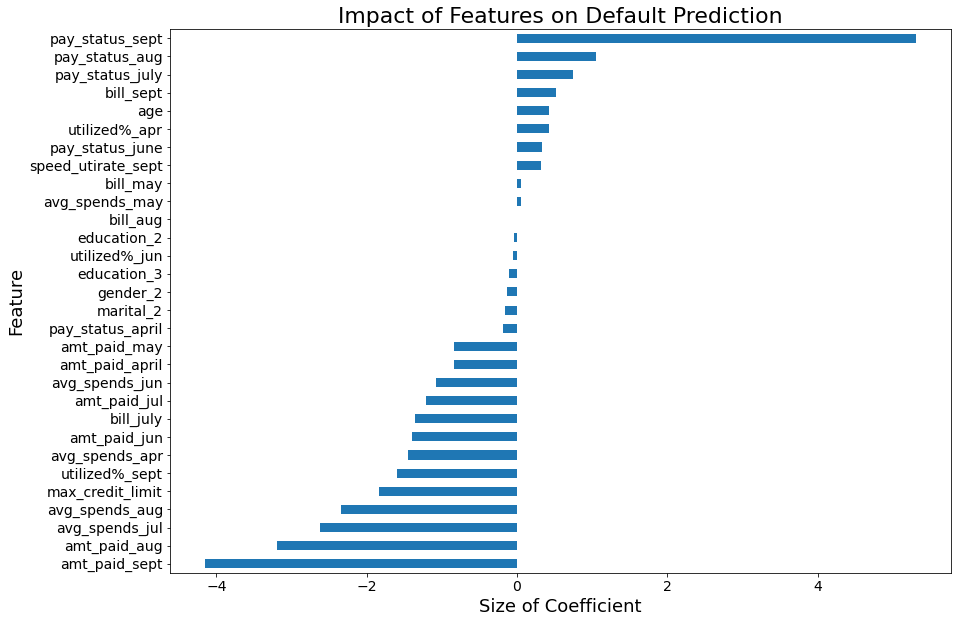

In [ ]:
# RandomSearchCV
# Training model on TomekLinks under-sampled dataset and returning predictions on train and test datasets
y_tr_pred_logrh1, y_ts_pred_logrh1, y_tr_prob_logrh1, y_ts_prob_logrh1 = Model_tuning(logr_h1, X_tomek, y_tomek, X_test, y_test,
                                                                                      param_grid_lr, metric='roc_auc', search='random')
# plotting coefficients values

In [ ]:
# Ealuation metrics for LogR Classifier for TomekLinks under-sampled dataset with Hyper-parameter Tuning
models =[logr_h1]
model_lr_h1 = model_metric(models, y_tomek, y_tr_pred_logrh1, y_tr_prob_logrh1[:,1], 
                           y_test, y_ts_pred_logrh1, y_ts_prob_logrh1[:,1])
model_lr_h1['model_name']='Tuned_LogR_Tomek'
model_lr_h1

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,Tuned_LogR_Tomek,0.7,0.68,0.51,0.46,0.42,0.37,0.64,0.62,0.73,0.71,0.2,0.21


<AxesSubplot:>

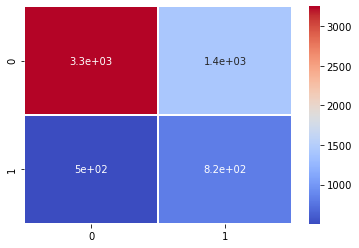

In [ ]:
# Confusion Matrix of Tuned LogR_TomekLinks
cm_logr_h1 = confusion_matrix(y_test, y_ts_pred_logrh1)
sns.heatmap(cm_logr_h1, annot= True, linewidths=1, cmap='coolwarm')

In [ ]:
# Prepare a dataframe containig y_test labels and respective probabilities.
ks_data = pd.DataFrame()
ks_data['defaulter'] = y_test['default_nxt_mnth']
ks_data['default_prob'] = y_ts_prob_logrh1[:,1]
# Display KS-chart
ks_logR_tk = ks_chart(ks_data,'defaulter', 'default_prob')
ks_logR_tk

KS is 35.099999999999994% at decile 2


,min_prob,max_prob,events,non_events,event_rate,non_event_rate,cum_event_rate,cum_nonevent_rate,KS
Deciles,,,,,,,,,
1,0.732614,0.996422,395,205,29.77%,4.39%,29.77%,4.39%,25.4
2,0.588223,0.732291,233,367,17.56%,7.85%,47.32%,12.24%,35.1
3,0.527962,0.588105,130,470,9.80%,10.06%,57.12%,22.30%,34.8
4,0.487661,0.527910,85,515,6.41%,11.02%,63.53%,33.32%,30.2
5,0.451540,0.487541,87,513,6.56%,10.98%,70.08%,44.30%,25.8
6,0.404963,0.451310,93,507,7.01%,10.85%,77.09%,55.15%,21.9
7,0.357138,0.404943,70,530,5.28%,11.34%,82.37%,66.49%,15.9
8,0.302404,0.357040,78,522,5.88%,11.17%,88.24%,77.66%,10.6
9,0.213553,0.302391,79,521,5.95%,11.15%,94.20%,88.81%,5.4


In [ ]:
# checking ks-statistics and p-value using in-built class
from scipy.stats import ks_2samp
ks_2samp(y_ts_prob_logrh1[:,0], y_ts_prob_logrh1[:,1])

KstestResult(statistic=0.2628333333333333, pvalue=1.4948909770599346e-182)

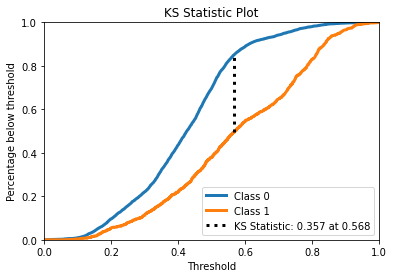

In [ ]:
# Plotting CDFs of both classes
from scikitplot import metrics as skplt
skplt.plot_ks_statistic(y_test, y_ts_prob_logrh1)
plt.show()

**Observations**:
1. After tuning, the scores received are exactly same as without tuning.
2. As per decile method, KS value is 35.1% at decile 2.
3. As per inbuilt class ks_2samp method, KS value is ~0.26 with almost negligible p-value. 
4. This indicates that the cumulative distributions of both classes (Defaulters vs non-defaulters) are different and hence, model is able to differentiate both classes quite good).

## **2. RandomForest Classifier: Hyper-parameters tuning**

### **A. SMOTE_TomekLinks Combined Re-sampled Dataset**

In [ ]:
# For RandomSearchCV
# Range of values to search across for Tuning hyper-parameters
param_grid_rf = {'n_estimators': [ 600, 800, 1000], 
                 'criterion': ['entropy', 'gini'],
                 'max_depth': [50, 100, 150],
                 'min_samples_leaf': [10, 15, 25],
                 'min_samples_split': [10, 20, 50],
                 'max_features': [0.33, 0.5, 1],
                 'max_samples': [0.6, 0.8, 1],
                 'class_weight' : ['balanced', 'balanced_subsample', None]}

In [ ]:
# Importing Classifier
from sklearn.ensemble import RandomForestClassifier
# Instantiating Classifier Class
rforest_h = RandomForestClassifier(random_state = 18, n_jobs=-1)

Model Results
Best Train Accuracy Score: 0.8924004235562434
Best Test Accuracy Score: 0.7705
Best Parameters: RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=100, max_features=0.33, max_samples=0.8,
                       min_samples_leaf=10, min_samples_split=20,
                       n_estimators=1000, n_jobs=-1, random_state=18)


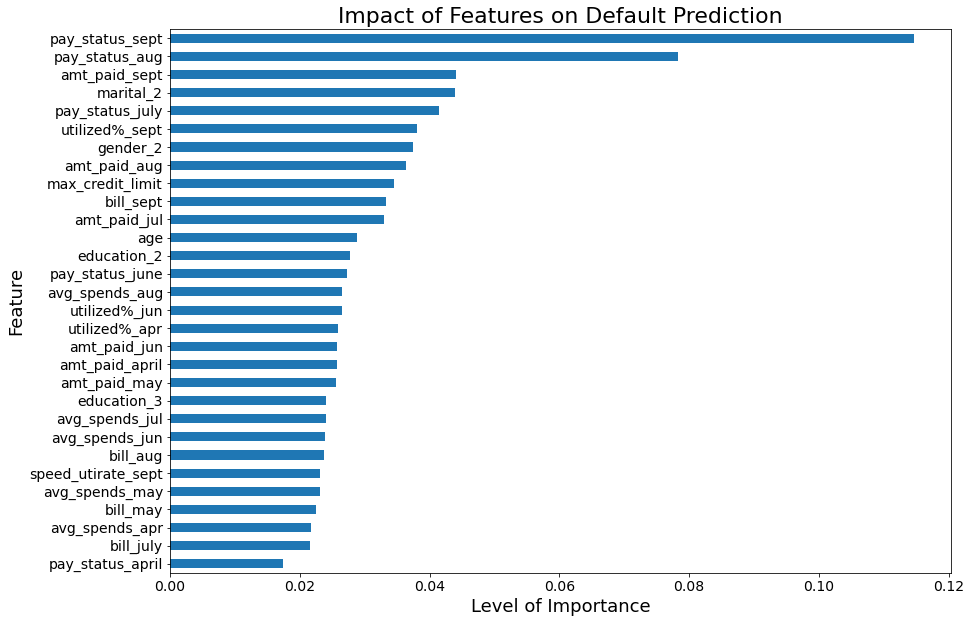

In [ ]:
# RandomSearchCV
# Training model on SMOTE-TomekLinks re-sampled dataset and returning predictions on train and test datasets
y_tr_pred_rf5, y_ts_pred_rf5, y_tr_prob_rf5, y_ts_prob_rf5 = Model_tuning(rforest_h, X_smtk, y_smtk, X_test, y_test,
                                                                          param_grid_rf, metric='roc_auc', search='random')

In [ ]:
# Evaluation metrics for RF Classifier for SMOTE-TomekLinks re-sampled dataset with Hyper-parameter Tuning
models =[rforest_h]
model_rf_h5 = model_metric(models, y_smtk, y_tr_pred_rf5, y_tr_prob_rf5[:,1], 
                           y_test, y_ts_pred_rf5, y_ts_prob_rf5[:,1])
model_rf_h5['model_name']='Tuned_RF_SMOTE-Tomek'
model_rf_h5

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,Tuned_RF_SMOTE-Tomek,0.89,0.77,0.89,0.51,0.91,0.48,0.88,0.54,0.97,0.76,0.09,0.16


<AxesSubplot:>

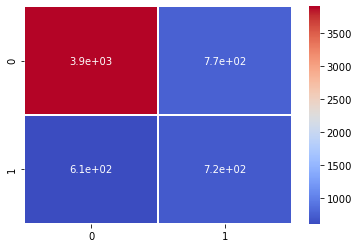

In [ ]:
# Confusion Matrix of Tuned RF_SMOTE_TomekLinks
cm_rf_h5 = confusion_matrix(y_test, y_ts_pred_rf5)
sns.heatmap(cm_rf_h5, annot= True, linewidths=1, cmap='coolwarm')

In [ ]:
# Prepare a dataframe containig y_test labels and respective probabilities.
ks_data = pd.DataFrame()
ks_data['defaulter'] = y_test['default_nxt_mnth']
ks_data['default_prob'] = y_ts_prob_rf5[:,1]
# Display KS-chart
ks_rf_sm_tk = ks_chart(ks_data,'defaulter', 'default_prob')
ks_rf_sm_tk

KS is 39.1% at decile 3


,min_prob,max_prob,events,non_events,event_rate,non_event_rate,cum_event_rate,cum_nonevent_rate,KS
Deciles,,,,,,,,,
1,0.711247,0.988254,385,215,29.01%,4.60%,29.01%,4.60%,24.4
2,0.559833,0.711227,252,348,18.99%,7.45%,48.00%,12.05%,36.0
3,0.436219,0.559615,165,435,12.43%,9.31%,60.44%,21.36%,39.1
4,0.350268,0.436067,130,470,9.80%,10.06%,70.23%,31.41%,38.8
5,0.288691,0.349905,95,505,7.16%,10.81%,77.39%,42.22%,35.2
6,0.240897,0.288628,83,517,6.25%,11.06%,83.65%,53.28%,30.4
7,0.197461,0.240765,76,524,5.73%,11.21%,89.37%,64.50%,24.9
8,0.151864,0.197446,63,537,4.75%,11.49%,94.12%,75.99%,18.1
9,0.103931,0.151720,49,551,3.69%,11.79%,97.81%,87.78%,10.0


In [ ]:
# checking ks-statistics and p-value using in-built class
from scipy.stats import ks_2samp
ks_2samp(y_ts_prob_rf5[:,0], y_ts_prob_rf5[:,1])

KstestResult(statistic=0.5085, pvalue=0.0)

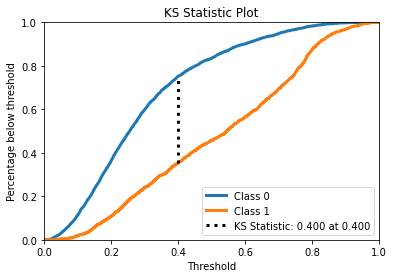

In [ ]:
# Plotting CDFs of both classes
from scikitplot import metrics as skplt
skplt.plot_ks_statistic(y_test, y_ts_prob_rf5)
plt.show()

**Observations**:
1. After tuning, the Recall (+5.88%) and AUC-ROC (+1.33%) scores have improved.
2. As per decile method, KS value is 39.1% at decile 3.
3. As per inbuilt class ks_2samp method, KS value is ~0.51 with almost negligible p-value. 
4. This indicates that the cumulative distributions of both classes (Defaulters vs non-defaulters) are different and hence, model is able to differentiate both classes quite good).

### **B. SMOTE Dataset**

In [ ]:
# For RandomSearchCV
# Range of values to search across for Tuning hyper-parameters
param_grid_rf1 = {'n_estimators': [500, 700], 
                 'criterion': ['entropy', 'gini'],
                 'max_depth': [ 80, 100, 120],
                 'min_samples_leaf': [ 25, 35, 50],
                 'min_samples_split': [10, 20, 40],
                 'max_features': [0.33, 0.5, 1],
                 'max_samples': [0.5, 0.8, 1]}

In [ ]:
# Importing RF Classifier class
from sklearn.ensemble import RandomForestClassifier
# Instantiating Classifier Class
rforest_h4 = RandomForestClassifier(random_state = 18, n_jobs=-1, class_weight ='balanced')

Model Results
Best Train Accuracy Score: 0.8324327216307313
Best Test Accuracy Score: 0.7686666666666667
Best Parameters: RandomForestClassifier(class_weight='balanced', max_depth=120,
                       max_features=0.33, max_samples=0.8, min_samples_leaf=25,
                       min_samples_split=10, n_estimators=700, n_jobs=-1,
                       random_state=18)


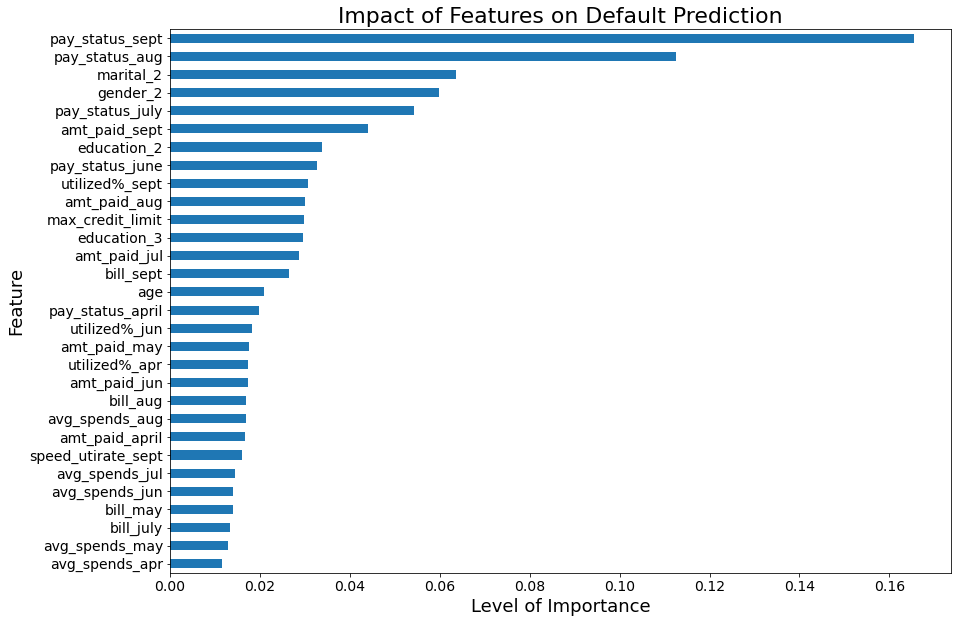

In [ ]:
# Training model on SMOTE over-sampled dataset and returning predictions on train and test datasets
y_tr_pred_rf4, y_ts_pred_rf4, y_tr_prob_rf4, y_ts_prob_rf4 = Model_tuning(rforest_h4, X_smote, y_smote,
                                                                          X_test, y_test, param_grid_rf1,
                                                                          metric='roc_auc', search='random')

In [ ]:
# Setting display of all columns
pd.set_option('display.max_columns', 30)

In [ ]:
# Evaluation metrics for RF Classifier for SMOTE over-sampled dataset with Hyper-parameter Tuning
models =[rforest_h4]
model_rf_h4 = model_metric(models, y_smote, y_tr_pred_rf4, y_tr_prob_rf4[:,1], 
                           y_test, y_ts_pred_rf4, y_ts_prob_rf4[:,1])
model_rf_h4['model_name']='Tuned_RF_SMOTE'
model_rf_h4

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,Tuned_RF_SMOTE,0.83,0.77,0.83,0.51,0.86,0.48,0.8,0.55,0.93,0.76,0.12,0.17


<AxesSubplot:>

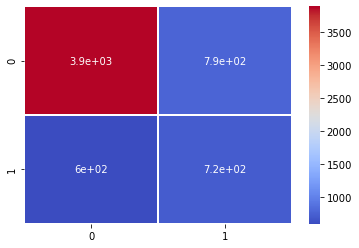

In [ ]:
# Confusion Matrix of Tuned RF_SMOTE dataset
cm_rf_h4 = confusion_matrix(y_test, y_ts_pred_rf4)
sns.heatmap(cm_rf_h4, annot= True, linewidths=1, cmap='coolwarm')

In [ ]:
# Prepare a dataframe containig y_test labels and respective probabilities.
ks_data_rf4 = pd.DataFrame()
ks_data_rf4['defaulter'] = y_test['default_nxt_mnth']
ks_data_rf4['default_prob'] = y_ts_prob_rf4[:,1]
# Display KS-chart
ks_rf_smote4 = ks_chart(ks_data_rf4,'defaulter', 'default_prob')
ks_rf_smote4

KS is 39.7% at decile 4


,min_prob,max_prob,events,non_events,event_rate,non_event_rate,cum_event_rate,cum_nonevent_rate,KS
Deciles,,,,,,,,,
1,0.715979,0.970023,391,209,29.46%,4.47%,29.46%,4.47%,25.0
2,0.572871,0.715763,240,360,18.09%,7.70%,47.55%,12.18%,35.4
3,0.448716,0.572864,162,438,12.21%,9.37%,59.76%,21.55%,38.2
4,0.365154,0.448597,148,452,11.15%,9.67%,70.91%,31.22%,39.7
5,0.310267,0.365126,93,507,7.01%,10.85%,77.92%,42.07%,35.8
6,0.262832,0.310121,71,529,5.35%,11.32%,83.27%,53.39%,29.9
7,0.220546,0.262710,75,525,5.65%,11.23%,88.92%,64.63%,24.3
8,0.176454,0.220468,76,524,5.73%,11.21%,94.65%,75.84%,18.8
9,0.120855,0.176249,47,553,3.54%,11.83%,98.19%,87.67%,10.5


In [ ]:
# checking ks-statistics and p-value using in-built class
from scipy.stats import ks_2samp
ks_2samp(y_ts_prob_rf4[:,0], y_ts_prob_rf4[:,1])

KstestResult(statistic=0.49866666666666665, pvalue=0.0)

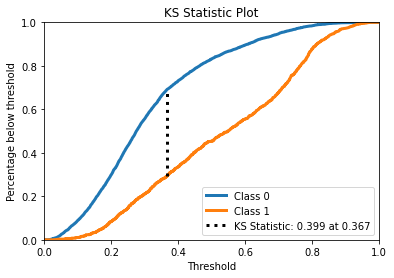

In [ ]:
# Plotting CDFs of both classes
from scikitplot import metrics as skplt
skplt.plot_ks_statistic(y_test, y_ts_prob_rf4)
plt.show()

**Observations**:
1. After tuning, the Recall (+12.24%), F-1 (+2%) and AUC-ROC (+1.33%) scores have improved significantly.
2. As per decile method, KS value is 39.7% at decile 4.
3. As per inbuilt class ks_2samp method, KS value is ~0.49 with almost negligible p-value. 
4. This indicates that the cumulative distributions of both classes (Defaulters vs non-defaulters) are different and hence, model is able to differentiate both classes quite good).

## **3. XGBoost Classifier: Hyper-parameters tuning**

### **A. SMOTE_TomekLinks Combined Re-sampled Dataset**

In [ ]:
# param_grid_xgb = {'n_estimators': [50, 100, 150, 200], 
#                   'max_depth': [5, 10, 15], 
#                   'learning_rate': [0.02, 0.03],
#                   'subsample' : [0.5, 0.6, 1],
#                   'lambda' : [1, 1.5],
#                   'gamma': [0.2, 0.1]}

In [ ]:
# Range of values to search across for Tuning hyper-parameters
param_grid_xgb = {'n_estimators': [80, 100], 
                  'max_depth': [3, 5, 7], 
                  'learning_rate': [0.02, 0.05],
                  'subsample' : [0.6, 0.8, 1],
                  'lambda' : [1, 3],
                  'min_child_weight' : [1,3],
                  'gamma': [0, 0.01, 0.1]}

In [ ]:
# Initiating XGBClassifier class
xgb_h5 = XGBClassifier(random_state=1, objective = 'binary:logistic',verbosity = 0)
# binary:logistic: logistic regression for binary classification, output probability

Model Results
Best Train Accuracy Score: 0.8092096331894328
Best Test Accuracy Score: 0.7608333333333334
Best Parameters: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', lambda=1,
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, ...)


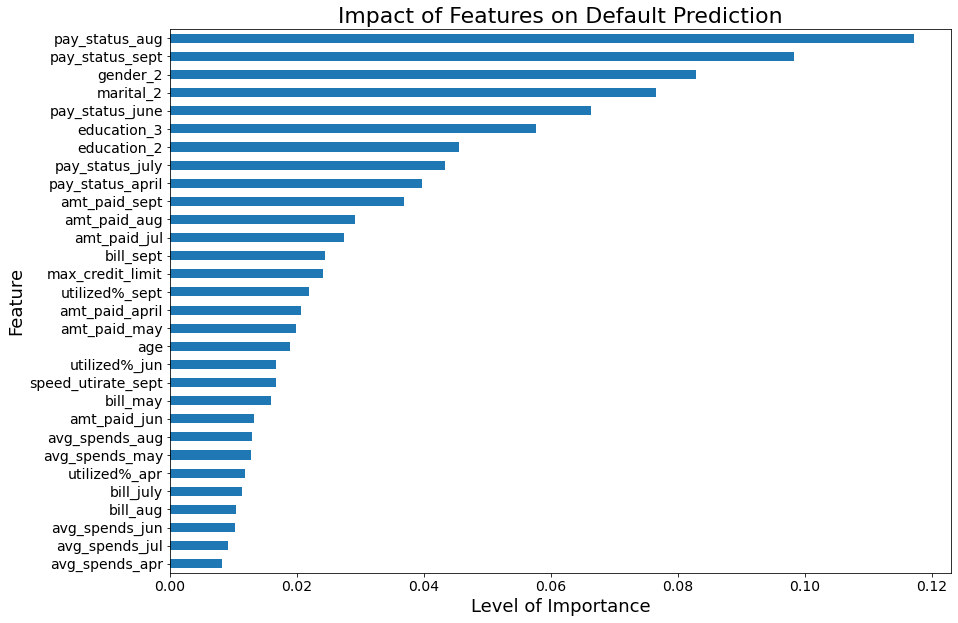

In [ ]:
# Training model on SMOTE-TomekLinks re-sampled dataset and returning predictions on train and test datasets
y_tr_pred_xgb5, y_ts_pred_xgb5, y_tr_prob_xgb5, y_ts_prob_xgb5 = Model_tuning(xgb_h5, X_smtk, y_smtk,X_test, y_test, 
                                                                              param_grid_xgb, metric='roc_auc', search='random')
# Plotting feature Importances

In [ ]:
# Evaluation metrics for XGB Classifier for SMOTE-TomekLinks re-sampled dataset with Hyper-parameter Tuning
models =[xgb_h5]
model_xgb_h5 = model_metric(models, y_smtk, y_tr_pred_xgb5, y_tr_prob_xgb5[:,1], 
                           y_test, y_ts_pred_xgb5, y_ts_prob_xgb5[:,1])
model_xgb_h5['model_name']='Tuned_XGB_SMOTE_tomek'
model_xgb_h5

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,Tuned_XGB_SMOTE_tomek,0.81,0.76,0.81,0.5,0.83,0.47,0.78,0.55,0.89,0.75,0.13,0.17


<AxesSubplot:>

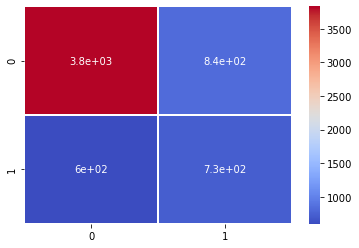

In [ ]:
# Confusion Matrix of Tuned XGB_SMOTE_TomekLinks
cm_rf_h5 = confusion_matrix(y_test, y_ts_pred_xgb5)
sns.heatmap(cm_rf_h5, annot= True, linewidths=1, cmap='coolwarm')

In [ ]:
# Prepare a dataframe containig y_test labels and respective probabilities.
ks_data_xgb5 = pd.DataFrame()
ks_data_xgb5['defaulter'] = y_test['default_nxt_mnth']
ks_data_xgb5['default_prob'] = y_ts_prob_xgb5[:,1]
# Display KS-chart
ks_xgb_sm_tk5 = ks_chart(ks_data_xgb5,'defaulter', 'default_prob')
ks_xgb_sm_tk5

KS is 38.0% at decile 3


,min_prob,max_prob,events,non_events,event_rate,non_event_rate,cum_event_rate,cum_nonevent_rate,KS
Deciles,,,,,,,,,
1,0.734952,0.944358,388,212,29.24%,4.54%,29.24%,4.54%,24.7
2,0.580063,0.734898,230,370,17.33%,7.92%,46.57%,12.45%,34.1
3,0.456848,0.579945,173,427,13.04%,9.14%,59.61%,21.59%,38.0
4,0.369777,0.456633,128,472,9.65%,10.10%,69.25%,31.69%,37.6
5,0.305625,0.369670,87,513,6.56%,10.98%,75.81%,42.67%,33.1
6,0.253230,0.305584,92,508,6.93%,10.87%,82.74%,53.54%,29.2
7,0.208262,0.253213,79,521,5.95%,11.15%,88.70%,64.69%,24.0
8,0.164549,0.208249,58,542,4.37%,11.60%,93.07%,76.29%,16.8
9,0.117189,0.164523,62,538,4.67%,11.51%,97.74%,87.80%,9.9


In [ ]:
# checking ks-statistics and p-value using in-built class
from scipy.stats import ks_2samp
ks_2samp(y_ts_prob_xgb5[:,0], y_ts_prob_xgb5[:,1])

KstestResult(statistic=0.48183333333333334, pvalue=0.0)

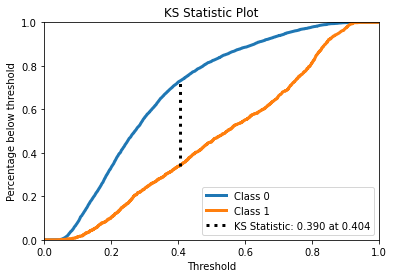

In [ ]:
# Plotting CDFs of both classes
from scikitplot import metrics as skplt
skplt.plot_ks_statistic(y_test, y_ts_prob_xgb5)
plt.show()

**Observations**:
1. After tuning, the Recall (+14.6%), F-1 (+6.4%), Precision (+2.2%) and AUC-ROC (+2.7%) scores have improved significantly.
2. As per decile method, KS value is 38% at decile 3.
3. As per inbuilt class ks_2samp method, KS value is ~0.48 with almost negligible p-value. 
4. This indicates that the cumulative distributions of both classes (Defaulters vs non-defaulters) are different and hence, model is able to differentiate both classes quite good).

### **B. SMOTE Dataset**

In [ ]:
# param_grid_xgb1 = {'n_estimators': [80, 100, 200], 
#                   'max_depth': [ 3, 5, 7], 
#                   'learning_rate': [0.01, 0.3],
#                   'subsample' : [0.6, 0.8, 1],
#                   'lambda' : [1, 3],
#                   'gamma': [0, 0.02]}

In [ ]:
# Range of values to search across for Tuning hyper-parameters
param_grid_xgb1 = {'n_estimators': [200], 
                  'max_depth': [20], 
                  'learning_rate': [0.01],
                  'subsample' : [0.6],
                  'lambda' : [1],
                  'gamma': [0.01]}

In [ ]:
# Initiating XGBClassifier class
xgb_h4 = XGBClassifier(random_state=1, objective = 'binary:logistic',verbosity = 0)

Model Results
Best Train Accuracy Score: 0.9703600663420898
Best Test Accuracy Score: 0.7771666666666667
Best Parameters: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.01, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', lambda=1,
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, ...)


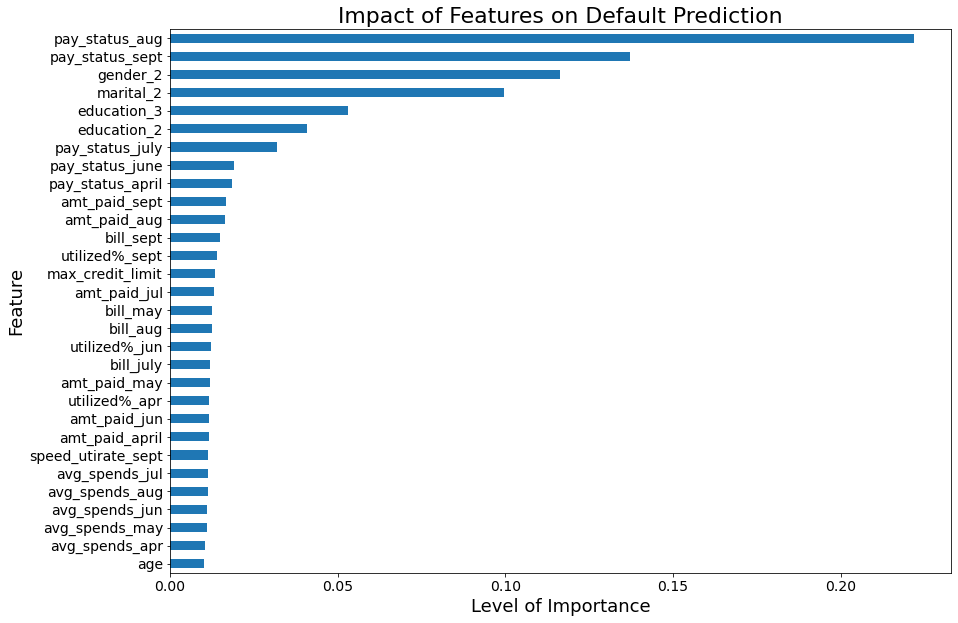

In [ ]:
# Evaluation metrics for XGB Classifier for SMOTE over-sampled dataset with Hyper-parameter Tuning
y_tr_pred_xgb4, y_ts_pred_xgb4, y_tr_prob_xgb4, y_ts_prob_xgb4 = Model_tuning(xgb_h4, X_smote, y_smote, X_test, y_test, 
                                                                              param_grid_xgb1, metric='roc_auc', search='random')
# Plotting feature Importances

In [ ]:
# Evaluation metrics for XGB Classifier for SMOTE over-sampled dataset with Hyper-parameter Tuning
models =[xgb_h4]
model_xgb_h4 = model_metric(models, y_smote, y_tr_pred_xgb4, y_tr_prob_xgb4[:,1], 
                           y_test, y_ts_pred_xgb4, y_ts_prob_xgb4[:,1])
model_xgb_h4['model_name']='Tuned_XGB_SMOTE'
model_xgb_h4

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,Tuned_XGB_SMOTE,0.97,0.78,0.97,0.49,0.98,0.5,0.96,0.49,1.0,0.75,0.06,0.16


<AxesSubplot:>

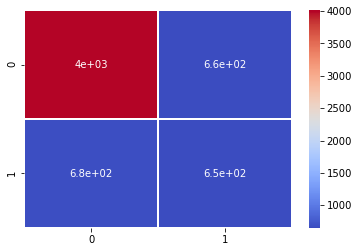

In [ ]:
# Confusion Matrix of Tuned XGB_SMOTE_TomekLinks
cm_xgb_h4 = confusion_matrix(y_test, y_ts_pred_xgb4)
sns.heatmap(cm_xgb_h4, annot= True, linewidths=1, cmap='coolwarm')

In [ ]:
# Prepare a dataframe containig y_test labels and respective probabilities.
# --param xgb1
ks_data_xgb4 = pd.DataFrame()
ks_data_xgb4['defaulter'] = y_test['default_nxt_mnth']
ks_data_xgb4['default_prob'] = y_ts_prob_xgb4[:,1]
# Display KS-chart
ks_xgb_smote4 = ks_chart(ks_data_xgb4,'defaulter', 'default_prob')
ks_xgb_smote4

KS is 38.0% at decile 3


,min_prob,max_prob,events,non_events,event_rate,non_event_rate,cum_event_rate,cum_nonevent_rate,KS
Deciles,,,,,,,,,
1,0.689939,0.922221,374,226,28.18%,4.84%,28.18%,4.84%,23.3
2,0.523717,0.689657,246,354,18.54%,7.58%,46.72%,12.41%,34.3
3,0.410430,0.523408,171,429,12.89%,9.18%,59.61%,21.59%,38.0
4,0.325281,0.410216,107,493,8.06%,10.55%,67.67%,32.14%,35.5
5,0.269378,0.325170,121,479,9.12%,10.25%,76.79%,42.39%,34.4
6,0.227222,0.269331,83,517,6.25%,11.06%,83.04%,53.46%,29.6
7,0.190895,0.227210,84,516,6.33%,11.04%,89.37%,64.50%,24.9
8,0.160063,0.190878,58,542,4.37%,11.60%,93.75%,76.10%,17.6
9,0.125311,0.160043,55,545,4.14%,11.66%,97.89%,87.76%,10.1


In [ ]:
# checking ks-statistics and p-value using in-built class
from scipy.stats import ks_2samp
ks_2samp(y_ts_prob_xgb4[:,0], y_ts_prob_xgb4[:,1])

KstestResult(statistic=0.5656666666666667, pvalue=0.0)

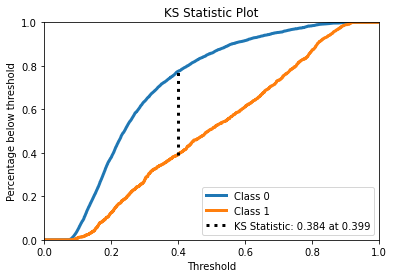

In [ ]:
# Plotting CDFs of both classes
from scikitplot import metrics as skplt
skplt.plot_ks_statistic(y_test, y_ts_prob_xgb4)
plt.show()

**Observations**:
1. After tuning, the Recall (+4.3%), F-1 (+4.3%), Precision (+6.4%) and AUC-ROC (+2.7%) scores have improved.
2. As per decile method, KS value is 38% at decile 3.
3. As per inbuilt class ks_2samp method, KS value is ~0.57 with almost negligible p-value. 
4. This indicates that the cumulative distributions of both classes (Defaulters vs non-defaulters) are different and hence, model is able to differentiate both classes quite good).

## **4. SVM Classifier: Hyper-parameters tuning**

### **A. TomekLinks Undersampled dataset**

In [ ]:
# Range of values to search across for Tuning hyper-parameters
svc_params = [{'C':[0.01, 0.1, 1, 10, 100, 1000], 
               'kernel':['linear','rbf'],
               'gamma':[1, 0.5, 0.2, 0.1]}]

In [ ]:
# Importing SVC class
from sklearn.svm import SVC
svc_h2 = SVC(random_state=12, class_weight='balanced', probability=True)

Model Results
Best Train Accuracy Score: 0.7798197718293604
Best Test Accuracy Score: 0.769
Best Parameters: SVC(C=100, class_weight='balanced', gamma=0.2, probability=True,
    random_state=12)


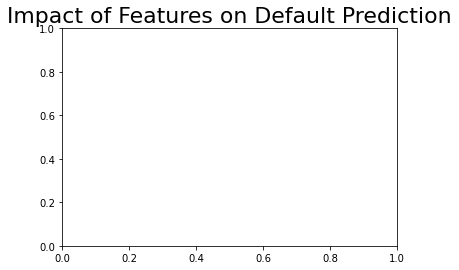

In [ ]:
# Ealuation metrics for XGB Classifier for SMOTE over-sampled dataset with Hyper-parameter Tuning-- New
y_tr_pred_svc2, y_ts_pred_svc2, y_tr_prob_svc2, y_ts_prob_svc2 = Model_tuning(svc_h2, X_tomek, y_tomek, X_test, y_test, 
                                                                                svc_params, metric='roc_auc', search='random')

In [ ]:
# Evaluation metrics for SVM Classifier for TomekLinks undersampled dataset with Hyper-parameter Tuning
models =[svc_h2]
model_svc_h2 = model_metric(models, y_tomek, y_tr_pred_svc2, y_tr_prob_svc2[:,1], 
                            y_test, y_ts_pred_svc2, y_ts_prob_svc2[:,1])
model_svc_h2['model_name']='Tuned_SVM_Tomek'
model_svc_h2

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,Tuned_SVM_Tomek,0.78,0.77,0.57,0.52,0.53,0.48,0.61,0.57,0.78,0.74,0.14,0.14


In [ ]:
# Prepare a dataframe containig y_test labels and respective probabilities
ks_data_svc2 = pd.DataFrame()
ks_data_svc2['defaulter'] = y_test['default_nxt_mnth']
ks_data_svc2['default_prob'] = y_ts_prob_svc2[:,1]
# Display KS-chart
ks_svc_tk2 = ks_chart(ks_data_svc2,'defaulter', 'default_prob')
ks_svc_tk2

KS is 38.800000000000004% at decile 3


,min_prob,max_prob,events,non_events,event_rate,non_event_rate,cum_event_rate,cum_nonevent_rate,KS
Deciles,,,,,,,,,
1,0.540955,0.996745,394,206,29.69%,4.41%,29.69%,4.41%,25.3
2,0.408981,0.540722,266,334,20.05%,7.15%,49.74%,11.56%,38.2
3,0.217706,0.408894,139,461,10.47%,9.87%,60.21%,21.42%,38.8
4,0.162008,0.217659,109,491,8.21%,10.51%,68.43%,31.93%,36.5
5,0.140333,0.161968,89,511,6.71%,10.94%,75.13%,42.86%,32.3
6,0.129676,0.140312,77,523,5.80%,11.19%,80.93%,54.06%,26.9
7,0.121616,0.129668,76,524,5.73%,11.21%,86.66%,65.27%,21.4
8,0.113966,0.121614,66,534,4.97%,11.43%,91.64%,76.70%,14.9
9,0.101714,0.113960,65,535,4.90%,11.45%,96.53%,88.14%,8.4


In [ ]:
# checking ks-statistics and p-value using in-built class
from scipy.stats import ks_2samp
ks_2samp(y_ts_prob_svc2[:,0], y_ts_prob_svc2[:,1])

KstestResult(statistic=0.7316666666666667, pvalue=0.0)

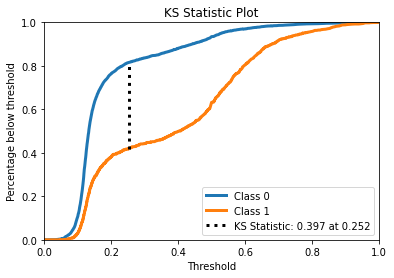

In [ ]:
# Plotting CDFs of both classes
from scikitplot import metrics as skplt
skplt.plot_ks_statistic(y_test, y_ts_prob_svc2)
plt.show()

**Observations**:
1. After tuning, the Recall (+5.56%) and F-1 (+1.96%) scores have improved.
2. As per decile method, KS value is 38.80% at decile 3.
3. As per inbuilt class ks_2samp method, KS value is ~0.73 with almost negligible p-value. 
4. This indicates that the cumulative distributions of both classes (Defaulters vs non-defaulters) are different and hence, model is able to differentiate both classes quite good).

### **B. SMOTE-TomekLinks Combined Re-sampled dataset**

In [ ]:
# Range of values to search across for Tuning hyper-parameters
svc_params1 = [{'C':[0.1, 1, 10, 100, 1000], 
               'kernel':['linear','rbf'],
               'gamma':[1, 0.5, 0.2, 0.1]}]

In [ ]:
# Importing SVC class
from sklearn.svm import SVC
svc_h5 = SVC(random_state=12, class_weight='balanced', probability=True)

In [ ]:
!pip install --upgrade ipykernel

In [ ]:
# Training model on SMOTE-TomekLinks re-sampled dataset and returning predictions on train and test datasets
y_tr_pred_svc5, y_ts_pred_svc5, y_tr_prob_svc5, y_ts_prob_svc5 = Model_tuning(svc_h5, X_smtk, y_smtk, X_test, y_test, 
                                                                              svc_params1, metric='roc_auc', search='random')

Model Results
Best Train Accuracy Score: 0.7740490347804838
Best Test Accuracy Score: 0.7308333333333333
Best Parameters: SVC(C=10, class_weight='balanced', gamma=1, probability=True, random_state=12)


In [ ]:
# Evaluation metrics for SVM Classifier for SMOTE-TomekLinks Combined re-sampled dataset with Hyper-parameter Tuning
models =[svc_h5]
model_svc_h5 = model_metric(models, y_smtk, y_tr_pred_svc5, y_tr_prob_svc5[:,1], 
                           y_test, y_ts_pred_svc5, y_ts_prob_svc5[:,1])
model_svc_h5['model_name'] = 'Tuned_SVM_SMOTE-Tomek'
model_svc_h5

,model_name,Train Accuracy,Test Accuracy,Train F-1 score,Test F-1 score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC_AUC,Test ROC_AUC,Train Brier_score,Test Brier_score
0,Tuned_SVM_SMOTE-Tomek,0.77,0.73,0.77,0.47,0.8,0.42,0.74,0.54,0.85,0.72,0.16,0.19


In [ ]:
# Prepare a dataframe containig y_test labels and respective probabilities.
ks_data_svc5 = pd.DataFrame()
ks_data_svc5['defaulter'] = y_test['default_nxt_mnth']
ks_data_svc5['default_prob'] = y_ts_prob_svc5[:,1]
# Display KS-chart
ks_svc_tk5 = ks_chart(ks_data_svc5,'defaulter', 'default_prob')
ks_svc_tk5

KS is 32.0% at decile 3


,min_prob,max_prob,events,non_events,event_rate,non_event_rate,cum_event_rate,cum_nonevent_rate,KS
Deciles,,,,,,,,,
1,0.815569,0.988644,357,243,26.90%,5.20%,26.90%,5.20%,21.7
2,0.699236,0.815539,222,378,16.73%,8.09%,43.63%,13.29%,30.3
3,0.500000,0.698985,150,450,11.30%,9.63%,54.94%,22.92%,32.0
4,0.312132,0.494859,122,478,9.19%,10.23%,64.13%,33.15%,31.0
5,0.252205,0.311937,107,493,8.06%,10.55%,72.19%,43.70%,28.5
6,0.230431,0.252186,96,504,7.23%,10.79%,79.43%,54.48%,24.9
7,0.216925,0.230416,88,512,6.63%,10.96%,86.06%,65.44%,20.6
8,0.195312,0.216887,72,528,5.43%,11.30%,91.48%,76.74%,14.7
9,0.162501,0.195292,60,540,4.52%,11.56%,96.01%,88.29%,7.7


In [ ]:
# checking ks-statistics and p-value using in-built class
from scipy.stats import ks_2samp
ks_2samp(y_ts_prob_svc5[:,0], y_ts_prob_svc5[:,1])

KstestResult(statistic=0.4121666666666667, pvalue=0.0)

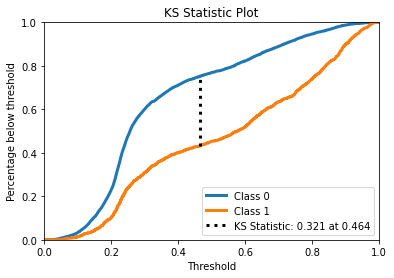

In [ ]:
# Plotting CDFs of both classes
from scikitplot import metrics as skplt
skplt.plot_ks_statistic(y_test, y_ts_prob_svc5)
plt.show()

**Observations**:
1. After tuning, the F-1 (+2.2%), Precision (+5%) and AUC-ROC (+2.86%) scores have improved, while Recall remained exactly same as before without tuning.
2. As per decile method, KS value is 38.80% at decile 3.
3. As per inbuilt class ks_2samp method, KS value is ~0.73 with almost negligible p-value. 
4. This indicates that the cumulative distributions of both classes (Defaulters vs non-defaulters) are different and hence, model is able to differentiate both classes quite good).

## **Comparing all models after Hyper-parameters Tuning**

In [ ]:
# Evaluation metrics for all above models before Hyper-parameter Tunings.
final_metrics1 = model_lr_h0.append([model_lr_h1, model_rf_h4, model_rf_h5, model_xgb_h5, model_xgb_h4, model_svc_h2, model_svc_h5], ignore_index=True)
# Comparing models on test dataset only.
final_metrics1[['model_name','Test Accuracy',	'Test F-1 score',	'Test Precision',	'Test Recall',	'Test ROC_AUC', 'Test Brier_score']]

,model_name,Test Accuracy,Test F-1 score,Test Precision,Test Recall,Test ROC_AUC,Test Brier_score
0,Tuned_LogR_imbalanced,0.69,0.46,0.38,0.61,0.71,0.21
1,Tuned_LogR_Tomek,0.68,0.46,0.37,0.62,0.71,0.21
2,Tuned_RF_SMOTE,0.77,0.51,0.48,0.55,0.76,0.17
3,Tuned_RF_SMOTE-Tomek,0.77,0.51,0.48,0.54,0.76,0.16
4,Tuned_XGB_SMOTE_tomek,0.76,0.5,0.47,0.55,0.75,0.17
5,Tuned_XGB_SMOTE,0.78,0.49,0.5,0.49,0.75,0.16
6,Tuned_SVM_Tomek,0.77,0.52,0.48,0.57,0.74,0.14
7,Tuned_SVM_SMOTE-Tomek,0.73,0.47,0.42,0.54,0.72,0.19


**Observations**:
1. Basis Recall, Logistic Regression model built using TomekLinks undersampled dataset his th ebest performing model, with highest recall of 0.62. However, precision and F-1 score is not that good.
2. Considering Recall, Precision and F-1 score into account, SVM model built using TomekLinks undersampled dataset is the best performing model, with good Recall (0.57), precision (0.48), F-1 score (0.52), AUC-ROC (0.74) and least Brier score (0.14).
3. Second best performing model is RandomForest classifier built usng SMOTE over-sampled dataset, with good Recall (0.55), precision (0.48), F-1 score (0.51), AUC-ROC (0.76) and Brier score (0.17).
4. Third best performing model is XGBoost classifier built usng SMOTE-TomekLinks combined re-sampled dataset, with good Recall (0.55), precision (0.47), F-1 score (0.50), AUC-ROC (0.75) and Brier score (0.17).


# **I. Changing the threshold**

**RF model using SMOTE Over-sampled dataset**

* For those classification problems that have a severe class imbalance, the default threshold (0.5) can result in poor performance. 
* As such, a simple and straightforward approach to improving the performance of a classifier that predicts probabilities on an imbalanced classification problem is to tune the threshold used to map probabilities to class labels.
* Another way of dealing with Imbalanced classes (i.e., other than re-sampling techniques), we can use "**threshold moving/Tuning**". Reason being that generating the synthetic observations or resample a certain data, has its own risk, such as high bias or high variance.



In [174]:
# Values of hyper-parameters for best performing RF Classifier model with SMOTE oversampled dataset
param_grid_rf2 = {'n_estimators': [700], 
                 'criterion': ['entropy', 'gini'],
                 'max_depth': [ 120],
                 'min_samples_leaf': [ 25],
                 'min_samples_split': [10],
                 'max_features': [0.33],
                 'max_samples': [0.8]}

In [175]:
# Importing RF Classifier class
from sklearn.ensemble import RandomForestClassifier
# Instantiating Classifier Class
rforest_h6 = RandomForestClassifier(random_state = 18, n_jobs=-1, class_weight ='balanced')

In [177]:
# Training model on SMOTE over-sampled dataset and returning predictions on train and test datasets
y_tr_pred_rf6, y_ts_pred_rf6, y_tr_prob_rf6, y_ts_prob_rf6 = Model_tuning(rforest_h6, X_smote, y_smote,
                                                                          X_test, y_test, param_grid_rf2,
                                                                          metric='roc_auc', search='random')

Model Results
Best Train Accuracy Score: 0.8326199775292922
Best Test Accuracy Score: 0.7671666666666667
Best Parameters: RandomForestClassifier(class_weight='balanced', max_depth=120,
                       max_features=0.33, max_samples=0.8, min_samples_leaf=25,
                       min_samples_split=10, n_estimators=700, n_jobs=-1,
                       random_state=18)


## **A. Using Youden’s J statistic to find optimal threshold value for above model**

The Youden's J-statistic is calculated as:
    
    J = Sensitivity + Specificity – 1
Given that we have Sensitivity (TPR) and the complement of the specificity (FPR), we can calculate it as:
    
    J = Sensitivity + (1 – FalsePositiveRate) – 1
    J = TruePositiveRate – FalsePositiveRate
* The maximum value of the Youden index is 1 (perfect test, i.e., TPR is 1 and FPR is 0 or say, FP=0 and FN=0) and the minimum is 0 when the test has no diagnostic value. The minimum occurs when sensitivity = 1−specificity
* We can then choose the threshold with the largest J statistic value.

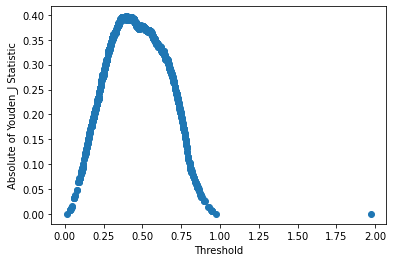

In [238]:
# Test data
fpr_ts, tpr_ts, thresholds_ts = roc_curve(y_test, y_ts_prob_rf6[:,1])
# plotting thresholds to find maximum value for Youden's J Statistic
youden_j =  tpr_ts - fpr_ts
plt.scatter(thresholds_ts, np.abs(youden_j))
plt.xlabel("Threshold")
plt.ylabel("Absolute of Youden_J Statistic")
plt.show()

In [237]:
jx = np.argmax(np.abs(youden_j))
print('Optimal threshold:', round(thresholds_ts[jx],3),'Recall:', round(tpr_ts[jx],3))

Optimal threshold: 0.398 Recall: 0.668


## **B) Using Precision-Recall Curve**

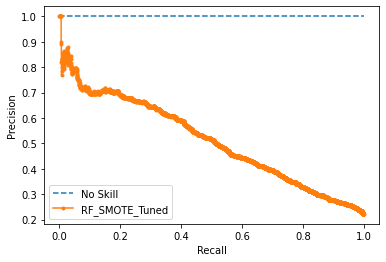

In [233]:
from sklearn.metrics import precision_recall_curve
# Test data
precision_ts, recall_ts, threshold_ts = precision_recall_curve(y_test, y_ts_prob_rf6[:,1])
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall_ts, precision_ts, marker='.', label='RF_SMOTE_Tuned')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [234]:
# convert to f score
fscore = (2 * precision_ts * recall_ts) / (precision_ts + recall_ts)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Optimal Threshold=%f, Largest F-Score=%.3f, Recall=%.3f, Precision=%.3f' % (threshold_ts[ix], fscore[ix], recall_ts[ix], precision_ts[ix]))

Optimal Threshold=0.427304, Largest F-Score=0.513, Recall=0.635, Precision=0.431


## **C. Recommending model with Recall of 0.80**

* Our Main goal is to maximize Recall. 
* Let's us assume that the desired Recall is 0.8, accordingly we will find corresponding threshold.

In [235]:
# Lets assume the desired recall is 80%.
recalls_80 = recall_ts[np.argmin(recall_ts >= 0.80)]               
precision_80 = precision_ts[np.argmin(recall_ts >= 0.80)]
threshold_80_recall = threshold_ts[np.argmin(recall_ts >= 0.80)]

# adding 1.0 as threshold value
threshold_ts = np.append(threshold_ts, 1)

# Printing the respective threshold and precision against desired recall of 0.80
print(f'Desired Recall after threshold moving:', round(recalls_80,4))
print(f'Precision against desired Recall of 0.80:', round(precision_80,3))
print(f'New Threshold for desired Recall of 0.80:', round(threshold_80_recall,3))

Desired Recall after threshold moving: 0.7995
Precision against desired Recall of 0.80: 0.328
New Threshold for desired Recall of 0.80: 0.29


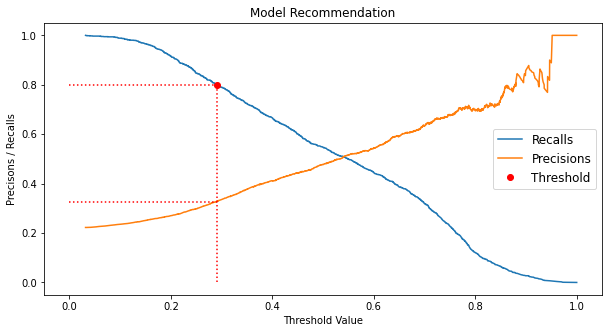

In [236]:
# Plotting recommended model with desired recall of 0.80

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(threshold_ts, recall_ts, label='Recalls')
ax.plot(threshold_ts, precision_ts, label='Precisions')

ax.plot([threshold_80_recall, threshold_80_recall], [precision_80, recalls_80], "r:" )
ax.plot([threshold_80_recall, threshold_80_recall], [0, precision_80], "r:")
ax.plot([0, threshold_80_recall], [precision_80, precision_80], "r:")
ax.plot([0, threshold_80_recall], [recalls_80, recalls_80], "r:")
ax.plot([threshold_80_recall], [recalls_80], "ro", label='Threshold')

ax.set_xlabel('Threshold Value')
ax.set_ylabel('Precisons / Recalls')
ax.legend(loc='center right',fontsize=12)
plt.title('Model Recommendation')
plt.show()

**Observations**:

Before deciding the oprimal threshold value to use, we have to first choose the desired unbiased evaluation metrics for the imbalanced dataset. Then we will try to maximise that chosen metric and get the corresponding threshold value. 

I have used 02 unbiased metrics i.e., Youden's J statistic and F-1 score) to arrive at optimal threshold value. 
  1. While maximising the Youden's J statistic, the required Threshold value turned out to be 0.398, with Recall of 0.668.
  2. While maximising the F-1 score, the required Threshold value turned out to be 0.427, with Recall of 0.635, largest F-1 score of 0.513 and Precision of 0.431.

Further, for model recommendation, i have chosen Recall of 0.80 and found respective threshold and precision. 
* Assuming desired Recall to be 0.80 for this problem, the threshold value turned out to be 0.29 and respective precision of 0.328.

# **J. Conclusions:**

## **Understanding the demographics of Credit card Owners:**
1. Majority are Females (~60%).
2. Majority have University level education (~47%), followed by Graduate school level education (around 35%). Only 16% have High-school level education.
3. Majority(~53%) are single, followed by Married (around 46%).
4. Most (~72%) are between 21 years to 40 years age group.
5. As per the given dataset, ~22% have defaulted on payment next month.

## **How various factors affect the probability of default?**

**A. Demographics Factors**:
1. Basis gender of customers, chances of Males defaulting on their payments next month is higher than that of Females.
2. As education level increases (i.e., high school to university to graduate school), default rate decreases.
3. Basis Marital status, Chances of defaulting is highest for customers who are married (~23.5%).
4. Customers between age groups 31 to 40 years are least likely to default, followed by 21 to 30 years group. Default rate gradually increases as the customers' age increases from 41 years and onwards.
5. Basis age and gender, Female customers of age group 31 to 40 years are least likely to default next month.
6. Basis gender and marital status, Chances of a "Married Male" defaulting is the highest (~25.9%), while that of "Single Female" is the least (approx. 19.7%).
7. Basis gender and education level, a Male customer with High-school level education, has the highest chance of defaulting (27.4%), shortly followed by Male with University level (26.2%). Not considering others category due to very few observations, found that Females with graduate education are least likely to default next month (~18%).

**B. Financial Behaviours**:
1. Average credit limit approved for Defaulters is less than that of Non-defaulters, suggesting that defaulter's credit profile was certainly not as good as that of Non-defaulter even from the beginning, and as a result they were issued smaller credit lines.
2. Customers with payments pending for more than 1 month, have higher chances of defaulting.
2. Pay down ratio is the ratio between total amount paid by customer against total Bill amount. On average, found that defaulter's overall pay-down ratio kept on decreasing each successive month, while for non-defaulters, the ratio has an overall increasing trend.
3. Defaulter's utilization rate increased significantly in latest month of september, while Non-defaulters' utilization rate decreased. Utilization rate is the ratio of Total bill amount to the maximum credit limit per month.

## **Top 3 Best Performing models:**

Considering Recall metric with utmost importance, followed by Precision and F-1 scores, found the following top 3 models:
1. **SVM model built using TomekLinks undersampled dataset** is the best performing model, with good Recall (0.57), precision (0.48), F-1 score (0.52), AUC-ROC (0.74) and least Brier score (0.14).
2. Second best performing model is **RandomForest classifier built usng SMOTE over-sampled dataset**, with good Recall (0.55), precision (0.48), F-1 score (0.51), AUC-ROC (0.76) and Brier score (0.17).
3. Third best performing model is **XGBoost classifier built usng SMOTE-TomekLinks combined re-sampled dataset**, with good Recall (0.55), precision (0.47), F-1 score (0.50), AUC-ROC (0.75) and Brier score (0.17).